<font size="5.2">Summary</font>  

This work has been published by **Mehdi Rezvandehy** and **Bernhard Mayer** at [Data-Centric Engineering, Cambridge University Press](https://doi.org/10.1017/dce.2023.9) https://doi.org/10.1017/dce.2023.9.

The exploitation of hydrocarbon reservoirs may potentially lead to contamination of soils, shallow water resources and greenhouse gas emissions in cases where wells are not perfectly sealed. Fluids such as methane or CO2 may in some cases migrate towards the groundwater zone and atmosphere through and along hydrocarbon wells. Several well properties such as age, depth, production/injection history, well density, and deviation, among others, may influence the likelihood of fluid leakage. In this study, machine learning approaches were applied to predict serious leakage with uncertainty quantification for wells that have not been field tested in Alberta, Canada. An improved imputation technique was developed by Cholesky factorization of the correlation matrix between features. Next, a wide range of predictive algorithms and various performance metrics were considered to achieve the most reliable classifier. However, a highly skewed distribution towards the negative class (non-serious leakage) forces predictive models to unrealistically underestimate the minority class (serious leakage). To address this issue, a combination of oversampling and undersampling was applied to adjust the class distribution. In this notebook, Python implementation to prediction fluid leakage from Hydrocarbon Wells is presented in this notebook. 

Python functions and data files needed to run this notebook are available via this [link](https://github.com/MehdiRezvandehy/Machine-Learning-for-Leakage-Detection-from-Hydrocarbon-Wells.git).

In [1]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from scipy.stats import mode
import os
from matplotlib.offsetbox import AnchoredText
import random
import utm
import tensorflow as tf
from tensorflow import keras
from functions import* # import require functions to run this notebook

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Raw-Data:-Well-Properties-and-Gas-Migration-Status" data-toc-modified-id="Raw-Data:-Well-Properties-and-Gas-Migration-Status-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Raw Data: Well Properties and Gas Migration Status</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Location-Map" data-toc-modified-id="Location-Map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Location Map</a></span></li><li><span><a href="#Training-Set" data-toc-modified-id="Training-Set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training Set</a></span></li><li><span><a href="#Validation-Set" data-toc-modified-id="Validation-Set-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Validation Set</a></span></li><li><span><a href="#Test-Set" data-toc-modified-id="Test-Set-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Test Set</a></span></li><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Target Encoding</a></span></li><li><span><a href="#Number-of-Missing-Values-of-Raw-Data" data-toc-modified-id="Number-of-Missing-Values-of-Raw-Data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Number of Missing Values of Raw Data</a></span></li><li><span><a href="#Correlation-between-features" data-toc-modified-id="Correlation-between-features-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Correlation between features</a></span></li><li><span><a href="#Correlation-Matrix-before-Imputation" data-toc-modified-id="Correlation-Matrix-before-Imputation-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Correlation Matrix before Imputation</a></span></li></ul></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imputation</a></span><ul class="toc-item"><li><span><a href="#LU-Conditional-Simulation" data-toc-modified-id="LU-Conditional-Simulation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LU Conditional Simulation</a></span></li><li><span><a href="#Correlation-Matrix-after-Imputation" data-toc-modified-id="Correlation-Matrix-after-Imputation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correlation Matrix after Imputation</a></span></li></ul></li><li><span><a href="#Get-Final-Training-Set" data-toc-modified-id="Get-Final-Training-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Final Training Set</a></span></li><li><span><a href="#Get-Final-Validation-and-Test-Set" data-toc-modified-id="Get-Final-Validation-and-Test-Set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get Final Validation and Test Set</a></span><ul class="toc-item"><li><span><a href="#Target-Encoding--with-Statistics-from-Training" data-toc-modified-id="Target-Encoding--with-Statistics-from-Training-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Target Encoding  with Statistics from Training</a></span></li><li><span><a href="#Imputation-with-Statistics-from-Training" data-toc-modified-id="Imputation-with-Statistics-from-Training-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Imputation with Statistics from Training</a></span></li></ul></li><li><span><a href="#OverUndersampling-for-Only-Training-set" data-toc-modified-id="OverUndersampling-for-Only-Training-set-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>OverUndersampling for Only Training set</a></span></li><li><span><a href="#Dummy-(ie.-random)-Classifier" data-toc-modified-id="Dummy-(ie.-random)-Classifier-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dummy (ie. random) Classifier</a></span></li><li><span><a href="#Stochastic-Gradient-Decent" data-toc-modified-id="Stochastic-Gradient-Decent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Stochastic Gradient Decent</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Adaptive-Boosting-with-Decision-Trees" data-toc-modified-id="Adaptive-Boosting-with-Decision-Trees-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Adaptive Boosting with Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Importance-of-Features" data-toc-modified-id="Importance-of-Features-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Importance of Features</a></span></li><li><span><a href="#Under-&amp;-Oversampling" data-toc-modified-id="Under-&amp;-Oversampling-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Under &amp; Oversampling</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Optimum-Hyperparameters" data-toc-modified-id="Optimum-Hyperparameters-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Optimum Hyperparameters</a></span></li><li><span><a href="#Bootstraping-(Neural-Network)" data-toc-modified-id="Bootstraping-(Neural-Network)-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Bootstraping (Neural Network)</a></span></li></ul></li><li><span><a href="#Area-Under-Curve-(AUC)" data-toc-modified-id="Area-Under-Curve-(AUC)-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Area Under Curve (AUC)</a></span></li><li><span><a href="#Performance-of-the-Models-on-Training-Set" data-toc-modified-id="Performance-of-the-Models-on-Training-Set-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Performance of the Models on Training Set</a></span></li><li><span><a href="#Random-Forest:-Sampling-before-and-within-Cross-validation" data-toc-modified-id="Random-Forest:-Sampling-before-and-within-Cross-validation-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Random Forest: Sampling before and within Cross validation</a></span></li><li><span><a href="#Model-after-Changing-Ratio" data-toc-modified-id="Model-after-Changing-Ratio-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Model after Changing Ratio</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Test set</a></span><ul class="toc-item"><li><span><a href="#Soft-Voting" data-toc-modified-id="Soft-Voting-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>Soft Voting</a></span></li><li><span><a href="#Final-Plots" data-toc-modified-id="Final-Plots-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>Final Plots</a></span></li></ul></li><li><span><a href="#Prediction-of-Serious-Leakage-for-1000-Random-Wells-without-Field-Test" data-toc-modified-id="Prediction-of-Serious-Leakage-for-1000-Random-Wells-without-Field-Test-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Prediction of Serious Leakage for 1000 Random Wells without Field Test</a></span><ul class="toc-item"><li><span><a href="#Final-Result" data-toc-modified-id="Final-Result-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>Final Result</a></span></li></ul></li></ul></div>

# Introduction

Exploitation of oil and gas reservoirs has raised public concerns regarding potential contamination of soils, shallow ground water and increases in greenhouse gas emissions. In cases where hydrocarbon wells are not properly sealed, there is the potential that gas such as methane and/or sequestered CO2 can migrate outside the surface casing of wellbores towards shallow aquifers, soils and the atmosphere, or travel inside the wellbore to be vented to the atmosphere via surface casing vent flows (SCVF) causing environmental concerns. Monitoring for such gas migration and surface casing vent flows is required by regulators to detect serious leakage associated with existing oil and gas wells, and to prioritize the amendment of the leakiest wells. 

The Alberta Energy Regulator (AER) in Alberta, Canada, operates  such field tests for energy wells within the province. The AER applies two field tests for identification of fluid migration after a well is completed to produce hydrocarbon or to inject any fluid: 1) Surface casing vent flow (SCVF) is the flow of gas (methane, CO2 etc.) out of the casing annulus or surface casing. SCVF is often referred to as internal migration. 2) Gas Migration (GM) is a flow of any gas that is detectable at surface outside of the outermost casing string. GM is often referred to as seepage or external migration.

The test for SCVF can be a simple bubble test where a small hose attached to the surfacecasing vent is immersed into a container filled with water. Observing bubbles indicates the well has SCVF and further testing is required to measure pressure and flow rate. Wells with positive SCVF are considered serious in the province of Alberta under one or several of the following conditions: a) gas-flow rates higher than 300 m3/d$, b) stabilized pressure > 9.8 kPa/m, c) saline water, d) liquid-hydrocarbons, and e) hydrogen sulphide (H2S) flow.

Monitoring for GM in the vicinity of hydrocarbon wells is generally more challenging and often approached with measurements using gas detectors near the soil surface. GM in soils happens when gas migrates outside of the cemented surface casing. The gas source is frequently natural gas from geological formations in the intermediate zone (e.g., below the base of groundwater protection but above the targeted hydrocarbon reservoir) with migration often facilitated by poor surface-casing cement. Monitoring for GM is traditionally accomplished by inserting gas measurement probes into the soil to a depth of at least 50 cm in a test pattern radiating out from the wellbore, and subsequently gas concentrations and flow rates are measured. A GM is serious if there is a high flow rate or public safety hazard or off-lease environmental damage, such as groundwater contamination (see AER, Interim directive: ID 2003-01 (2003) \cite{Web1} for more information). Wells with positive SCVF/GM are classified as non-serious if none of the conditions for serious category are met. In Alberta, repair for serious SCVF/GM leakage is required within 90 days; otherwise, repair is deferred to abandonment.

Efficient and cost-effective testing of all hydrocarbon-producing wells is a major challenge in areas with large numbers of producing or injection wells. The AER requires testing for all wells only within a small specific area in central and eastern Alberta and only for wells completed since 1995. There are many wells in other parts of Alberta including abandoned and orphaned wells for which no SCVF/GM test have been conducted. The objective of this work was to reliably train a model to predict the probability of serious fluid leakage using oil and gas wells for which SCFV and GM measurements are available (Figure \ref{fig1}) and subsequently make predictions for wells for which SCVF/GM tests have not been conducted. 

# Raw Data: Well Properties and Gas Migration Status

In [3]:
# Reading Data
df_xy = pd.read_csv("./Data/Final_Final.csv",na_values=['NA','?',' '])
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting

#Shuffle data to avoid any artifact
np.random.seed(42)
df_xy=df_xy.reindex(np.random.permutation(df_xy.index))
df_xy.reset_index(inplace=True, drop=True)

# Raname some columns name to make more sense.
df_xy=df_xy.rename(columns={"MD (All Wells) (m)":"Measured Depth (m)", "Surf-Hole Easting (NAD83)": "X Coordinate",
"Surf-Hole Easting (NAD83)": "X Coordinate","Surf-Hole Northing (NAD83)": "Y Coordinate",
"Rm": "Rheology Modifier (RM)","BH Temp. (degC)": "Borehole Temperature (degC)",
'Cumulative WTR Prod. (m3)':'Cumulative WATER Prod. (m3)',
 'Prod./Inject. Frmtn': 'Prod./Inject. Formation', 'Well Status Abrv': 'Well Status',
'No_well':'Well Density (n/10km X 10km)', 'Surface Abandonment Date': 'Surface Abandonment Month',                          
'Total Production Hrs':'Total Production Hours', 'Class': 'AER Classification'})
#
df_xy=df_xy[['Deviated Hole (T/F)','Horizontal Hole (T/F)','Surface-Casing Depth (m)','Surface-Casing Size (mm)'
,'Surface-Casing Weight (kg/m)','Production-Casing Depth (m)','Production-Casing Size (mm)'
,'Production-Casing Weight (kg/m)','Production-Casing Grade','Surface-Casing Grade'
,'Measured Depth (m)','Borehole Temperature (degC)','Prod./Inject. Formation','Well Status',
'Month Well Spudded','Well Density (n/10km X 10km)','Surface Abandonment Type','Surface Abandonment Month',
'Cumulative GAS Prod. (e3m3)','Cumulative OIL Prod. (m3)','Cumulative WATER Prod. (m3)',
'Total Production Month','X Coordinate','Y Coordinate','AER Classification']]

# one with x and y, and another without x and y
df=df_xy.copy()
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting
df.drop(drop_colmn, axis=1, inplace=True)
df

Deviated Hole (T/F) Horizontal Hole (T/F)  Surface-Casing Depth (m)  \
0                       F                     F                     186.0   
1                       F                     F                     104.0   
2                       F                     F                     326.0   
3                       F                     F                     144.0   
4                       F                     T                     136.8   
...                   ...                   ...                       ...   
29961                   T                     F                     214.0   
29962                   F                     T                     614.0   
29963                   F                     F                     283.7   
29964                   F                     F                     205.5   
29965                   T                     F                     172.0   

       Surface-Casing Size (mm)  Surface-Casing Weight (kg/m)  \
0                         219.1                          35.7   
1                         273.0                           NaN   
2                         219.1                          35.7   
3                         177.8                           NaN   
4                         339.7                          90.8   
...                         ...                           ...   
29961                     219.1                          35.7   
29962                     244.5                           NaN   
29963                     219.1                          35.7   
29964                     219.1                          35.7   
29965                     244.5                          53.6   

       Production-Casing Depth (m)  Production-Casing Size (mm)  \
0                            422.0                        114.3   
1                            607.0                        177.8   
2                           1850.0                        114.3   
3                            609.0                        114.3   
4                            632.0                        219.1   
...                            ...                          ...   
29961                        996.0                        139.7   
29962                          NaN                          NaN   
29963                       1472.8                        139.7   
29964                       1236.0                        139.7   
29965                        630.6                        177.8   

       Production-Casing Weight (kg/m) Production-Casing Grade  \
0                                 14.1                    J055   
1                                  NaN                     NaN   
2                                 17.3                    J055   
3                                  NaN                     NaN   
4                                 53.7                    L080   
...                                ...                     ...   
29961                             20.8                  OOJ055   
29962                              NaN                     NaN   
29963                             20.8                    K055   
29964                             20.8                    J055   
29965                             34.2                    J055   

      Surface-Casing Grade  Measured Depth (m)  Borehole Temperature (degC)  \
0                     J055               901.0                         33.0   
1                      NaN               607.0                         23.0   
2                     J055              1855.0                         61.0   
3                      NaN               609.0                         26.0   
4                     K055              1594.0                          NaN   
...                    ...                 ...                          ...   
29961               OOJ055               996.0                         29.0   
29962                  NaN              3780.0                        

# Data Processing

In [4]:
# Remove 'Considered Non Serious' from 'AER Classification'
df_xy=df_xy[df_xy['AER Classification']!='Considered Non Serious']
df=df[df['AER Classification']!='Considered Non Serious']

df_xy['AER Classification']=df_xy['AER Classification'].replace('Non Serious', 0)
df_xy['AER Classification']=df_xy['AER Classification'].replace('Serious', 1)
#df_xy['AER Classification']=df_xy['AER Classification'].replace('Considered Non Serious', 1)
df_xy.reset_index(inplace=True, drop=True)

#
df['AER Classification']=df['AER Classification'].replace('Non Serious', 0)
df['AER Classification']=df['AER Classification'].replace('Serious', 1)
#df['AER Classification']=df['AER Classification'].replace('Considered Non Serious', 1)
df.reset_index(inplace=True, drop=True)

## Location Map 

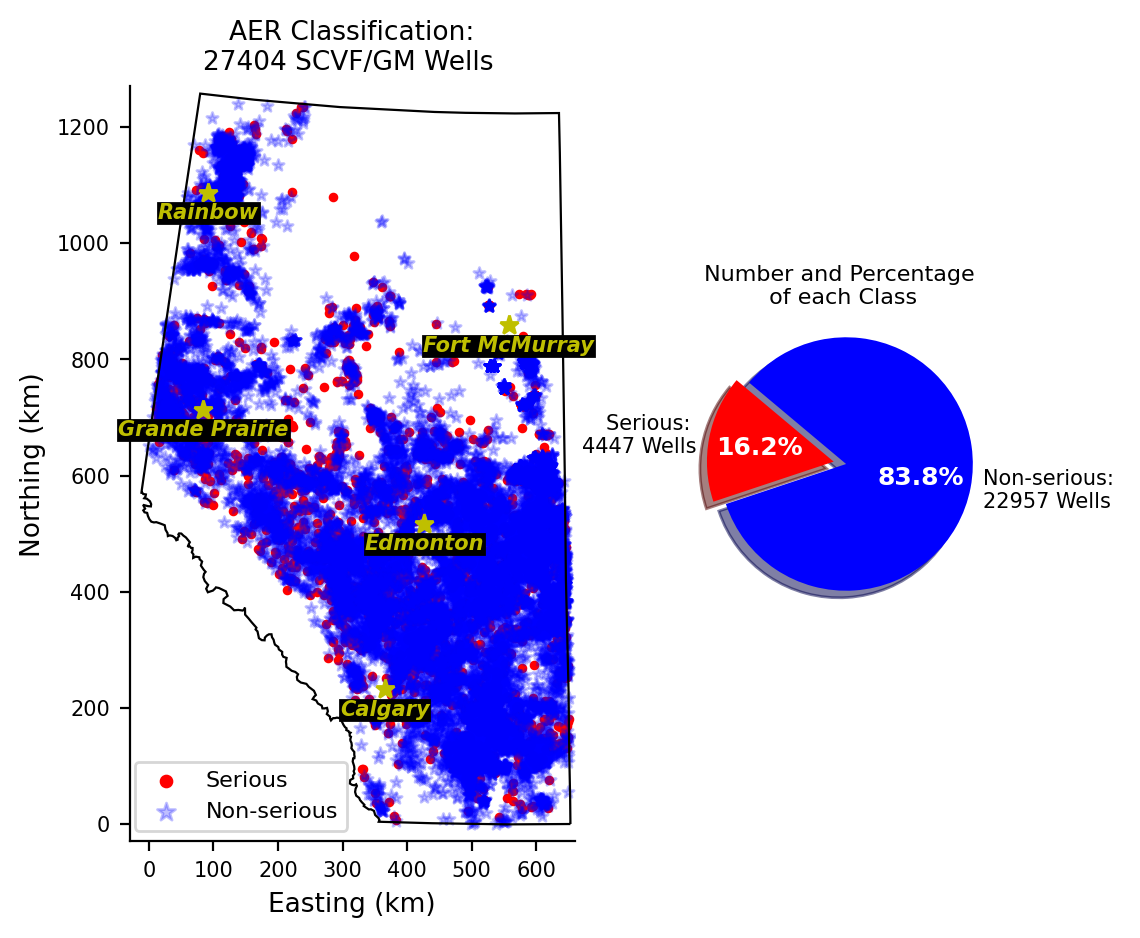

In [5]:
#Plot for Serious
x_1=list((df_xy["X Coordinate"][df_xy["AER Classification"]==1])/1000)
y_1=list((df_xy["Y Coordinate"][df_xy["AER Classification"]==1])/1000) 
count_1=len(df_xy[df_xy["AER Classification"]==1])

#Plot for Non Serious
x_2=list((df_xy["X Coordinate"][df_xy["AER Classification"]==0])/1000)
y_2=list((df_xy["Y Coordinate"][df_xy["AER Classification"]==0])/1000)  
count_0=len(df_xy[df_xy["AER Classification"]==0])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0, count_1,title='AER Classification:\n'+ str(len(df_xy))+
             " SCVF/GM Wells ",s1=6,s2=18,alpha1=1,alpha2=0.25,save='./Figures/Fig1.png')

In [6]:
# 10% of data for Test
x=df_xy
y=df_xy['AER Classification']

# Test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(x,y):
    train_val_set_strat = x.loc[train_index]
    test_set_strat  = x.loc[test_index]
    df_main         = x.loc[train_index]
    
test_set_strat.reset_index(inplace=True, drop=True)
   
# 70% Training set and 20% Validation set
train_val_set_strat.reset_index(inplace=True, drop=True)
x=train_val_set_strat
y=train_val_set_strat['AER Classification']    
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=32)
for train_index, test_index in split.split(x,y):
    train_set_strat = x.loc[train_index]
    vali_set_strat  = x.loc[test_index]

train_set_strat.reset_index(inplace=True, drop=True) 
df_xy=train_set_strat 
vali_set_strat.reset_index(inplace=True, drop=True)  

## Training Set

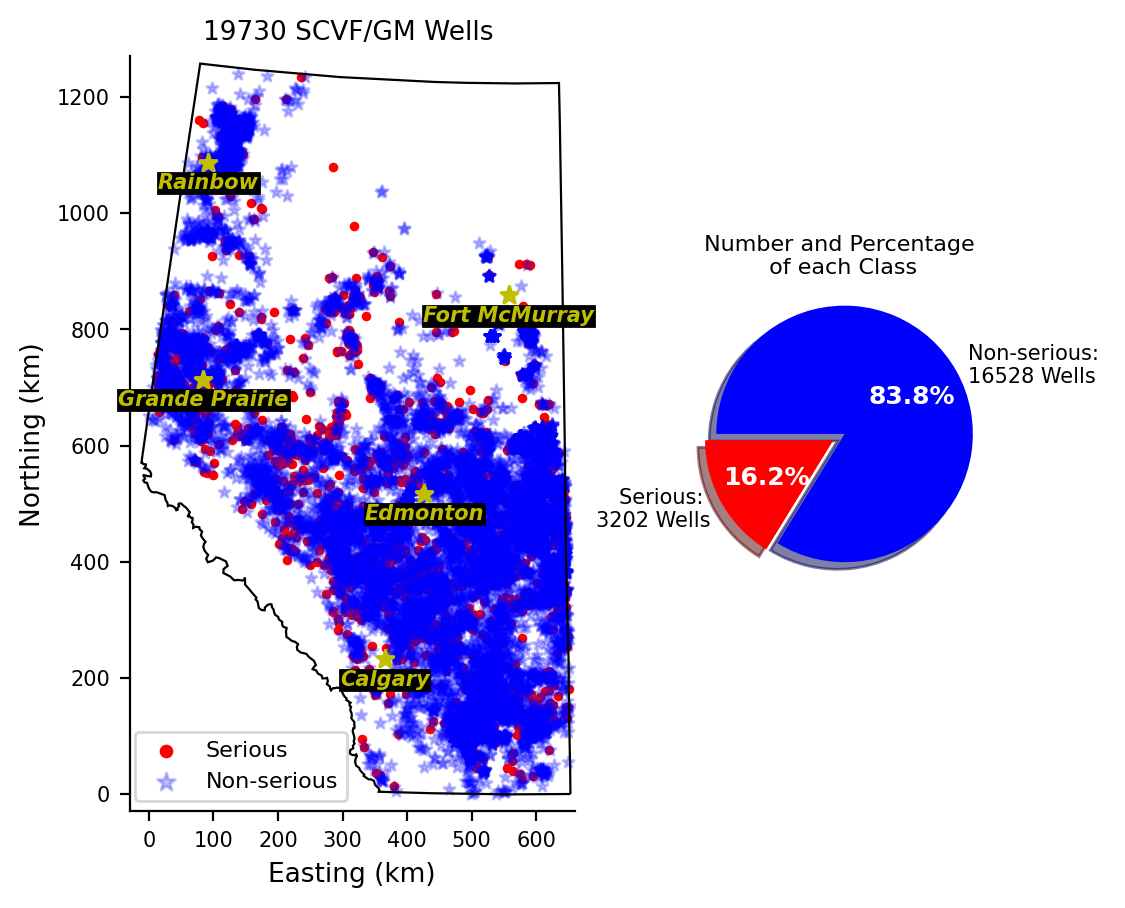

In [7]:
#Plot for Serious
ind_Serious=[index for index, value in enumerate(df_xy['AER Classification']) if value == 1]
ind_Non_Serious=[index for index, value in enumerate(df_xy['AER Classification']) if value == 0]
x_1=list((df_xy["X Coordinate"].iloc[ind_Serious])/1000)
y_1=list((df_xy["Y Coordinate"].iloc[ind_Serious])/1000) 
count_1_taining=len(df_xy["AER Classification"].iloc[ind_Serious])

#Plot for Non Serious
x_2=list((df_xy["X Coordinate"].iloc[ind_Non_Serious])/1000)
y_2=list((df_xy["Y Coordinate"].iloc[ind_Non_Serious])/1000) 
count_0_taining=len(df_xy["AER Classification"].iloc[ind_Non_Serious])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0_taining, count_1_taining,title= str(len(df_xy))+
             " SCVF/GM Wells ",s1=6,s2=18,alpha1=1,alpha2=0.25,save='./Figures/Fig1_taining.png',startangle=180)

## Validation Set

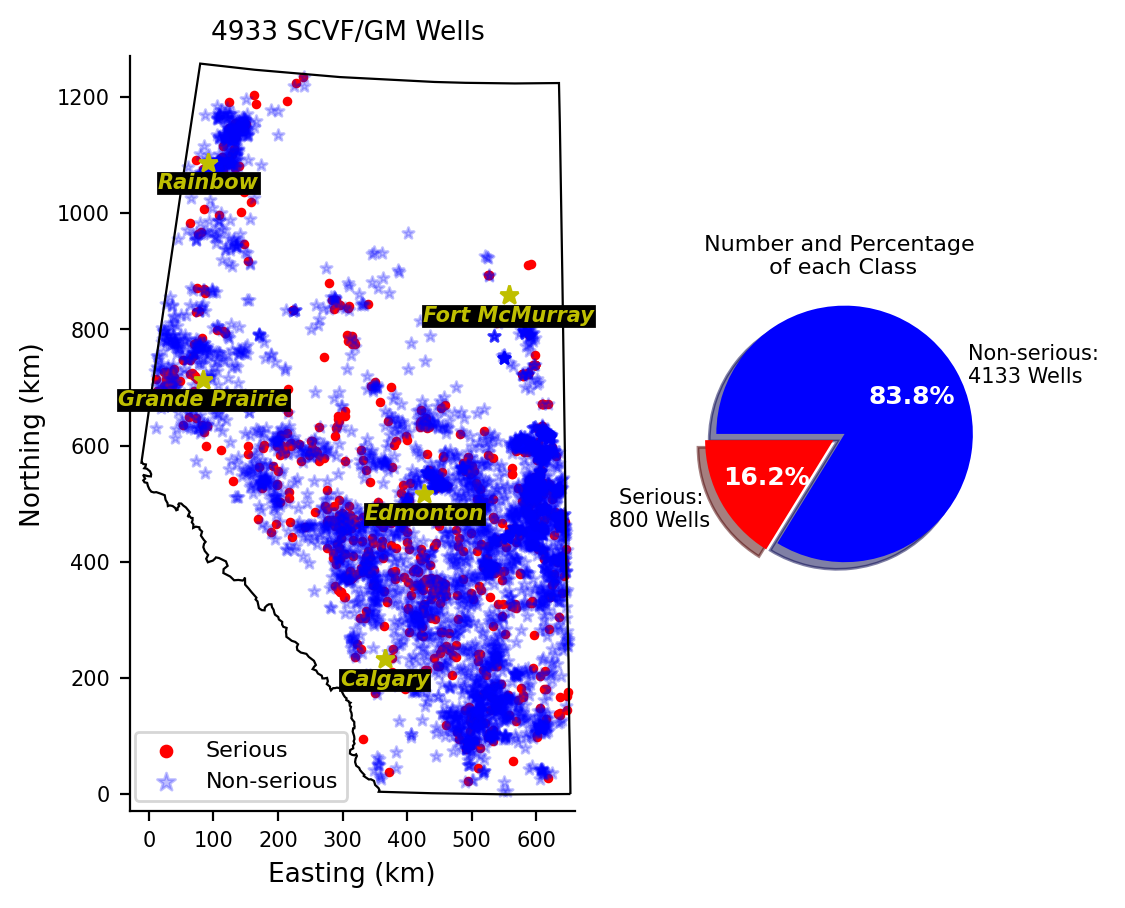

In [8]:
#Plot for Serious
ind_Serious=[index for index, value in enumerate(vali_set_strat['AER Classification']) if value == 1]
ind_Non_Serious=[index for index, value in enumerate(vali_set_strat['AER Classification']) if value == 0]
x_1=list((vali_set_strat["X Coordinate"].iloc[ind_Serious])/1000)
y_1=list((vali_set_strat["Y Coordinate"].iloc[ind_Serious])/1000) 
count_1_valid=len(vali_set_strat["AER Classification"].iloc[ind_Serious])

#Plot for Non Serious
x_2=list((vali_set_strat["X Coordinate"].iloc[ind_Non_Serious])/1000)
y_2=list((vali_set_strat["Y Coordinate"].iloc[ind_Non_Serious])/1000) 
count_0_valid=len(vali_set_strat["AER Classification"].iloc[ind_Non_Serious])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0_valid, count_1_valid,title= str(len(vali_set_strat))+
             " SCVF/GM Wells ",s1=6,s2=18,alpha1=1,alpha2=0.25,save='./Figures/Fig1_valid.png',startangle=180)

## Test Set

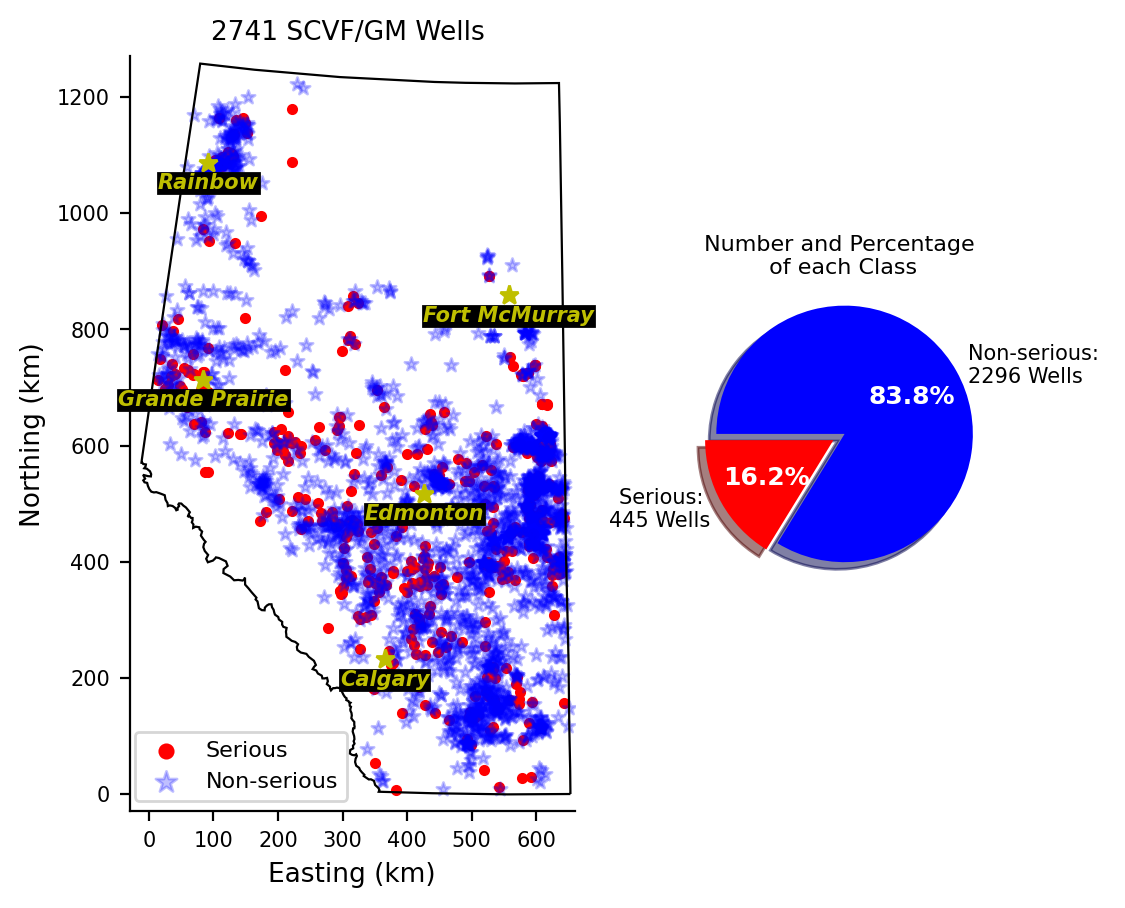

In [9]:
#Plot for Serious
ind_Serious=[index for index, value in enumerate(test_set_strat['AER Classification']) if value == 1]
ind_Non_Serious=[index for index, value in enumerate(test_set_strat['AER Classification']) if value == 0]
x_1=list((test_set_strat["X Coordinate"].iloc[ind_Serious])/1000)
y_1=list((test_set_strat["Y Coordinate"].iloc[ind_Serious])/1000) 
count_1=len(test_set_strat["AER Classification"].iloc[ind_Serious])

#Plot for Non Serious
x_2=list((test_set_strat["X Coordinate"].iloc[ind_Non_Serious])/1000)
y_2=list((test_set_strat["Y Coordinate"].iloc[ind_Non_Serious])/1000) 
count_0=len(test_set_strat["AER Classification"].iloc[ind_Non_Serious])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0, count_1,title= str(len(test_set_strat))+
             " SCVF/GM Wells ",s1=9,s2=25,alpha1=1,alpha2=0.25,save='./Figures/Fig1_testset.png',startangle=180)

## Target Encoding 

In [11]:
## Assign weight
# Target Encoding
WEIGHT = 5
#df_xy['Well Status'],dic_TE_1 = smoothed_mean(df_1=df_xy, cat='Well Status', target='AER Classification', weight=WEIGHT)
#
df_xy['Prod./Inject. Formation'].fillna('NA',inplace=True)
df_xy['Prod./Inject. Formation'],dic_TE_2= smoothed_mean(df_1=df_xy, cat='Prod./Inject. Formation', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Production-Casing Grade'],dic_TE_3 = smoothed_mean(df_1=df_xy, cat='Production-Casing Grade', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Surface-Casing Grade'],dic_TE_4 = smoothed_mean(df_1=df_xy, cat='Surface-Casing Grade', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Surface Abandonment Type'].fillna('NA',inplace=True)
df_xy['Surface Abandonment Type'],dic_TE_5 = smoothed_mean(df_1=df_xy, cat='Surface Abandonment Type', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Deviated Hole (T/F)'].fillna('NA',inplace=True)
df_xy['Deviated Hole (T/F)'],dic_TE_6=smoothed_mean(df_1=df_xy, cat='Deviated Hole (T/F)', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Horizontal Hole (T/F)'].fillna('NA',inplace=True)
df_xy['Horizontal Hole (T/F)'],dic_TE_7=smoothed_mean(df_1=df_xy, cat='Horizontal Hole (T/F)', 
                                                         target='AER Classification', weight=WEIGHT)
#
df_xy['Well Status'].fillna('NA',inplace=True)
df_xy['Well Status'],dic_TE_8= smoothed_mean(df_1=df_xy, cat='Well Status', 
                                                         target='AER Classification', weight=WEIGHT)

In [12]:
# Replace real missing values with 0
df_xy['Surface Abandonment Month'].fillna(0,inplace=True)

In [13]:
df_xy

Deviated Hole (T/F)  Horizontal Hole (T/F)  Surface-Casing Depth (m)  \
0                 0.129647               0.166704                     107.0   
1                 0.173492               0.166704                     252.0   
2                 0.173492               0.166704                     218.0   
3                 0.129647               0.166704                     185.0   
4                 0.173492               0.166704                     188.1   
...                    ...                    ...                       ...   
19725             0.173492               0.166704                     138.4   
19726             0.129647               0.166704                     266.0   
19727             0.173492               0.166704                     187.8   
19728             0.173492               0.166704                     399.0   
19729             0.129647               0.166704                     200.0   

       Surface-Casing Size (mm)  Surface-Casing Weight (kg/m)  \
0                         244.5                          48.1   
1                         219.1                           NaN   
2                         219.1                           NaN   
3                         219.1                          35.7   
4                         273.0                           NaN   
...                         ...                           ...   
19725                     219.1                           NaN   
19726                     219.1                          35.7   
19727                     177.8                           NaN   
19728                     339.7                           NaN   
19729                     244.5                          53.6   

       Production-Casing Depth (m)  Production-Casing Size (mm)  \
0                            619.0                        177.8   
1                           1628.0                        139.7   
2                           2159.0                        114.3   
3                           1200.0                        139.7   
4                           1082.0                        139.7   
...                            ...                          ...   
19725                       1403.6                        114.3   
19726                       1021.0                        139.7   
19727                        649.2                        114.3   
19728                       2317.7                        177.8   
19729                       2202.0                        177.8   

       Production-Casing Weight (kg/m)  Production-Casing Grade  \
0                                 34.2                 0.187893   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                 20.8                 0.131978   
4                                  NaN                      NaN   
...                                ...                      ...   
19725                              NaN                      NaN   
19726                             23.1                 0.131978   
19727                              NaN                      NaN   
19728                              NaN                      NaN   
19729                             34.2                 0.240164   

       Surface-Casing Grade  Measured Depth (m)  Borehole Temperature (degC)  \
0                  0.137679               619.0                         10.0   
1                       NaN              1628.0                         53.0   
2                       NaN              2163.0                         79.0   
3                  0.132078              1200.0                         34.0   
4                       NaN              1239.0                         23.0   
...                     ...                 ...                          ...   
19725                   NaN              1403.9                         44.0   
19726              0.132078

In [14]:
# Drop x and y coordinate since they are only used for ploting. Hence, we have two different data:
# one with x and y, and another without x and y
df=df_xy.copy()
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting
df.drop(drop_colmn, axis=1, inplace=True)
df

Deviated Hole (T/F)  Horizontal Hole (T/F)  Surface-Casing Depth (m)  \
0                 0.129647               0.166704                     107.0   
1                 0.173492               0.166704                     252.0   
2                 0.173492               0.166704                     218.0   
3                 0.129647               0.166704                     185.0   
4                 0.173492               0.166704                     188.1   
...                    ...                    ...                       ...   
19725             0.173492               0.166704                     138.4   
19726             0.129647               0.166704                     266.0   
19727             0.173492               0.166704                     187.8   
19728             0.173492               0.166704                     399.0   
19729             0.129647               0.166704                     200.0   

       Surface-Casing Size (mm)  Surface-Casing Weight (kg/m)  \
0                         244.5                          48.1   
1                         219.1                           NaN   
2                         219.1                           NaN   
3                         219.1                          35.7   
4                         273.0                           NaN   
...                         ...                           ...   
19725                     219.1                           NaN   
19726                     219.1                          35.7   
19727                     177.8                           NaN   
19728                     339.7                           NaN   
19729                     244.5                          53.6   

       Production-Casing Depth (m)  Production-Casing Size (mm)  \
0                            619.0                        177.8   
1                           1628.0                        139.7   
2                           2159.0                        114.3   
3                           1200.0                        139.7   
4                           1082.0                        139.7   
...                            ...                          ...   
19725                       1403.6                        114.3   
19726                       1021.0                        139.7   
19727                        649.2                        114.3   
19728                       2317.7                        177.8   
19729                       2202.0                        177.8   

       Production-Casing Weight (kg/m)  Production-Casing Grade  \
0                                 34.2                 0.187893   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                 20.8                 0.131978   
4                                  NaN                      NaN   
...                                ...                      ...   
19725                              NaN                      NaN   
19726                             23.1                 0.131978   
19727                              NaN                      NaN   
19728                              NaN                      NaN   
19729                             34.2                 0.240164   

       Surface-Casing Grade  Measured Depth (m)  Borehole Temperature (degC)  \
0                  0.137679               619.0                         10.0   
1                       NaN              1628.0                         53.0   
2                       NaN              2163.0                         79.0   
3                  0.132078              1200.0                         34.0   
4                       NaN              1239.0                         23.0   
...                     ...                 ...                          ...   
19725                   NaN              1403.9                         44.0   
19726              0.132078

## Number of Missing Values of Raw Data

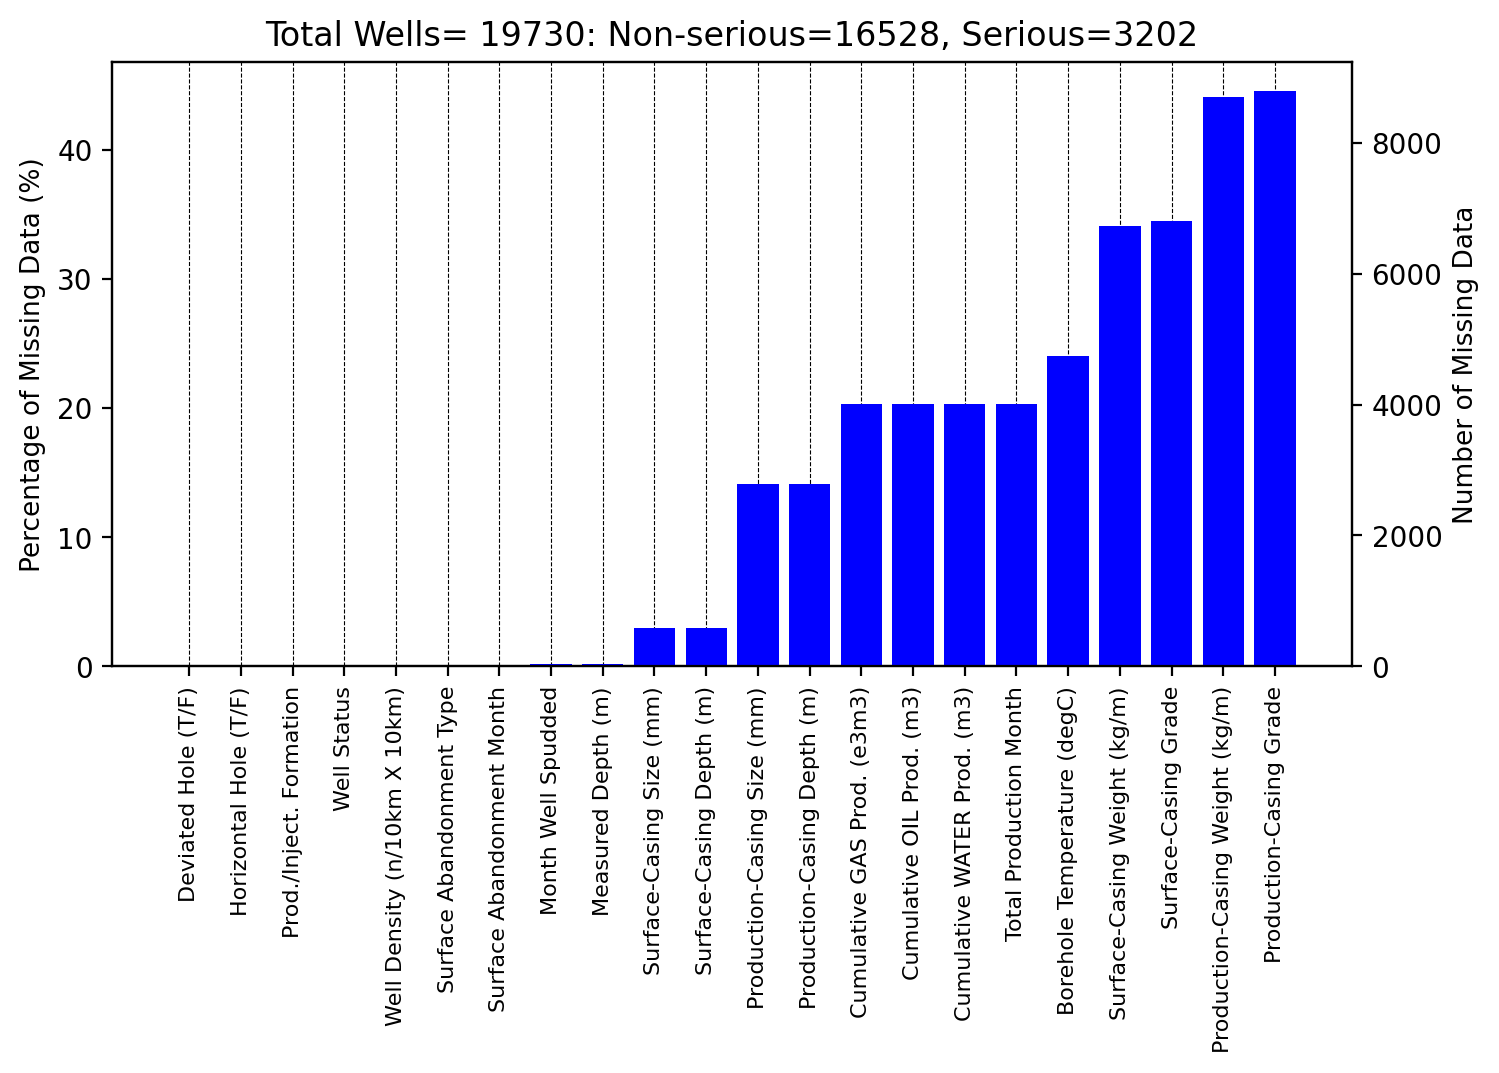

In [15]:
#Calculate number of missing data and percentage for each feature
per_non_nan=[]
non_nan_=[]
df_=df.copy()
df_.drop(['AER Classification'], axis=1, inplace=True)

Colms=df_.columns
for i in range(len(Colms)):
    non_nan=df_[Colms[i]].count()
    non_nan_.append(len(df_)-non_nan)
    per_non_nan.append(float(100-(non_nan/len(df_))*100))
    
#Sort percentage of missing data and columns   
sort_array=np.sort(per_non_nan)
sort_colms=[]
uniqu=list(np.unique(per_non_nan))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(per_non_nan) if x == uniqu[i]]
    for k in ind:
        sort_colms.append(Colms[k])
        
#Sort number of missing data and columns        
sort_non_nan_=np.sort(non_nan_)
sort_non_nan__=[]
uniqu=list(np.unique(non_nan_))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(non_nan_) if x == uniqu[i]]
    for k in ind:
        sort_non_nan__.append(Colms[k])

#Plot barchart with two vertical axis        
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis
index1 = np.arange(len(sort_colms))
index2 = np.arange(len(sort_non_nan__))
ax1.bar(index1, sort_array,color='b')
ax2.bar(index2, sort_non_nan_,color='b')
plt.title('Total Wells= '+str(count_0_taining+count_1_taining)+': Non-serious='+
          str(count_0_taining)+', Serious='+str(count_1_taining),fontsize=12)
#ax1.set_xlabel('Features (Well Properties)',fontsize='10.5')
ax1.set_ylabel('Percentage of Missing Data (%)',fontsize='9.5')
ax2.set_ylabel('Number of Missing Data',fontsize='9.5')
ax1.set_xticks(np.arange(len(Colms)))
ax1.set_xticklabels(sort_colms,fontsize=8, rotation=90)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.4) # horizontal lines
fig.savefig('./Figures/Fig2.pdf', dpi=500, bbox_inches='tight')

plt.show()

In [16]:
# Percentage of missing value in each row
clm_all=df.columns
miss_per=np.zeros((len(df.index)))+np.nan
for i in df.index:
    miss_per[i]=len(df.iloc[i][df.iloc[i].isnull()])/len(clm_all)

## Correlation between features

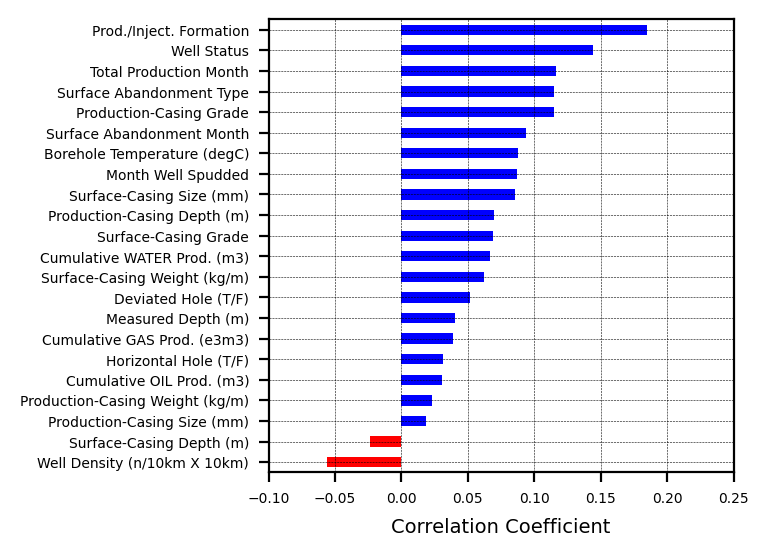

In [17]:
# Calculate correlation between features
corr=df.corr()
Colms_sh=list(Colms)

# Plot correlation of all features with the target 'AER Classification'
font = {'size'   : 5}
matplotlib.rc('font', **font)
corr_arr=corr.values[:,-1]

fig, ax1 = plt.subplots(figsize=(3, 3), dpi= 200, facecolor='w', edgecolor='k')

coefs=corr_arr[0:-1]; names=Colms_sh
r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names )
r_ = r_.sort_values(by=['coef'])
r_['coef'].plot(kind='barh', color=r_['positive'].map({True: 'b', False: 'r'}))   

ax1.set_xlabel('Correlation Coefficient',fontsize='7')
plt.xlim(-0.1,0.25)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.2) # horizontal lines
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) # horizontal lines
plt.show()

Since target values 'AER Classification' is only 0 and 1, the linear correlation of target and features could be misleading: features may be correlated with target non-linearly. Hence, we consider the correlation between features, A variable may be non-linearly is correlated with target but it can be linearly correlated with other features. Here is covariance matrix between all features.

In [18]:
# Calculate covariance matrix between features and percentage of missing values as matrix 

colmn=list(df_xy.columns)
corr=zeros((len(colmn),len(colmn)))
corr_nxy=zeros((len(colmn)-2,len(colmn)-2))
Per_NaN=zeros((len(colmn)-2,len(colmn)-2))
xy_dic_no_im={}
# we do not need x and y, these features are only used for location map plot 
ll=0; itest=0
for l in range(len(colmn)):
    tmpx=[] ;tmpy=[]
    if(colmn[l]!='X Coordinate' and colmn[l]!='Y Coordinate'):
        ll=ll+1; ll1=0
    for l1 in range(len(colmn)):
        if(colmn[l1]!='Y Coordinate' and colmn[l1]!='X Coordinate'):
            ll1=ll1+1 
        New_pd=pd.concat([df_xy[[colmn[l]]],df_xy[[colmn[l1]]]],axis=1)
        New_pd_=(New_pd.dropna(subset=[colmn[l],colmn[l1]])).to_numpy()
        xy_dic_no_im[l,l1]=New_pd_[:,0],New_pd_[:,1]
        tt=np.corrcoef(New_pd_[:,0],New_pd_[:,1])
        #
        if(l==l1): corr[l,l1]=tt[0,1]
        else: corr[l,l1]=tt[0,1]  
        #
        if(ll>=ll1 and colmn[l]!='X Coordinate' and colmn[l]!='Y Coordinate'
         and colmn[l1]!='Y Coordinate' and colmn[l1]!='X Coordinate'):
            if(ll==ll1): corr_tmp=tt[0,1]+0.05
            else: corr_tmp=tt[0,1]              
            corr_nxy[ll1-1,ll-1]=np.nan
            corr_nxy[ll-1,ll1-1]=corr_tmp
            Per_NaN[ll1-1,ll-1]=100-(len(New_pd_[:,0])/len(df_xy))*100   
            Per_NaN[ll-1,ll1-1]=np.nan         

## Correlation Matrix before Imputation 

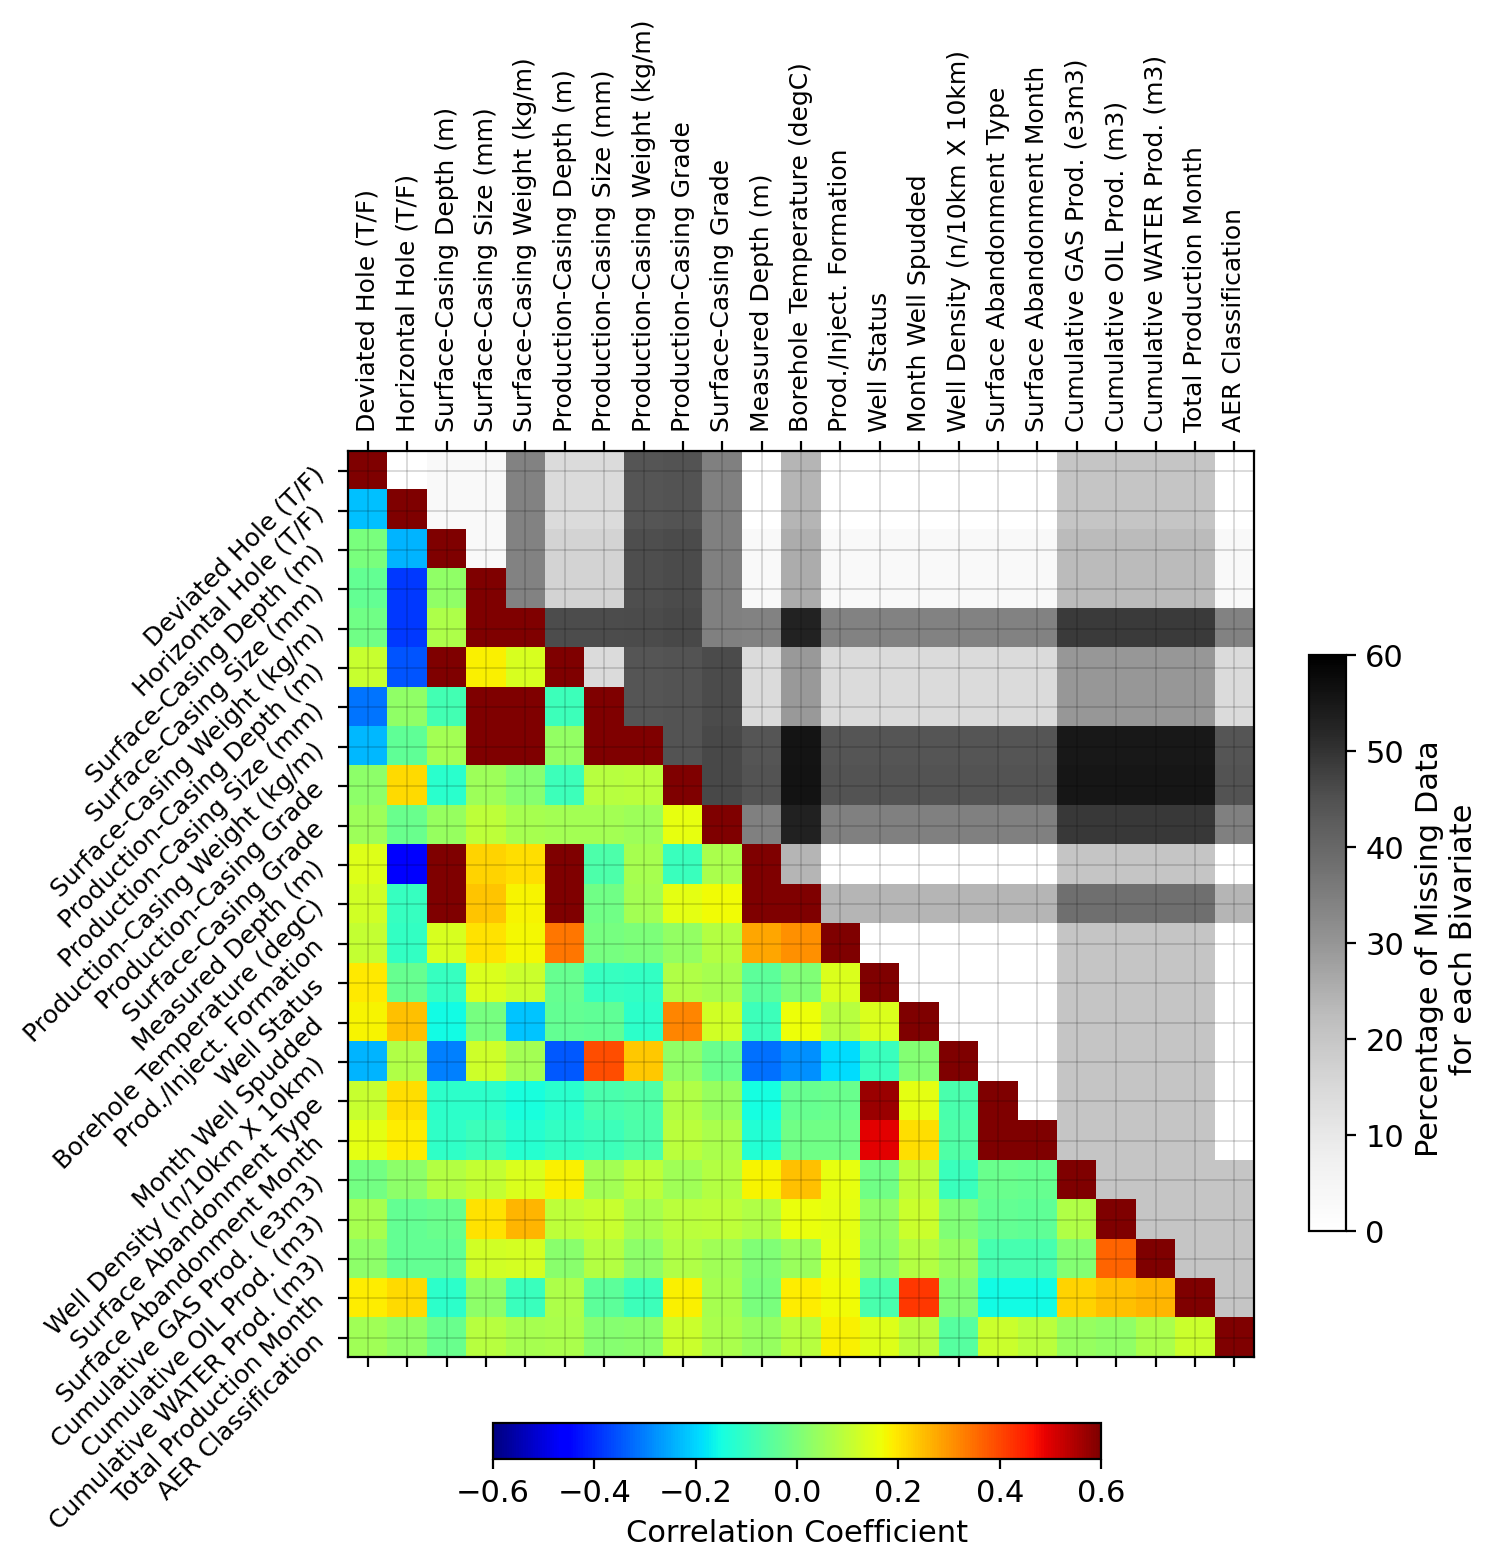

In [19]:
font = {'size'   : 11}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(8, 6), dpi= 200, facecolor='w', edgecolor='k')

# Matrix of correlation between features excluding x and y
try:
    colmn.remove('Y Coordinate')
    colmn.remove('X Coordinate')
except ValueError :
    pass
#
im =ax.matshow(corr_nxy, cmap='jet', interpolation='nearest',vmin=-0.6, vmax=0.6)
#
cbaxes = fig.add_axes([0.32, 0.04, 0.38, 0.030]) 
fig.colorbar(im,cax=cbaxes,shrink=0.5,label='Correlation Coefficient',orientation='horizontal')
ax.set_xticks(np.arange(len(corr_nxy)))
ax.set_xticklabels(colmn,fontsize=6, rotation='vertical')
ax.set_yticks(np.arange(len(corr_nxy)))
ax.set_yticklabels(colmn,fontsize=6)
ax.grid(color='k', linestyle='-', linewidth=0.1)

# Missing matrix between features excluding x and y
im =ax.matshow(Per_NaN, cmap='Greys', interpolation='nearest',vmin=0, vmax=60)
cbaxe_ = fig.add_axes([0.83, 0.23, 0.023, 0.48]) 
fig.colorbar(im,cax=cbaxe_,shrink=0.7,label='Percentage of Missing Data \n for each Bivariate')
ax.set_xticks(np.arange(len(Per_NaN)))
ax.set_xticklabels(colmn,fontsize=9, rotation='vertical')
ax.set_yticks(np.arange(len(Per_NaN)))
ax.set_yticklabels(colmn,fontsize=9,rotation=45)
ax.grid(color='k', linestyle='-', linewidth=0.1)
#ax.title(' Matrix of Correlation and Missing \n Data before Imputation', fontsize=10,y=1.38)
#plt.text(-3,1055,' Matrix of Correlation and Missing Data before Imputation', 
#         fontsize=10,bbox=dict(facecolor='white', alpha=0.2))
fig.savefig('./Figures/Fig5.png', dpi=500, bbox_inches='tight')
plt.show() 

Since there are missing values in data set, correlation matrix is achieved by removing all missing value. Upper diagonal matrix shows the covariance between features. Instead of having the same covariance value, we assign percentage of missing data for lower diagonal covariance matrix. There are very high linear correlation between some features.  

# Imputation

Removing all missing values from data leads to remove valuable information that can have greatly reduce the performance of machine learning prediction. One naive imputation approach is to replace missing values with mean or median of the variable. However, this approach does not consider uncertainty in the data. There are other imputation techniques, but they are very expensive and time consuming for large datasets. 

We can apply bootstrapping technique to calculate uncertainty in the mean for each variable. Then, replace a missing value by randomly drawing a value from the distribution of the mean of that variable. This process can be repeated to impute all missing values. However, this approach does not respect the correlation between features since we randomly sample from distribution of the mean.

We propose [conditional LU simulation](https://link.springer.com/article/10.1007/BF00898189) for imputation that we can replace missing values by uncertainty in the mean and respecting the correlation between features after imputation.

## LU Conditional Simulation

In [20]:
%%time
df_xy_im=cond_LU_Sim(df_xy,seed=900)
Final=df_xy_im.values

Wall time: 33.5 s


In [21]:
# Calculate correlation after imputation
colm_=df_xy_im.columns
corr___=zeros((len(colm_)-2,len(colm_)-2))
Per_NaN_=zeros((len(colm_)-2,len(colm_)-2))
ll=0
for l in range(len(colm_)):
    if(colm_[l]!='X Coordinate' and colm_[l]!='Y Coordinate'):
        ll=ll+1; ll1=0    
    for l1 in range(len(colm_)):
        if(colm_[l]!='X Coordinate' and colm_[l]!='Y Coordinate'
           and colm_[l1]!='X Coordinate' and colm_[l1]!='Y Coordinate'):
            ll1=ll1+1
            tt=np.corrcoef(Final[:,l],Final[:,l1])    
            corr___[ll1-1,ll-1]=np.nan 
            corr___[ll-1,ll1-1]=tt[0,1] 
            no_nan=np.where(Final[:,l]==np.nan)
            Per_NaN_[ll1-1,ll-1]=(len(no_nan)/len(Final[:,l]))*100            
            Per_NaN_[ll-1,ll1-1]=np.nan                  

## Correlation Matrix after Imputation 

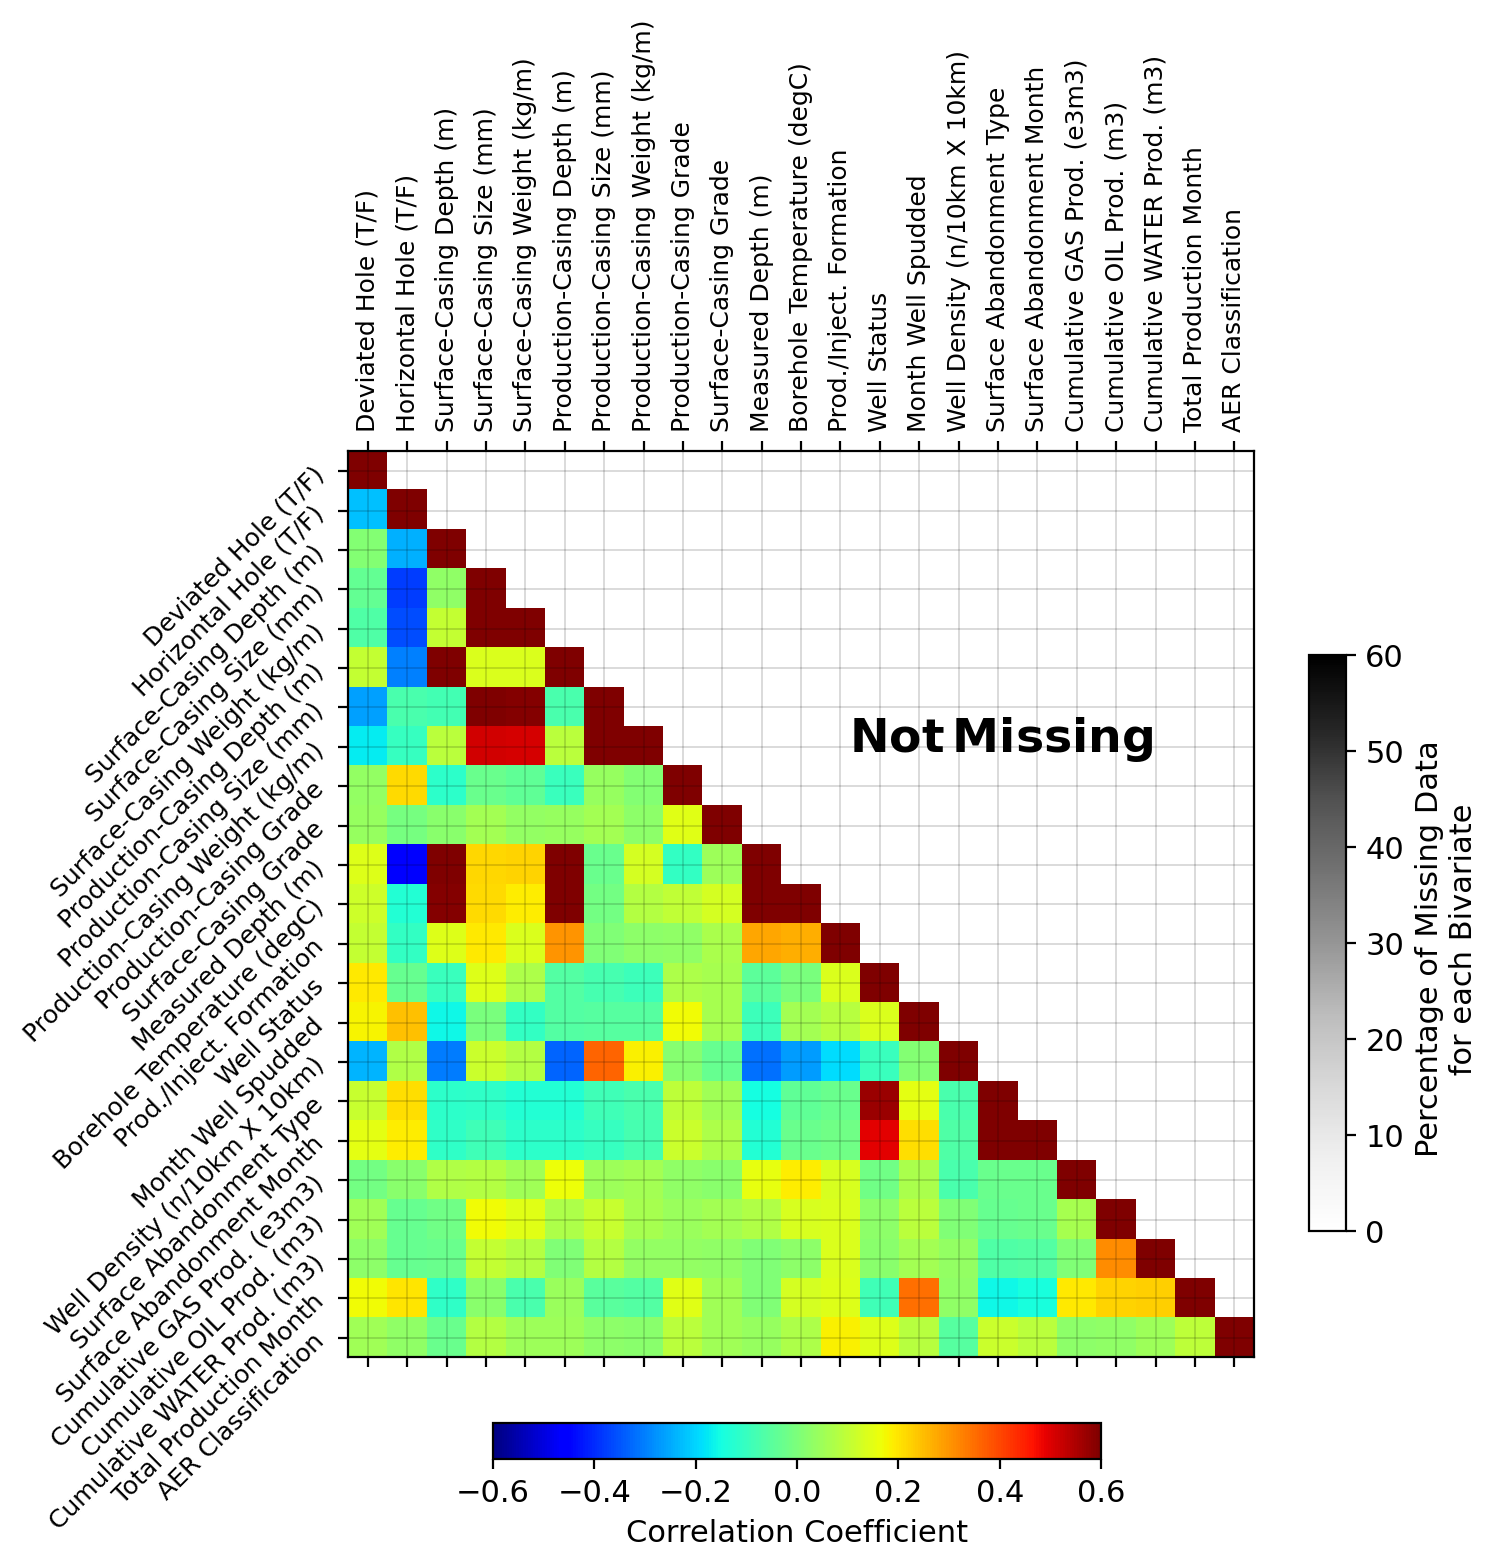

In [22]:
# Plot correlation matrix after imputation
font = {'size'   : 11}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(8, 6), dpi= 200, facecolor='w', edgecolor='k')

# Matrix of correlation between features excluding x and y
try:
    colmn.remove('Y Coordinate')
    colmn.remove('X Coordinate')
except ValueError :
    pass
#
im =ax.matshow(corr___, cmap='jet', interpolation='nearest',vmin=-0.6, vmax=0.6)
#
cbaxes = fig.add_axes([0.32, 0.04, 0.38, 0.030])  
fig.colorbar(im,cax=cbaxes,shrink=0.5,label='Correlation Coefficient',orientation='horizontal')
ax.set_xticks(np.arange(len(corr___)))
ax.set_xticklabels(colmn,fontsize=6, rotation='vertical')
ax.set_yticks(np.arange(len(corr___)))
ax.set_yticklabels(colmn,fontsize=6)
ax.grid(color='k', linestyle='-', linewidth=0.1)

# Missing matrix between features excluding x and y
im =ax.matshow(Per_NaN_, cmap='Greys', interpolation='nearest',vmin=0, vmax=60)
cbaxe_ = fig.add_axes([0.83, 0.23, 0.023, 0.48]) 
fig.colorbar(im,cax=cbaxe_,shrink=0.7,label='Percentage of Missing Data \n for each Bivariate')

ax.set_xticks(np.arange(len(Per_NaN)))
ax.set_xticklabels(colmn,fontsize=9, rotation='vertical')
ax.set_yticks(np.arange(len(Per_NaN)))
ax.set_yticklabels(colmn,fontsize=9,rotation=45)
ax.grid(color='k', linestyle='-', linewidth=0.1)
plt.text(-750,50,r"$\bf {Not\,Missing}$",fontsize=17)

fig.savefig('./Figures/Fig6.png', dpi=500, bbox_inches='tight')
plt.show() 

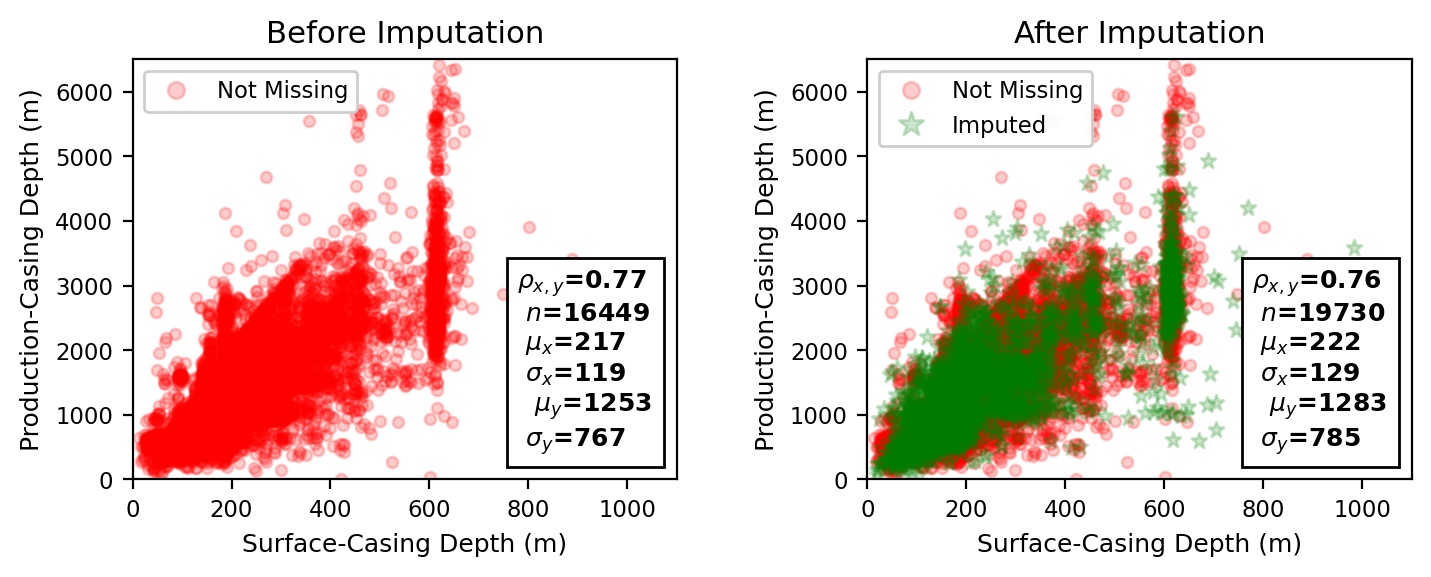

In [23]:
font = {'size'   :8.2 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(7.3, 5.3), dpi= 200, facecolor='w', edgecolor='k')

markersize=4

col_1=2; col_2=5
ax1 = plt.subplot(2,2,1)
x_=xy_dic_no_im[col_1,col_2][0]; y_=xy_dic_no_im[col_1,col_2][1]
CrossPlot(x_,y_,0,None,None,title='Before Imputation',xlabl=colm_[col_1],
          ylabl=colm_[col_2],loc=4,xlimt=(0,1100),ylimt=(0,6500),markersize=markersize,axt=ax1,scale=1.1,alpha=0.2,loc_1=2)

ax1 = plt.subplot(2,2,2)
df_xy_=df_xy.copy()
co1=colm_[col_1]
co2=colm_[col_2]
ind_na=df_xy.loc[(df_xy.isnull()[co1]) | (df_xy.isnull()[co2])].index
x__1=(df_xy_im[co1].iloc[ind_na]).to_numpy()
x__2=(df_xy_im[co2].iloc[ind_na]).to_numpy()
#ind_=df_xy.loc[~(df_xy.isnull()[co1]) & ~(df_xy.isnull()[co2])].index
x_=Final[:,col_1]; y_=Final[:,col_2]
x__nna=xy_dic_no_im[col_1,col_2][0]; y__nna=xy_dic_no_im[col_1,col_2][1]
CrossPlot(x_,y_,1,x__1,x__2,title='After Imputation',xlabl=colm_[col_1],
          ylabl=colm_[col_2],loc=4,xlimt=(0,1100),
          ylimt=(0,6500),markersize=markersize,x__nna=x__nna,y__nna=y__nna,axt=ax1,scale=1.1,alpha=0.2)

fig.tight_layout(pad=1.5) 
plt.subplots_adjust(wspace=0.35)
fig.savefig('./Figures/Fig7.png', dpi=500, bbox_inches='tight')

# Get Final Training Set

In [24]:
# Remove separate 'AER Classification' from dataset as target and remove 
# x 'X Coordinate' and y 'Y Coordinate' for only plotting
df_xy_im.drop(['X Coordinate','Y Coordinate'], axis=1, inplace=True)
#
class_=list(df_xy_im['AER Classification'])
df_xy_im.drop(['AER Classification'], axis=1, inplace=True)
columns_=list(df_xy_im.columns)
columns_RF=list(df_xy_im.columns)
x=df_xy_im

# Convert training and target to numpy 
x= x.to_numpy()
y = np.int_(class_)

x_train,y_train=x,y

In [25]:
# Percentage of missing value in each row
clm_all=train_set_strat.columns
miss_per=np.zeros((len(train_set_strat.index)))+np.nan
for i in train_set_strat.index:
    miss_per[i]=len(train_set_strat.iloc[i][train_set_strat.iloc[i].isnull()])/len(clm_all)

In [26]:
# Standardize Test, Train and Validation Data
scaler = StandardScaler()
scaler.fit(x_train)

# Standardize Train data
std_x_train  = scaler.transform(x_train)

In [27]:
# Make epmty array for training
Train_Accu=np.zeros((7))+np.nan
Train_Pre=np.zeros((7))+np.nan
Train_Rec=np.zeros((7))+np.nan
Train_Spe=np.zeros((7))+np.nan

# Make epmty array for validation
Valid_Accu=np.zeros((7))+np.nan
Valid_Pre=np.zeros((7))+np.nan
Valid_Rec=np.zeros((7))+np.nan
Valid_Spe=np.zeros((7))+np.nan

# Get Final Validation and Test Set

## Target Encoding  with Statistics from Training

In [28]:
#vali_set_strat['Well Status']=vali_set_strat['Well Status'].map(dic_TE_1)
#
vali_set_strat['Prod./Inject. Formation'].fillna('NA',inplace=True)
vali_set_strat['Prod./Inject. Formation']=vali_set_strat['Prod./Inject. Formation'].map(dic_TE_2)
#
vali_set_strat['Production-Casing Grade']=vali_set_strat['Production-Casing Grade'].map(dic_TE_3)
#
vali_set_strat['Surface-Casing Grade']=vali_set_strat['Surface-Casing Grade'].map(dic_TE_4)
#
vali_set_strat['Surface Abandonment Type'].fillna('NA',inplace=True)
vali_set_strat['Surface Abandonment Type']=vali_set_strat['Surface Abandonment Type'].map(dic_TE_5)
#
vali_set_strat['Deviated Hole (T/F)'].fillna('NA',inplace=True)
vali_set_strat['Deviated Hole (T/F)']=vali_set_strat['Deviated Hole (T/F)'].map(dic_TE_6)
#
vali_set_strat['Horizontal Hole (T/F)'].fillna('NA',inplace=True)
vali_set_strat['Horizontal Hole (T/F)']=vali_set_strat['Horizontal Hole (T/F)'].map(dic_TE_7)
#
vali_set_strat['Well Status'].fillna('NA',inplace=True)
vali_set_strat['Well Status']= vali_set_strat['Well Status'].map(dic_TE_8)
#
vali_set_strat['Surface Abandonment Month'].fillna(0,inplace=True)

In [29]:
#test_set_strat['Well Status']=test_set_strat['Well Status'].map(dic_TE_1)
#
test_set_strat['Prod./Inject. Formation'].fillna('NA',inplace=True)
test_set_strat['Prod./Inject. Formation']=test_set_strat['Prod./Inject. Formation'].map(dic_TE_2)
#
test_set_strat['Production-Casing Grade']=test_set_strat['Production-Casing Grade'].map(dic_TE_3)
#
test_set_strat['Surface-Casing Grade']=test_set_strat['Surface-Casing Grade'].map(dic_TE_4)
#
test_set_strat['Surface Abandonment Type'].fillna('NA',inplace=True)
test_set_strat['Surface Abandonment Type']=test_set_strat['Surface Abandonment Type'].map(dic_TE_5)
#
test_set_strat['Deviated Hole (T/F)'].fillna('NA',inplace=True)
test_set_strat['Deviated Hole (T/F)']=test_set_strat['Deviated Hole (T/F)'].map(dic_TE_6)
#
test_set_strat['Horizontal Hole (T/F)'].fillna('NA',inplace=True)
test_set_strat['Horizontal Hole (T/F)']=test_set_strat['Horizontal Hole (T/F)'].map(dic_TE_7)
#
test_set_strat['Well Status'].fillna('NA',inplace=True)
test_set_strat['Well Status']= test_set_strat['Well Status'].map(dic_TE_8)
#
test_set_strat['Surface Abandonment Month'].fillna(0,inplace=True)

## Imputation with Statistics from Training 

In [30]:
%%time
# Imputation of validation and test set
vali_set_im=cond_LU_Sim(vali_set_strat,ref_df=df_xy,seed=78)
test_set_im=cond_LU_Sim(test_set_strat,ref_df=df_xy,seed=39)

Wall time: 16.6 s


In [32]:
# Remove separate 'AER Classification' from dataset as target and remove 
# x 'X Coordinate' and y 'Y Coordinate' for only plotting
vali_set_im.drop(['X Coordinate','Y Coordinate'], axis=1, inplace=True)
test_set_im.drop(['X Coordinate','Y Coordinate'], axis=1, inplace=True)
#
class_vali=list(vali_set_im['AER Classification'])
class_test=list(test_set_im['AER Classification'])

# Convert training and target to numpy 
x_valid,y_valid=vali_set_im.drop(['AER Classification'], axis=1).to_numpy(),np.int_(class_vali)
#
x_test,y_test=test_set_im.drop(['AER Classification'], axis=1).to_numpy(),np.int_(class_test)

In [33]:
# Standardize Validation and test set using statistics from training data
std_x_valid = scaler.transform(x_valid)
std_x_test  = scaler.transform(x_test)

# OverUndersampling for Only Training set

In [ ]:
x=std_x_train
y=y_train
corr=df_xy_im.corr().to_numpy()

In [ ]:
%%time
# Undersampling and oversamping
r1_raw=pd.Series(y).value_counts()[1]/pd.Series(y).value_counts()[0]
#ra_1=np.arange(0.01,0.45,0.02)+r1_raw
#ra_2=np.arange(0.01,0.45,0.02)+r1_raw

ra_1=np.arange(0.01,0.45,0.02)+r1_raw
ra_2=np.arange(0.01,0.45,0.02)+r1_raw


x_over_under,y_over_under,ratio=[],[],[]
for ira in range(len(ra_1)):
    x_temp,y_temp=Over_Under_Sampling(x,y,ind=2,r1=ra_1[ira],r2=ra_1[ira],corr=corr,seed=34,mr=True,r3=miss_per)
    x_over_under.append(x_temp)
    y_over_under.append(y_temp)
    r_temp=pd.Series(y_temp).value_counts()[1]/pd.Series(y_temp).value_counts()[0]
    ratio.append(r_temp)

In [ ]:
# epmty array for over and undersampling ratios
Train_Accu_ov_un=np.zeros((len(ra_1),6))+np.nan
Train_Pre_ov_un=np.zeros((len(ra_1),6))+np.nan
Train_Rec_ov_un=np.zeros((len(ra_1),6))+np.nan 
Train_Spe_ov_un=np.zeros((len(ra_1),6))+np.nan
Train_AUC_ov_un=np.zeros((len(ra_1),6))+np.nan

# epmty array for Crossvalidation during over and undersampling  
Train_Accu_ov_un_during=np.zeros((len(ra_1),6))+np.nan
Train_Pre_ov_un_during=np.zeros((len(ra_1),6))+np.nan
Train_Rec_ov_un_during=np.zeros((len(ra_1),6))+np.nan 
Train_Spe_ov_un_during=np.zeros((len(ra_1),6))+np.nan
Train_AUC_ov_un_during=np.zeros((len(ra_1),6))+np.nan

# Make epmty array for validation
valid_Accu_ov_un=np.zeros((len(ra_1),6))+np.nan
valid_Pre_ov_un=np.zeros((len(ra_1),6))+np.nan
valid_Rec_ov_un=np.zeros((len(ra_1),6))+np.nan
valid_Spe_ov_un=np.zeros((len(ra_1),6))+np.nan
valid_AUC_ov_un=np.zeros((len(ra_1),6))+np.nan
valid_prob=np.zeros((7))+np.nan

# Make epmty array for test
test_Accu_ov_un=np.zeros((len(ra_1),6))+np.nan
test_Pre_ov_un=np.zeros((len(ra_1),6))+np.nan
test_Rec_ov_un=np.zeros((len(ra_1),6))+np.nan
test_Spe_ov_un=np.zeros((len(ra_1),6))+np.nan
test_AUC_ov_un=np.zeros((len(ra_1),6))+np.nan
test_prob=np.zeros((7))+np.nan

# Dummy (ie. random) Classifier

In [ ]:
i=0
# Train Model
dmy_clf = DummyClassifier(strategy="stratified",random_state=12)
dmy_clf.fit(std_x_train,y_train)
predictor=dmy_clf

# predict training and validation set
y_train_pred_dmy_clf=cross_val_predict(predictor,std_x_train,y_train, cv=3)

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=0
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_dmy_clf.reshape(-1,1),axt=ax1, title='Dummy Classifier')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec  

ax1=plt.subplot(1,2,2)
y_valid_pred_dmy_clf=dmy_clf.predict_proba(std_x_valid)
j=0
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_dmy_clf,axt=ax1, title='Dummy Classifier')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

# Stochastic Gradient Decent 

In [41]:
#sgd = SGDClassifier(loss='log',random_state=42)  
#eta0=list(np.linspace(0.05,0.5, 10))
#params = {'penalty': ['l1','l2','elasticnet', 'none'],'eta0': eta0, 'early_stopping':[False,True]}
#sgd_search_cv = GridSearchCV(sgd, params, cv=3,scoring="recall") 
#sgd_search_cv.fit(std_x_train,y_train)
#
## Optimum values for the hyperparameters are:
#sgd_search_cv.best_params_
print('Results from GridSearchCV:', {'early_stopping': True, 'eta0': 0.05, 'penalty': 'none'})

Results from GridSearchCV: {'early_stopping': True, 'eta0': 0.05, 'penalty': 'none'}


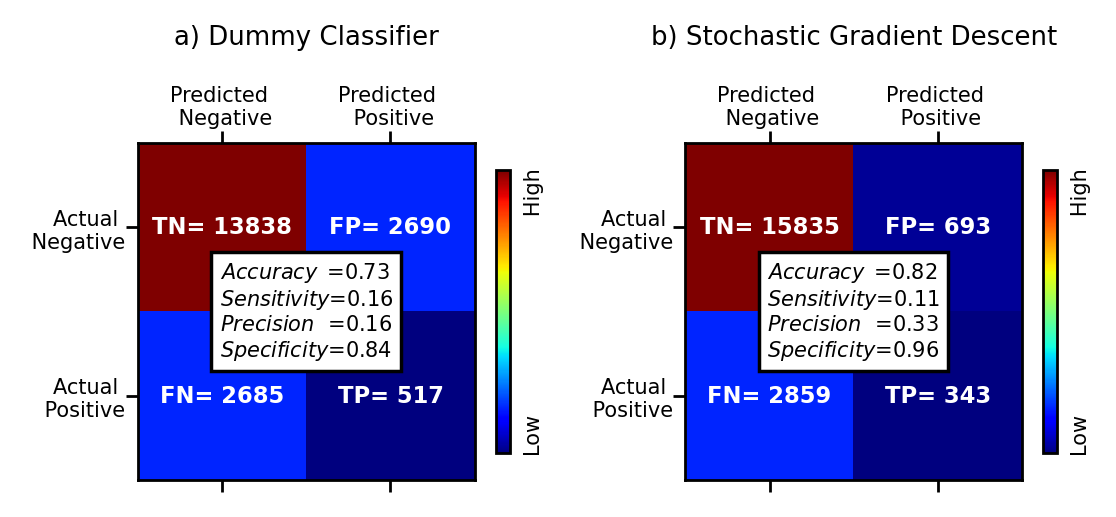

In [42]:
# Train Model
sgd= SGDClassifier(loss='log',early_stopping=True, eta0= 0.05, penalty='none',random_state=42)  
predictor=sgd
font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_dmy_clf.reshape(-1,1),axt=ax1, 
                    title='a) Dummy Classifier',t_fontsize=7.5,t_y=1.23,
                    x_fontsize=6,y_fontsize=6)

ax1=plt.subplot(1,2,2)
y_train_pred_sgd=cross_val_predict(sgd,std_x_train,y_train, cv=3, method='predict_proba')
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_sgd,axt=ax1, 
                title='b) Stochastic Gradient Descent',t_fontsize=7.5,t_y=1.23,
                x_fontsize=6,y_fontsize=6)

plt.subplots_adjust(wspace=0.3)
plt.savefig('./Figures/Fig8-1.png', dpi=500, bbox_inches='tight')

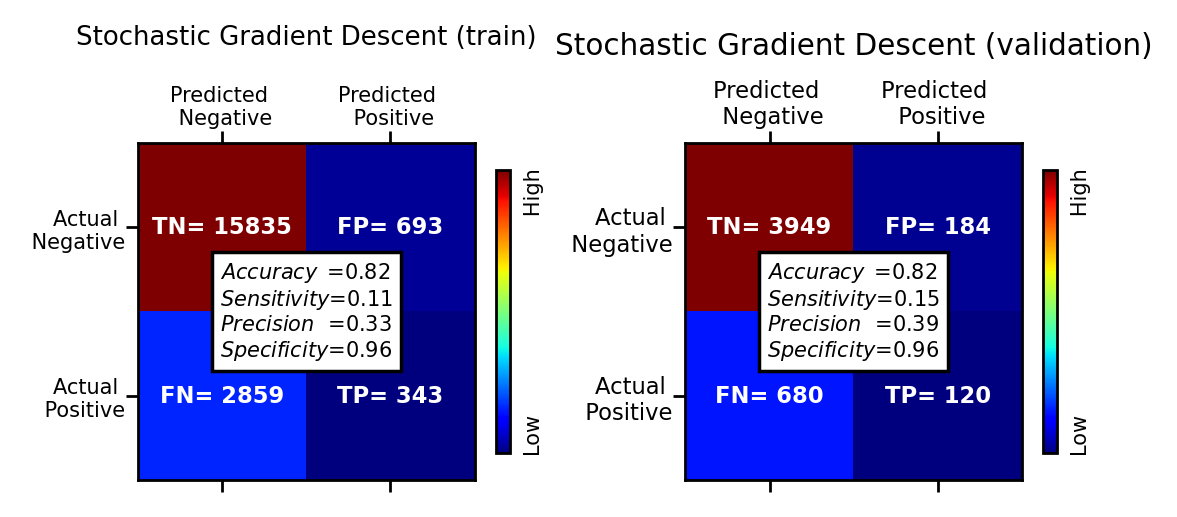

In [43]:
# Train Model
sgd= SGDClassifier(loss='log',early_stopping=True, eta0= 0.05, penalty='none',random_state=42)  
predictor=sgd
font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=1  
# predict training and validation set
y_train_pred_sgd=cross_val_predict(sgd,std_x_train,y_train, cv=3, method='predict_proba')

acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_sgd,axt=ax1, 
                title='Stochastic Gradient Descent (train)',t_fontsize=7.5,t_y=1.23,
                x_fontsize=6,y_fontsize=6)
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec

ax1=plt.subplot(1,2,2)
sgd.fit(std_x_train,y_train)
y_valid_pred_sgd=sgd.predict_proba(std_x_valid)
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_sgd,axt=ax1, title='Stochastic Gradient Descent (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

plt.subplots_adjust(wspace=0.3)
#plt.savefig('./Figures/Fig8-1.png', dpi=500, bbox_inches='tight')

# Logistic Regression

In [45]:
#log_reg = LogisticRegression(solver="lbfgs",random_state=42)
#log_reg.fit(std_x_train,y_train)
#
#params = {'penalty': ['l1','l2','elasticnet', 'none'], 'max_iter':[5,10,20,30,50],'C':[0.1,0.5,1,10,20,50]}
#lr_search_cv = GridSearchCV(log_reg, params, cv=5,scoring="recall") 
#lr_search_cv.fit(std_x_train,y_train)
#
## Optimum values for the hyperparameters are:
#lr_search_cv.best_params_
print('Results from GridSearchCV:', {'C': 0.1, 'max_iter': 30, 'penalty': 'none'})

Results from GridSearchCV: {'C': 0.1, 'max_iter': 30, 'penalty': 'none'}


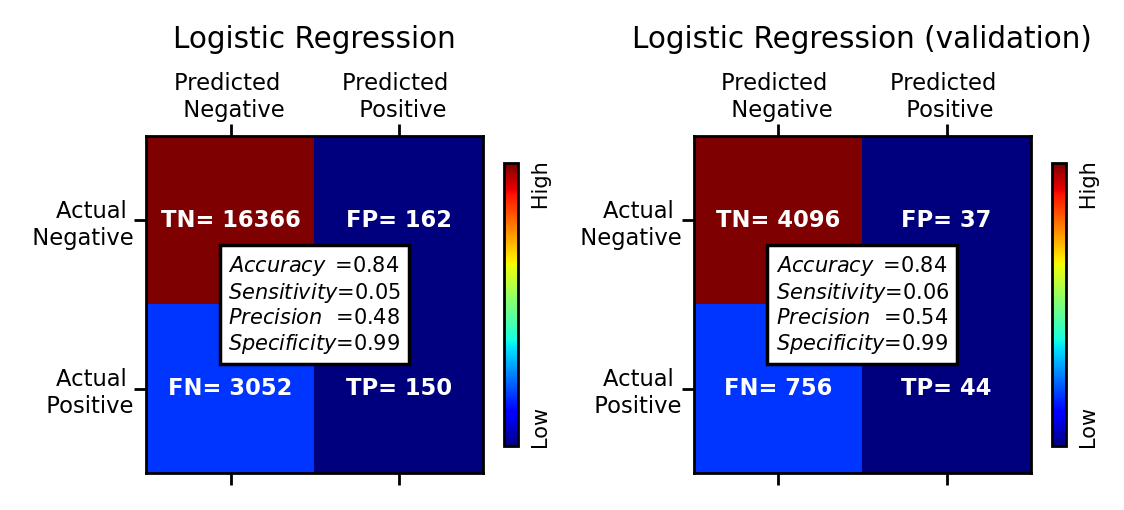

In [46]:
# Train Model
log_reg = LogisticRegression(max_iter=30, penalty='none',C=0.1,random_state=42)  
log_reg.fit(std_x_train,y_train)
predictor=log_reg

# predict training and validation set
y_train_pred_log_reg=cross_val_predict(predictor,std_x_train,y_train, cv=3, method='predict_proba')

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=2
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_log_reg,axt=ax1, title='Logistic Regression')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec

ax1=plt.subplot(1,2,2)
log_reg.fit(std_x_train,y_train)
y_valid_pred_log_reg=log_reg.predict_proba(std_x_valid)
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_log_reg,axt=ax1, title='Logistic Regression (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

plt.subplots_adjust(wspace=0.3)

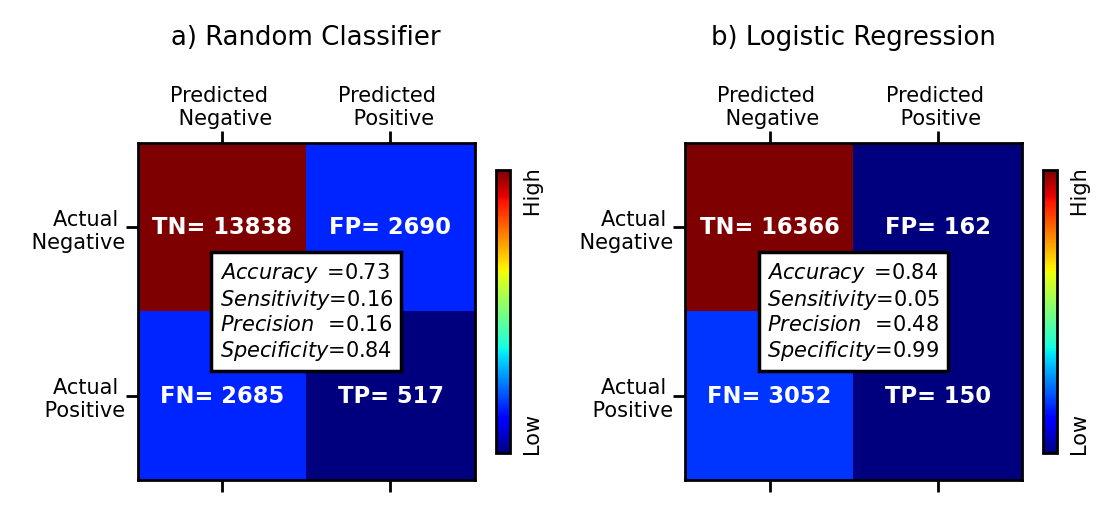

In [47]:
# Train Model
log_reg = LogisticRegression(max_iter=30, penalty='none',C=0.1,random_state=42)  
predictor=log_reg

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_dmy_clf.reshape(-1,1),axt=ax1, 
                    title='a) Random Classifier',t_fontsize=7.5,t_y=1.23,
                    x_fontsize=6,y_fontsize=6)

ax1=plt.subplot(1,2,2)
y_train_pred_log_reg=cross_val_predict(log_reg,std_x_train,y_train, cv=3, method='predict_proba')
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_log_reg,axt=ax1, 
                title='b) Logistic Regression',t_fontsize=7.5,t_y=1.23,
                x_fontsize=6,y_fontsize=6)

plt.subplots_adjust(wspace=0.3)
plt.savefig('./Figures/Fig9.png', dpi=500, bbox_inches='tight')

# Support Vector Machine

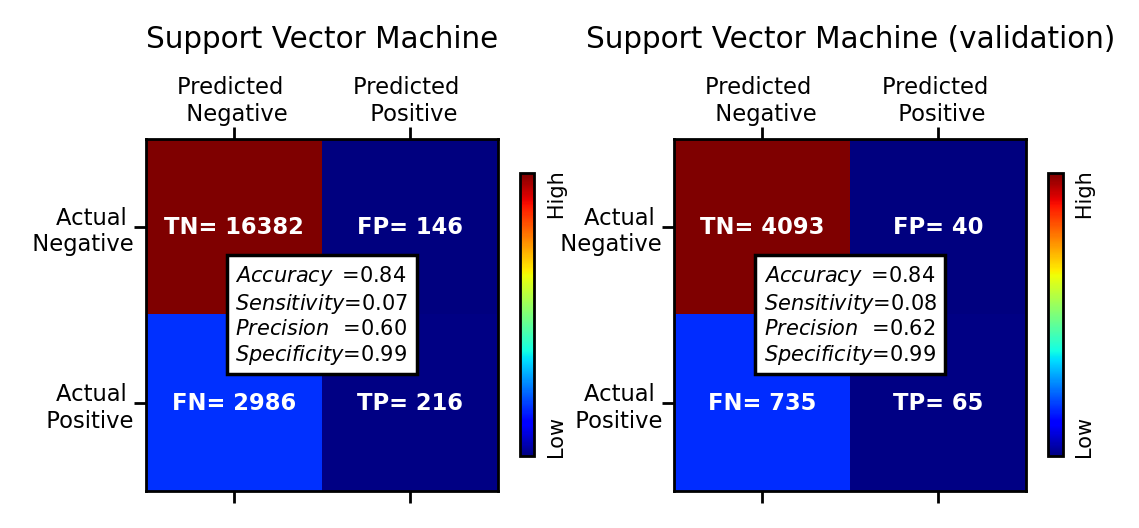

In [49]:
# Train Model
svm = SVC(kernel='rbf',C=2,probability=True,random_state=42)
svm.fit(std_x_train,y_train)
predictor=svm

# predict training and validation set
y_train_pred_svm=cross_val_predict(predictor,std_x_train,y_train, cv=3, method='predict_proba')

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=3
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_svm,axt=ax1, title='Support Vector Machine')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec
ax1=plt.subplot(1,2,2)
svm.fit(std_x_train,y_train)
y_valid_pred_svm=svm.predict_proba(std_x_valid)

acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_svm,axt=ax1, title='Support Vector Machine (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

# Adaptive Boosting with Decision Trees

In [51]:
#np.random.seed(42) 
#tree =DecisionTreeClassifier()
#ada_tree = AdaBoostClassifier(tree ,random_state=42)
#params = {'n_estimators': [20,40,50,100,],'learning_rate': [0.05,0.25,0.5,0.7],
#          'algorithm':['SAMME', 'SAMME.R']}
#ada_tree_search_cv = GridSearchCV(ada_tree, params, cv=3,scoring="recall") 
#ada_tree_search_cv.fit(std_x_train,y_train)
#
## Optimum values for the hyperparameters are:
#ada_tree_search_cv.best_params_

print('Results from GridSearchCV:', {'algorithm': 'SAMME', 'learning_rate': 0.05, 'n_estimators': 20})

Results from GridSearchCV: {'algorithm': 'SAMME', 'learning_rate': 0.05, 'n_estimators': 20}


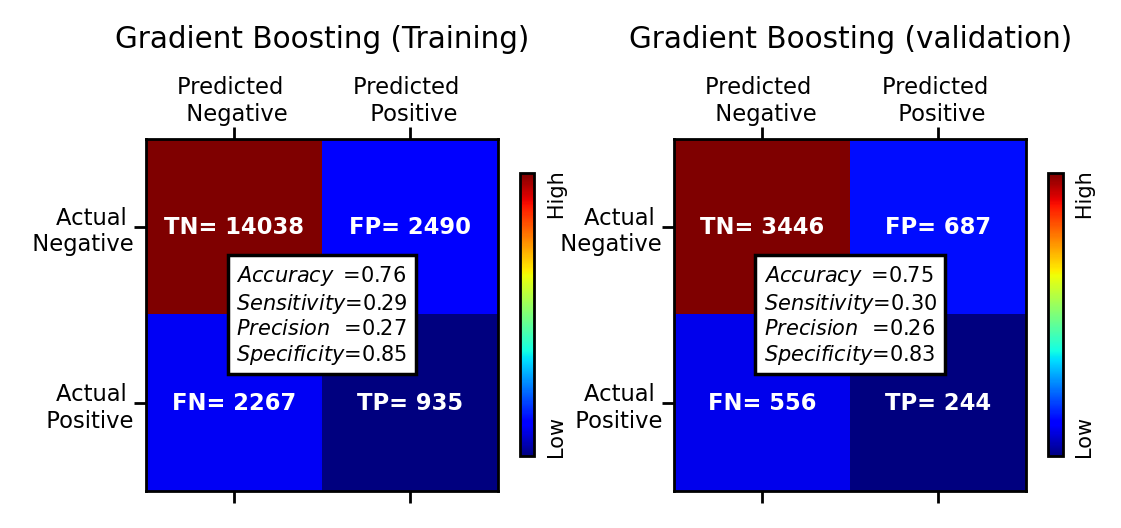

In [52]:
tree =DecisionTreeClassifier()
ada_tree = AdaBoostClassifier(tree,n_estimators=30, algorithm= 'SAMME', learning_rate= 0.2, random_state=102)   
ada_tree.fit(std_x_train,y_train)
predictor=ada_tree

# predict training and validation set
y_train_pred_ada_tree=cross_val_predict(predictor,std_x_train,y_train, cv=3, method='predict_proba')

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=4
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_ada_tree,axt=ax1, title='Gradient Boosting (Training)')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec

ax1=plt.subplot(1,2,2)
ada_tree.fit(std_x_train,y_train)
y_valid_pred_ada_tree=ada_tree.predict_proba(std_x_valid)
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_ada_tree,axt=ax1, title='Gradient Boosting (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

# Random Forest

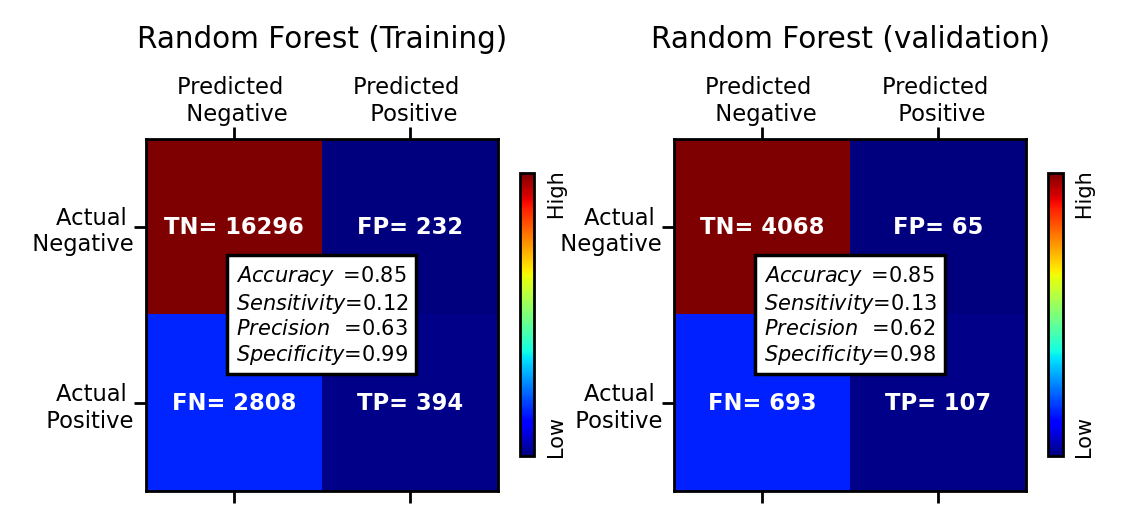

In [142]:
# Random Forest
rnf = RandomForestClassifier( random_state=42)
rnf.fit(std_x_train,y_train)
predictor=rnf

pickle.dump(rnf, open(f'./Trained_models/rf_no_ratio.sav', 'wb'))

# predict training and validation set
y_train_pred_rnf=cross_val_predict(predictor,std_x_train,y_train, cv=5, method='predict_proba')

font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=5
acr, prec, reca, spec=Conf_Matrix(y_train,y_train_pred_rnf,axt=ax1, title='Random Forest (Training)')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec

ax1=plt.subplot(1,2,2)
rnf.fit(std_x_train,y_train)
y_valid_pred_rnf=rnf.predict_proba(std_x_valid)
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_rnf,axt=ax1, title='Random Forest (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  

## Importance of Features 

In [56]:
list_imp=[]
nsim=100
for i in range(nsim):
    rnf = RandomForestClassifier()
    rnf.fit(std_x_train,y_train)
    feature_importances = rnf.feature_importances_
    tmp=sorted(zip(feature_importances, columns_RF), reverse=True)
    list_imp.append(tmp)        

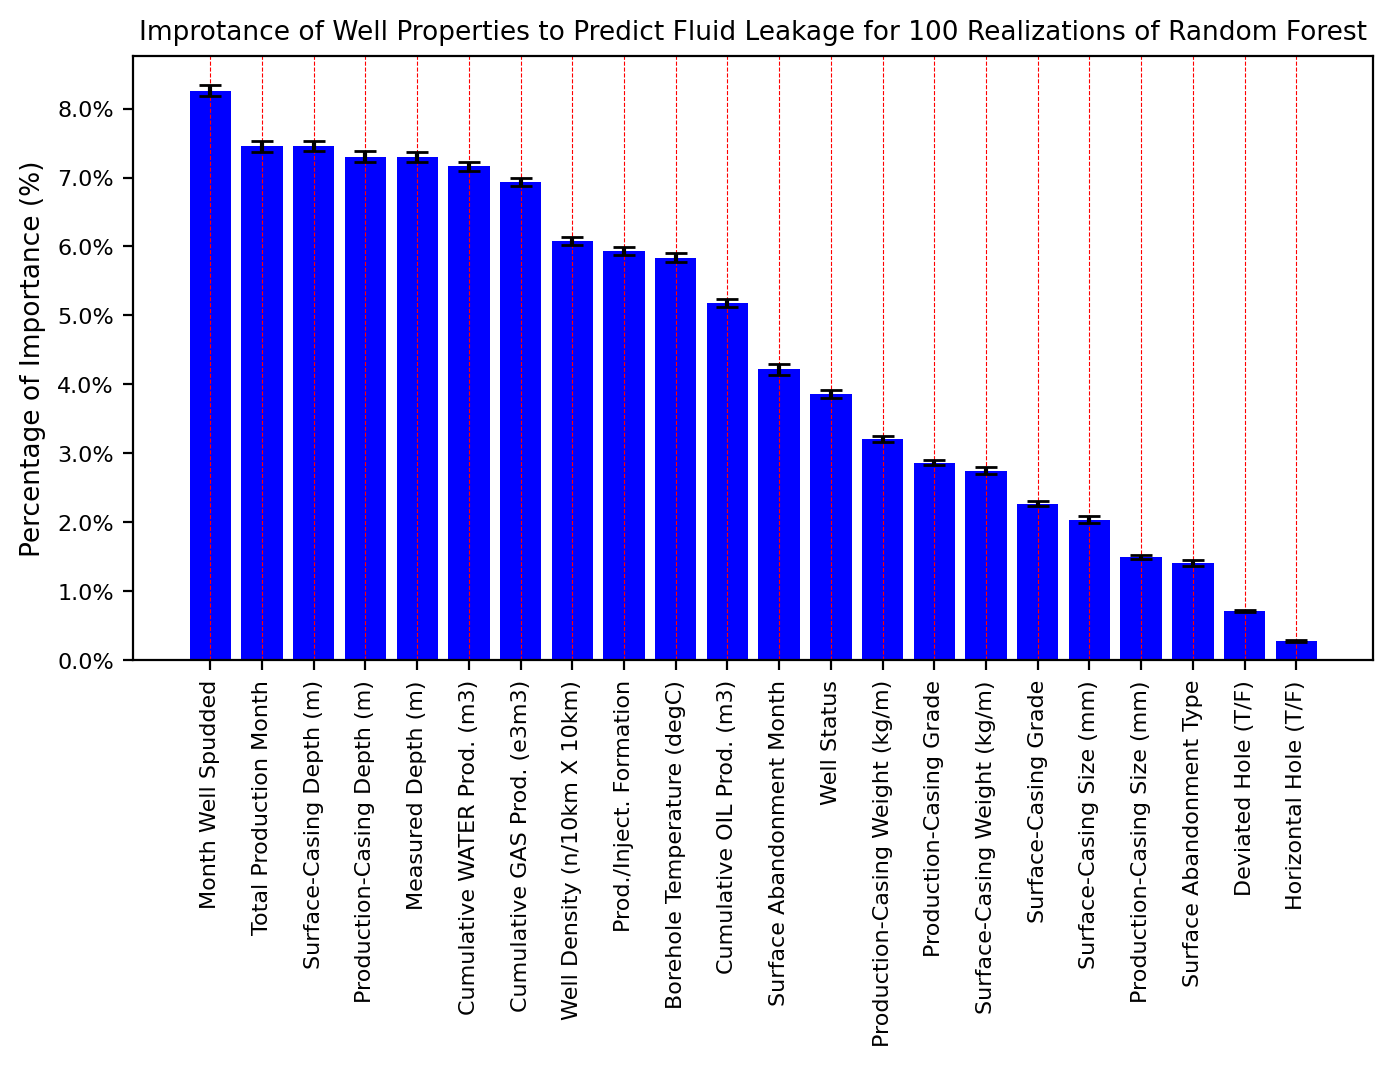

In [57]:
# Calculate mean and variance of importance features for all runs
mean_=[] ; sd_=[]       
col_=[]; val_=[]
for j in range(nsim):
    tmp=list_imp[j]
    tmp_val=[]; tmp_col=[]
    for k in range(len(columns_RF)):
        tmp_val.append(tmp[k][0])
        tmp_col.append(tmp[k][1]) 
    col_.append(tmp_col)    
    val_.append(tmp_val)   
for k in range(len(columns_RF)):
    tmp=[]
    for i in range(nsim):
        ind=col_[i].index(columns_RF[k])
        tmp.append(val_[i][ind])
    mean_.append(np.mean(tmp))  
    sd_.append(np.sqrt(np.var(tmp)))
    
# Sort features based on the percentage of importance
sort_array_mean=np.sort(mean_, axis=0)
sort_array_mean=sort_array_mean[::-1]
sort_colms=[]
sort_sd_=[]
for i in range(len(sort_array_mean)):
    ind=mean_.index(sort_array_mean[i])
    sort_colms.append(columns_RF[ind])
    sort_sd_.append(sd_[ind])
        
#
font = {'size'   : 8}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k')
index1 = np.arange(len(sort_colms))
ax1.bar(index1, sort_array_mean,yerr=sort_sd_, align='center', alpha=1, ecolor='black', capsize=4,color='b')
#ax1.set_xlabel('Well Properties',fontsize='9.5')
plt.title('Improtance of Well Properties to Predict Fluid Leakage for 100 Realizations of Random Forest',fontsize=9.5)
ax1.set_ylabel('Percentage of Importance (%)',fontsize='9.5')
ax1.set_xticks(np.arange(len(columns_RF)))
ax1.set_xticklabels(sort_colms,fontsize=8, rotation=90)     
plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
ax1.xaxis.grid(color='r', linestyle='--', linewidth=0.4) 
plt.savefig('./Figures/Fig12_Feature_Importance.pdf', dpi=500, bbox_inches='tight')
plt.show()   

## Under & Oversampling 

In [58]:
def Ove_Und_During_Cross(x,y,model_tmp,ind,r1,r2,corr,seed=34,cv=3,
                         NN=False,batch_size=32,verbose=0,epochs=10):
    """
    Implement K-Fold cross validation during oversampling
    """
    from sklearn.base import clone

    # Cross-validate
    # Use for StratifiedKFold classification
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42) 
    oos_pred = []
    y_real=[]
    model_=[]
    # Must specify y StratifiedKFold for
    ir=1
    for train, test in kf.split(x,y):   
        x_trn = x[train]
        y_trn = y[train]
        #
        x_tst = x[test]
        y_tst = y[test]  
        
        x_over_under,y_over_under=Over_Under_Sampling(x_trn,y_trn,ind,r1
                            ,r2,corr,seed+ir,r3=None)
    
        # Fit Model for over undersample data
        if (NN==True):
            model=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 50 ) 
            model.fit(x_over_under,y_over_under,batch_size=batch_size,verbose=verbose,epochs=epochs) 
            model_.append(model)            
        else:
            model_tmp.random_state=seed+ir
            model=clone(model_tmp)
            model.fit(x_over_under,y_over_under)
            model_.append(model)
        
        # Predict on test fold
        pred = list(np.ravel(np.array(model.predict(x_tst), dtype='float')))
        oos_pred.append(pred)
        y_real.append(y_tst)
        ir+=1
    oos_pred=np.concatenate(oos_pred).ravel()
    y_real=np.concatenate(y_real).ravel()
    return oos_pred,y_real,model_

In [59]:
%%time
j=4
rnf = RandomForestClassifier(n_estimators=100, max_depth= 10, min_samples_split= 4, bootstrap= True, random_state=42)
predictor=rnf
AUC_t=[]
model__ratio=[]
for i in range(len(ra_1)):
    # Cross Validation after Over-undersampling
    y_train_pred=cross_val_predict(predictor,x_over_under[i], y_over_under[i], cv=5, method='predict_proba') 
    acr, prec, reca, spec=Conf_Matrix(y_over_under[i],y_train_pred,axt=ax1,plot=False)
    Train_Accu_ov_un[i,j]=acr
    Train_Pre_ov_un[i,j]=prec
    Train_Rec_ov_un[i,j]=reca
    Train_Spe_ov_un[i,j]=spec
    fpr, tpr, thresold = roc_curve(y_over_under[i], y_train_pred[:,1])
    Train_AUC_ov_un[i,j]=auc(fpr, tpr)
    
    # Cross Validation during Over-undersampling
    y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,predictor,ind=2,r1=ra_1[i],r2=ra_2[i],
                                             corr=corr,seed=34,cv=5)
    model__ratio.append(model__)
    acr, prec, reca, spec=Conf_Matrix(y_real,y_train_pred.reshape(-1,1),axt=ax1,plot=False)
    Train_Accu_ov_un_during[i,j]=acr
    Train_Pre_ov_un_during[i,j]=prec
    Train_Rec_ov_un_during[i,j]=reca
    Train_Spe_ov_un_during[i,j]=spec
    fpr, tpr, thresold = roc_curve(y_real, y_train_pred)
    Train_AUC_ov_un_during[i,j]=auc(fpr, tpr)       

Wall time: 38min 23s


# Neural Network

## Optimum Hyperparameters

In [60]:
######## This cell may take a couple of hours to find optimum hyperparameters ####### 
#
## define the grid search parameters: different optimizers, initialization, and number of neurons
#param_grid = {'optimizer': ['RMSprop', 'Adagrad',  'Adam'],
#             'init_mode' : ['uniform', 'lecun_uniform','he_normal', 'he_uniform'],'neurons' : [20, 50, 100]}
#
## Run Keras Classifier 
#model_NN = KerasClassifier(build_fn=DNN)
#model_NN. _estimator_type = "classifier"
#
## Apply Scikit Learn GridSearchCV
#grid = GridSearchCV(estimator=model_NN, param_grid=param_grid, cv=3,scoring='recall')
#
## Early stopping to avoid overfitting
#monitor= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5, verbose=0, mode='auto')
#grid_result = grid.fit(std_x_train,y_train,batch_size=32,validation_data=
#                       (std_x_Validation,y_Validation),callbacks=[monitor],
#                   verbose=0,epochs=1000)
#
## Define best hyperparameters
#predictor=grid_result.best_estimator_
#
## Summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))
#    

print('Results from GridSearchCV:', {'init_mode': 'uniform', 'neurons': 50, 'optimizer': 'Adam'})

Results from GridSearchCV: {'init_mode': 'uniform', 'neurons': 50, 'optimizer': 'Adam'}


In [61]:
## Divid training data into smaller training set and validation set for early stopping.
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#x=std_x_train
#y=y_train
#for train_index, test_index in split.split(x,y):
#    Smaller_x, Smaller_y = x[train_index],y[train_index]
#    Validation_x, Validation_y  = x[test_index],y[test_index]

In [62]:
%%time
# Call Function with fined-tune numebr of neurons
model_NN=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 20 )  

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5,patience=3, mode='auto')
history=model_NN.fit(std_x_train,y_train,batch_size=64,validation_data=
          (std_x_valid,y_valid),callbacks=[monitor],verbose=0,epochs=1000)

Wall time: 4.66 s


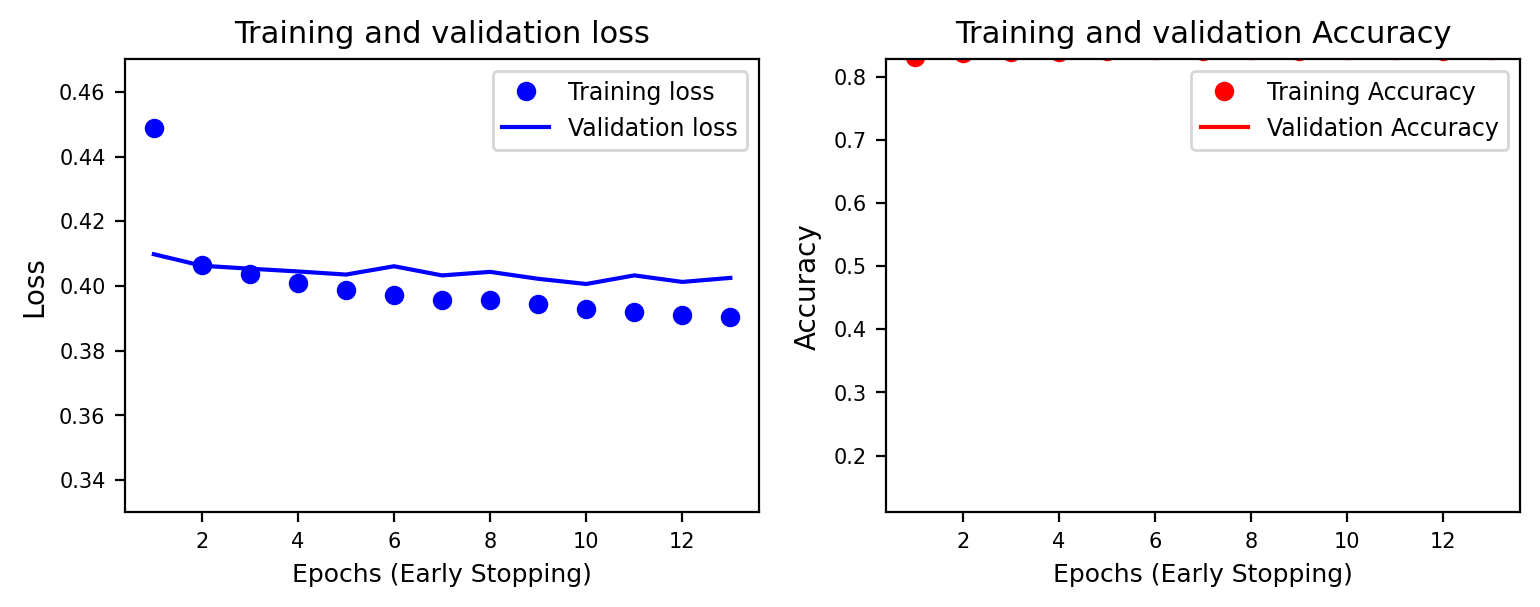

In [63]:
# Summary of parameters and plotting
plot_NN(history, ylim_1=[0.33, 0.47], ylim_2=[0.11, 0.827])

## Bootstraping (Neural Network)

In [64]:
# Find optimum number of epoches by bootstraping
x=std_x_train
y=y_train
model_NN=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 20 )  
epoches=boots_epoch(x, y,model_NN,min_delta=1e-5,patience=10,n_splits=50)
print('Optimum number of epoches: ',epoches)

Optimum number of epoches:  10


In [65]:
# Apply K-Fold cross validation for Neural Network
model_NN=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 20 )  

# Training set
x=std_x_train
y=y_train
y_train_pred_DNN,y_real_NN=DNN_K_Fold_Cross(x,y,model_NN,epochs=epoches)

In [66]:
pred=model_NN.predict(std_x_train)
fpr, tpr, thresold = roc_curve(y_real_NN,y_train_pred_DNN)
auc(fpr, tpr)

0.727571240944521

617/617 [==============================] - 0s 740us/step - loss: 0.3830 - accuracy: 0.8474


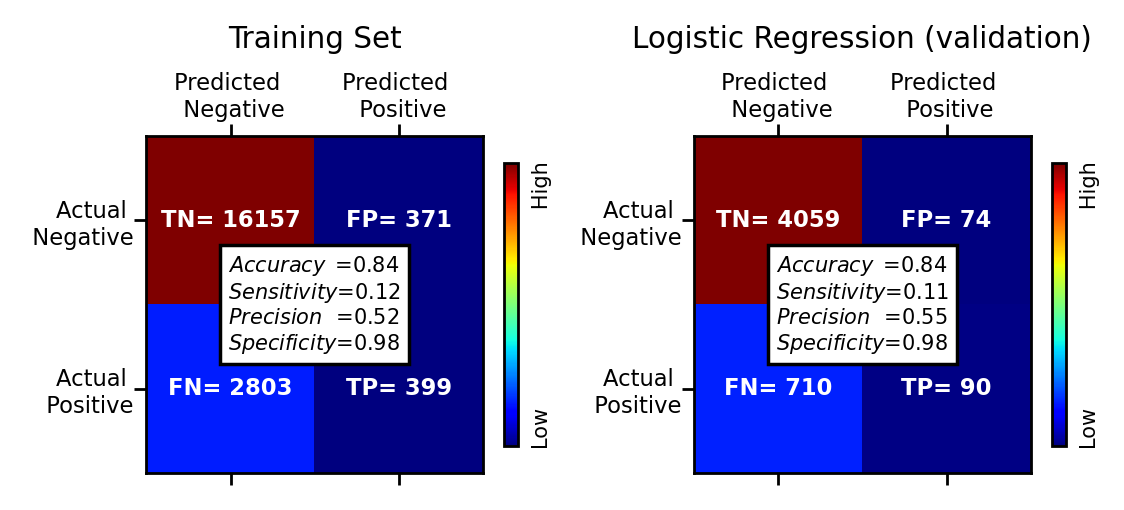

In [67]:
font = {'size'   : 6}
plt.rc('font', **font)
fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')  
ax1=plt.subplot(1,2,1)
j=6
acr, prec, reca, spec=Conf_Matrix(y_real_NN,y_train_pred_DNN.reshape(-1,1),axt=ax1, title='Training Set')
Train_Accu[j]=acr
Train_Pre[j]=prec
Train_Rec[j]=reca
Train_Spe[j]=spec

ax1=plt.subplot(1,2,2)
model_NN.fit(std_x_train,y_train)
y_valid_pred_model_NN=model_NN.predict_proba(std_x_valid)
acr, prec, reca, spec=Conf_Matrix(y_valid,y_valid_pred_model_NN,axt=ax1, title='Logistic Regression (validation)')
Valid_Accu[j]=acr
Valid_Pre[j]=prec
Valid_Rec[j]=reca
Valid_Spe[j]=spec  
plt.subplots_adjust(wspace=0.3)

# Area Under Curve (AUC) 

In [69]:
# Make epmty array for test
Test_Accu=np.zeros((7))+np.nan
Test_Pre=np.zeros((7))+np.nan
Test_Rec=np.zeros((7))+np.nan
Test_Spe=np.zeros((7))+np.nan

In [70]:
##################  Test set ##################

dmy_clf = DummyClassifier(strategy="stratified",random_state=12)
dmy_clf.fit(std_x_train,y_train)
y_test_pred_dmy_clf=dmy_clf.predict_proba(std_x_test)
j=0
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_dmy_clf,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec  
#
sgd= SGDClassifier(loss='log',early_stopping=True, eta0= 0.05, penalty='none',random_state=42)  
sgd.fit(std_x_train,y_train)
y_test_pred_sgd=sgd.predict_proba(std_x_test)
j=1
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_sgd,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec  
#
log_reg = LogisticRegression(max_iter=30, penalty='none',C=0.1,random_state=42)  
log_reg.fit(std_x_train,y_train)
y_test_pred_log_reg=log_reg.predict_proba(std_x_test)
j=2
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_log_reg,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec  
#
svm = SVC(kernel='rbf',C=2,probability=True,random_state=42)
svm.fit(std_x_train,y_train)
y_test_pred_svm=svm.predict_proba(std_x_test)
j=3
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_svm,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec  
#
tree =DecisionTreeClassifier()
ada_tree = AdaBoostClassifier(tree,n_estimators=30, algorithm= 'SAMME', learning_rate= 0.2, random_state=102)   
ada_tree.fit(std_x_train,y_train)
y_test_pred_ada_tree=ada_tree.predict_proba(std_x_test)
j=4
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_ada_tree,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec  
#
rnf = RandomForestClassifier(random_state=42)
rnf.fit(std_x_train,y_train)
y_test_pred_rnf=rnf.predict_proba(std_x_test)
j=5
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_rnf,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec 
#
model_NN=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 20 )  
model_NN.fit(std_x_train,y_train)
y_test_pred_model_NN=model_NN.predict_proba(std_x_test)
j=6
acr, prec, reca, spec=Conf_Matrix(y_test,y_test_pred_model_NN,axt=None, plot=None)
Test_Accu[j]=acr
Test_Pre[j]=prec
Test_Rec[j]=reca
Test_Spe[j]=spec 

617/617 [==============================] - 1s 812us/step - loss: 0.4323 - accuracy: 0.8342


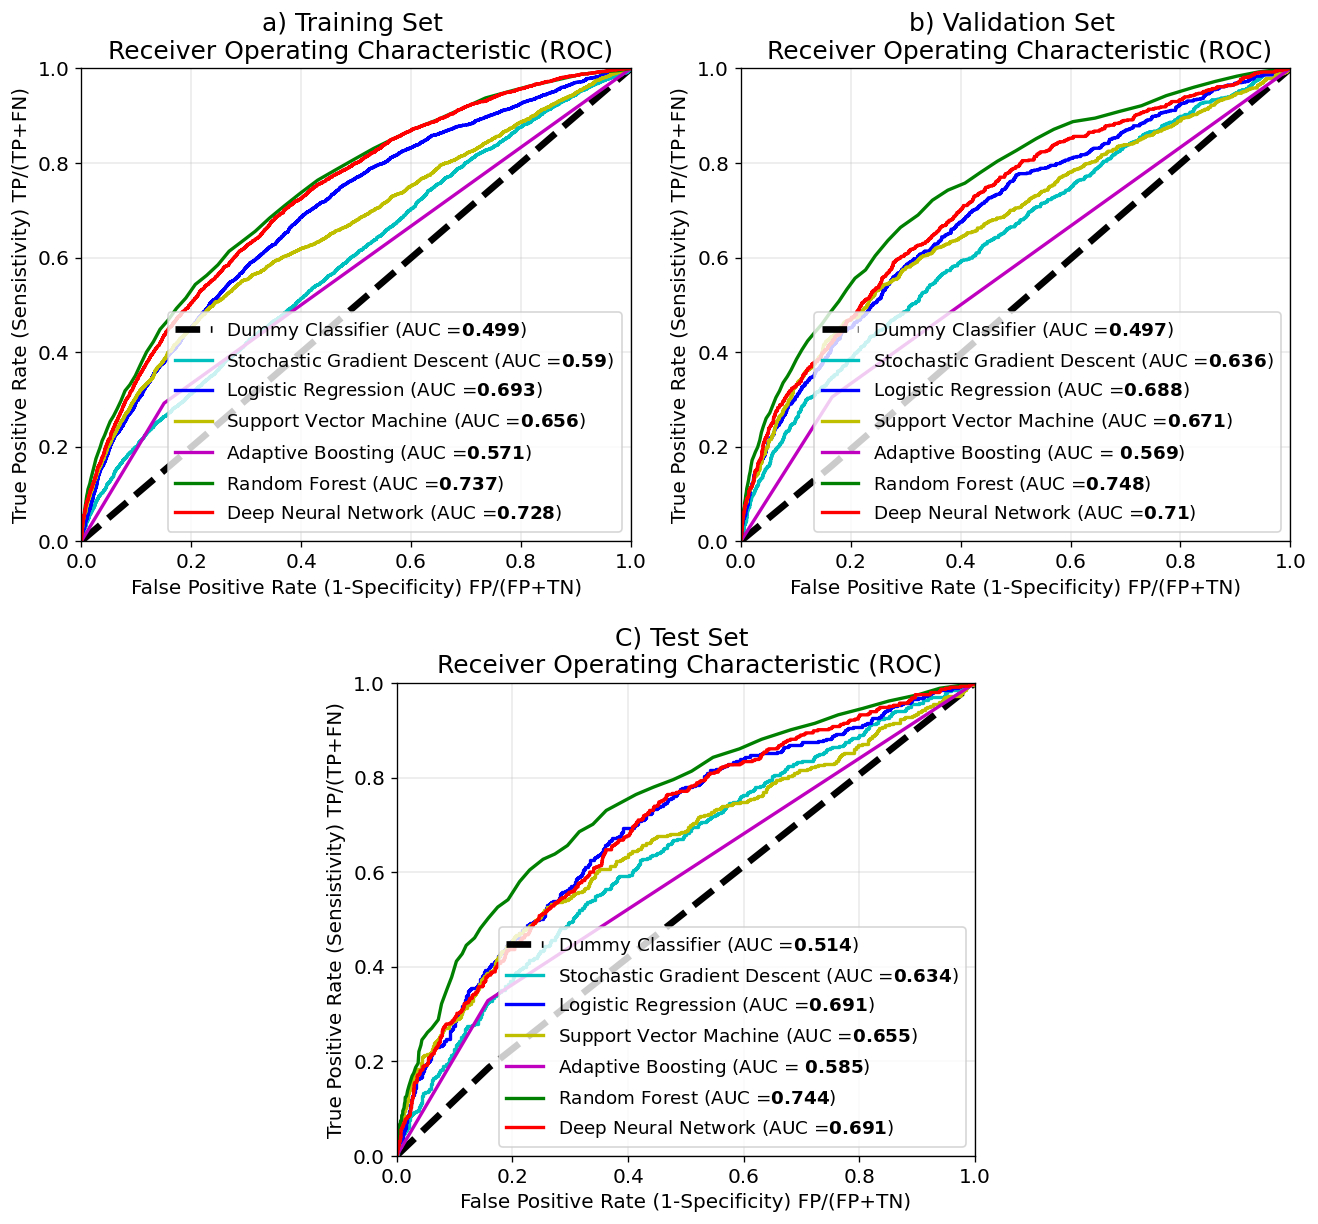

In [71]:
font = {'size' : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(13,12), dpi= 120, facecolor='w', edgecolor='k')

##################  Training set ##################

gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(2,2,1)

training_AUC=[]
# Random Classifier
y=y_train
pred=y_train_pred_dmy_clf
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'k--', linewidth=4,label='Dummy Classifier (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Stochastic Gradient Descent
y=y_train
pred=y_train_pred_sgd[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'c', linewidth=2,label='Stochastic Gradient Descent (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Logistic Regression
y=y_train
pred=y_train_pred_log_reg[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'b', linewidth=2,label='Logistic Regression (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# 'Support Vector Machine
y=y_train
pred=y_train_pred_svm[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'y-', linewidth=2,label='Support Vector Machine (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Adaptive Boosting
y=y_train
pred=y_train_pred_ada_tree[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'m', linewidth=2,label='Adaptive Boosting (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Random Forest
y=y_train
pred=y_train_pred_rnf[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'g', linewidth=2,label='Random Forest (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Neural Network
y=y_real_NN
pred=y_train_pred_DNN
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
training_AUC.append(roc_auc)
plt.plot(fpr, tpr,'r', linewidth=2,label='Deep Neural Network (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

#
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity) FP/(FP+TN)',fontsize=12)
plt.ylabel('True Positive Rate (Sensistivity) TP/(TP+FN)',fontsize=12)
plt.title('a) Training Set \n Receiver Operating Characteristic (ROC)',fontsize=15)
plt.grid(linewidth='0.25')
plt.legend(loc="lower right",fontsize=11)


##################  Validation set ##################

Valid_AUC=[]
ax1=plt.subplot(2,2,2)

# Random Classifier
y=y_valid
pred=y_valid_pred_dmy_clf[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'k--', linewidth=4,label='Dummy Classifier (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')


# Stochastic Gradient Descent
y=y_valid
pred=y_valid_pred_sgd[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'c', linewidth=2,label='Stochastic Gradient Descent (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Logistic Regression
y=y_valid
pred=y_valid_pred_log_reg[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'b', linewidth=2,label='Logistic Regression (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# 'Support Vector Machine
y=y_valid
pred=y_valid_pred_svm[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'y-', linewidth=2,label='Support Vector Machine (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Adaptive Boosting
y=y_valid
pred=y_valid_pred_ada_tree[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'m', linewidth=2,label='Adaptive Boosting (AUC = ' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Random Forest
y=y_valid
pred=y_valid_pred_rnf[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'g', linewidth=2,label='Random Forest (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Neural Network
y=y_valid
pred=y_valid_pred_model_NN
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Valid_AUC.append(roc_auc)
plt.plot(fpr, tpr,'r', linewidth=2,label='Deep Neural Network (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity) FP/(FP+TN)',fontsize=12)
plt.ylabel('True Positive Rate (Sensistivity) TP/(TP+FN)',fontsize=12)
plt.title('b) Validation Set \n Receiver Operating Characteristic (ROC)',fontsize=15)
plt.grid(linewidth='0.25')
plt.legend(loc="lower right",fontsize=11)

##################  Test set ##################
Test_AUC=[]
ax1=plt.subplot(gs[1, 1:3])
# Random Classifier
y=y_test
pred=y_test_pred_dmy_clf[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'k--', linewidth=4,label='Dummy Classifier (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')


# Stochastic Gradient Descent
y=y_test
pred=y_test_pred_sgd[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'c', linewidth=2,label='Stochastic Gradient Descent (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Logistic Regression
y=y_test
pred=y_test_pred_log_reg[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'b', linewidth=2,label='Logistic Regression (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# 'Support Vector Machine
y=y_test
pred=y_test_pred_svm[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'y-', linewidth=2,label='Support Vector Machine (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Adaptive Boosting
y=y_test
pred=y_test_pred_ada_tree[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'m', linewidth=2,label='Adaptive Boosting (AUC = ' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Random Forest
y=y_test
pred=y_test_pred_rnf[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'g', linewidth=2,label='Random Forest (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')

# Neural Network
y=y_test
pred=y_test_pred_model_NN
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
Test_AUC.append(roc_auc)
plt.plot(fpr, tpr,'r', linewidth=2,label='Deep Neural Network (AUC =' + r"$\bf{" + str(np.round(roc_auc,3)) + "}$"+')')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity) FP/(FP+TN)',fontsize=12)
plt.ylabel('True Positive Rate (Sensistivity) TP/(TP+FN)',fontsize=12)
plt.title('C) Test Set \n Receiver Operating Characteristic (ROC)',fontsize=15)
plt.grid(linewidth='0.25')
plt.legend(loc="lower right",fontsize=11)

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.3)

plt.savefig('./Figures/Fig10_AUC_taining_Validation.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Performance of the Models on Training Set

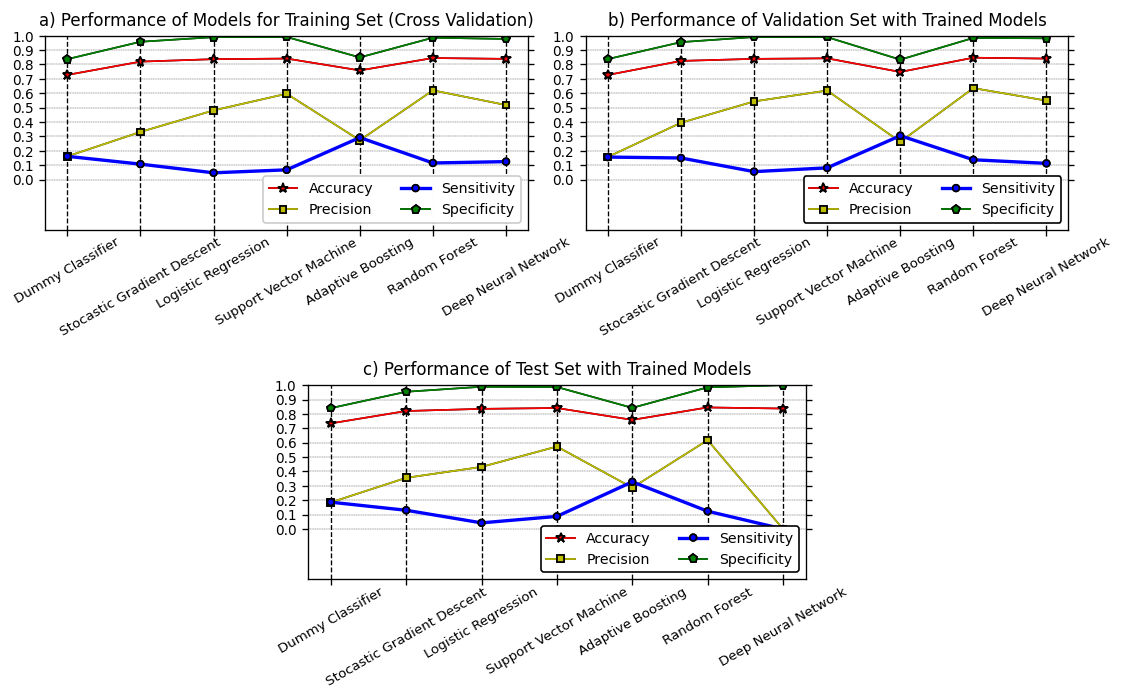

In [72]:
predictor= ['Dummy Classifier','Stocastic Gradient Descent','Logistic Regression',
            'Support Vector Machine','Adaptive Boosting',
            'Random Forest','Deep Neural Network']

font = {'size'   :8.5}
plt.rc('font', **font)


fig, ax1 = plt.subplots(figsize=(11, 6), dpi= 120, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(2,2,1)
ax1.plot(predictor,Train_Accu,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=6,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Train_Pre,'ys-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Precision',markeredgecolor='k')
ax1.plot(predictor,Train_Rec,'bo-',linewidth=2,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Train_Spe,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=5,label='Specificity',markeredgecolor='k')   
ax1.set_xticks(np.arange(len(predictor)))
ax1.set_xticklabels(predictor,y=0.03, rotation=30, fontsize=8)       
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) 
#plt.ylabel('Performance',fontsize=9)
plt.title('a) Performance of Models for Training Set (Cross Validation)',fontsize=10)
plt.ylim((-0.35,1.0))
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =3) 

plt.yticks([0,0.1,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1],y=0, fontsize=8.2)
ax1.yaxis.set_ticks_position('both')

ax1=plt.subplot(2,2,2)
ax1.plot(predictor,Valid_Accu,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=6,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Valid_Pre,'ys-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Precision',markeredgecolor='k') 
ax1.plot(predictor,Valid_Rec,'bo-',linewidth=2,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Valid_Spe,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=5,label='Specificity',markeredgecolor='k')   
ax1.set_xticks(np.arange(len(predictor)))
ax1.set_xticklabels(predictor,y=0.03, rotation=30, fontsize=8)       
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) 
plt.title('b) Performance of Validation Set with Trained Models',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =3) 
legend.get_frame().set_edgecolor("black")
plt.yticks([0,0.1,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1],y=0, fontsize=8.2)
ax1.yaxis.set_ticks_position('both')
plt.ylim((-0.35,1.0))


ax1=plt.subplot(gs[1, 1:3])

ax1.plot(predictor,Test_Accu,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=6,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Test_Pre,'ys-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Precision',markeredgecolor='k') 
ax1.plot(predictor,Test_Rec,'bo-',linewidth=2,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Test_Spe,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=5,label='Specificity',markeredgecolor='k')   
ax1.set_xticks(np.arange(len(predictor)))
ax1.set_xticklabels(predictor,y=0.03, rotation=30, fontsize=8)       
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) 
plt.title('c) Performance of Test Set with Trained Models',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =3) 
legend.get_frame().set_edgecolor("black")
plt.yticks([0,0.1,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1],y=0, fontsize=8.2)
ax1.yaxis.set_ticks_position('both')
plt.ylim((-0.35,1.0))

plt.subplots_adjust(wspace=0.12)
plt.subplots_adjust(hspace=0.8)
plt.savefig('./Figures/Fig11_new_Performance_nosampling_wipre.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Random Forest: Sampling before and within Cross validation

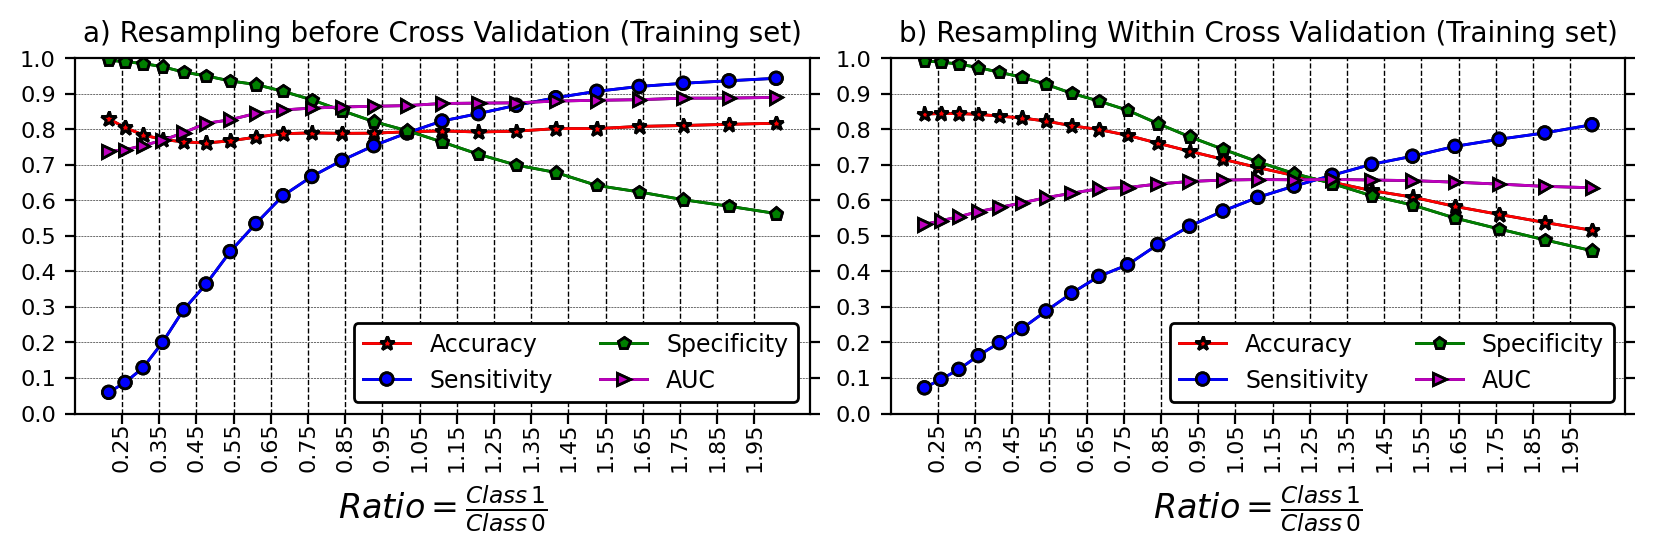

In [73]:
font = {'size'   :8.1 }
plt.rc('font', **font)
fig=plt.figure(figsize=(10, 6), dpi= 200, facecolor='w', edgecolor='k')

j=4
gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(gs[0, :2], ) 
ax1.plot(ratio,Train_Accu_ov_un[:,j],'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(ratio,Train_Rec_ov_un[:,j],'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(ratio,Train_Spe_ov_un[:,j],'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(ratio,Train_AUC_ov_un[:,j],'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
plt.xlabel(r'$Ratio=\frac{Class\,1}{Class\,0}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.5)
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('a) Resampling before Cross Validation (Training set)',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0,1.0))
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0.25,2,0.1), rotation=90, fontsize=8,y=0.03)
ax1.yaxis.set_ticks_position('both')


ax1=plt.subplot(gs[0, 2:]) 
j=4
ax1.plot(ratio,Train_Accu_ov_un_during[:,j],'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(ratio,Train_Rec_ov_un_during[:,j],'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(ratio,Train_Spe_ov_un_during[:,j],'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(ratio,Train_AUC_ov_un_during[:,j],'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')  
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.5) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('b) Resampling Within Cross Validation (Training set)',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0,1.0))
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0.25,2,0.1), rotation=90, fontsize=8,y=0.03)

ax1.yaxis.set_ticks_position('both')
plt.xlabel(r'$Ratio=\frac{Class\,1}{Class\,0}$',fontsize=12)
   
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.55)
plt.savefig('./Figures/Fig11_Performance_overundersampling.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Model after Changing Ratio

In [75]:
%%time
iratio=15

############# Dummy Classifier #############
dmy_clf = DummyClassifier(strategy="stratified",random_state=12)
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,dmy_clf,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_dmy=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_dmy[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      
    
acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_dmy=acr
valid_Pre_ov_un_during_cv_dmy=prec
valid_Rec_ov_un_during_cv_dmy=reca
valid_Spe_ov_un_during_cv_dmy=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_dmy=auc(fpr, tpr) 


############# Stochastic Gradient Descent ############# 
sgd= SGDClassifier(loss='log',early_stopping=True, eta0= 0.05, penalty='none',random_state=42)  
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,sgd,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_sgd=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_sgd[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_sgd=acr
valid_Pre_ov_un_during_cv_sgd=prec
valid_Rec_ov_un_during_cv_sgd=reca
valid_Spe_ov_un_during_cv_sgd=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_sgd=auc(fpr, tpr) 


############# Logistic Regression ############# 
log_reg = LogisticRegression(max_iter=30, penalty='none',C=0.1,random_state=42) 
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,log_reg,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_lr=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_lr[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_lr=acr
valid_Pre_ov_un_during_cv_lr=prec
valid_Rec_ov_un_during_cv_lr=reca
valid_Spe_ov_un_during_cv_lr=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_lr=auc(fpr, tpr)


############# Support Vector Machine ############# 
svm = SVC(kernel='rbf',C=2,probability=True,random_state=42)
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,svm,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_svm=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_svm[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_svm=acr
valid_Pre_ov_un_during_cv_svm=prec
valid_Rec_ov_un_during_cv_svm=reca
valid_Spe_ov_un_during_cv_svm=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_svm=auc(fpr, tpr)

############# Adaptive Boosting ############# 
tree =DecisionTreeClassifier()
ada_tree = AdaBoostClassifier(tree,n_estimators=30, algorithm= 'SAMME', learning_rate= 0.2, random_state=102)  
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,ada_tree,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_ada_tree=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_ada_tree[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_ada=acr
valid_Pre_ov_un_during_cv_ada=prec
valid_Rec_ov_un_during_cv_ada=reca
valid_Spe_ov_un_during_cv_ada=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_ada=auc(fpr, tpr)


############# Random Forest ############# 
rnf = RandomForestClassifier( random_state=42) 
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,rnf,ind=2,r1=ra_1[iratio],r2=ra_2[iratio],
                                         corr=corr,seed=34,cv=5)
model__ratio_rnf=model__

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_rnf[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_rnf=acr
valid_Pre_ov_un_during_cv_rnf=prec
valid_Rec_ov_un_during_cv_rnf=reca
valid_Spe_ov_un_during_cv_rnf=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_rnf=auc(fpr, tpr)


############# Neural Network ############# 
Neural_Net=DNN (init_mode='uniform', activation= 'relu',dropout_rate= False, neurons= 50 ) 
y_train_pred,y_real,model__=Ove_Und_During_Cross(std_x_train,y_train,Neural_Net,ind=2,NN=True,
                                   r1=ra_1[i],r2=ra_2[i],corr=corr,seed=34,cv=5)
model__ratio_NN=model__

# Soft voting   
Soft_voting=[]
pred=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
for ii in range(len(model__)):
    tmp=model__ratio_NN[ii].predict_proba(std_x_valid).tolist()
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]   

acr, prec, reca, spec=Conf_Matrix(y_valid,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
valid_Accu_ov_un_during_cv_NN=acr
valid_Pre_ov_un_during_cv_NN=prec
valid_Rec_ov_un_during_cv_NN=reca
valid_Spe_ov_un_during_cv_NN=spec
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting)
valid_AUC_ov_un_during_cv_NN=auc(fpr, tpr) 

Wall time: 19min 23s


In [76]:
pred_1=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
pred_2=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
pred_3=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
pred_4=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
pred_5=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)
pred_6=np.array([], dtype=np.int64).reshape(len(std_x_valid),0)

for ii in range(len(model__)):
    tmp=model__ratio_sgd[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred_1=np.concatenate((tmp, pred_1), axis=1)
    #
    tmp=model__ratio_lr[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred_2=np.concatenate((tmp, pred_2), axis=1)
    #
    tmp=model__ratio_svm[ii].predict_proba(std_x_valid).tolist()
    pred_3=np.concatenate((tmp, pred_3), axis=1)
    #
    tmp=model__ratio_ada_tree[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred_4=np.concatenate((tmp, pred_4), axis=1)
    #
    tmp=model__ratio_rnf[ii].predict_proba(std_x_valid)[:,1].reshape(-1,1)
    pred_5=np.concatenate((tmp, pred_5), axis=1)    
    #
    tmp=model__ratio_NN[ii].predict_proba(std_x_valid).tolist()
    pred_6=np.concatenate((tmp, pred_6), axis=1)

    
Soft_voting_1=[np.mean(i) for i in pred_1]
Soft_voting_2=[np.mean(i) for i in pred_2]
Soft_voting_3=[np.mean(i) for i in pred_3]
Soft_voting_4=[np.mean(i) for i in pred_4]
Soft_voting_5=[np.mean(i) for i in pred_5]
Soft_voting_6=[np.mean(i) for i in pred_6]

In [77]:
Soft_voting_all=[]
for i in range(len(Soft_voting_2)):
    Soft_voting_all.append((Soft_voting_2[i]+Soft_voting_5[i])/2)

In [78]:
valid_Accu_sft, prec_sft, valid_Rec_sft, valid_Spe_sft=Conf_Matrix(y_valid,np.array(Soft_voting_all).reshape(-1,1),axt=ax1,plot=False)
fpr, tpr, thresold = roc_curve(y_valid, Soft_voting_all)
valid_AUC_sft=auc(fpr, tpr) 

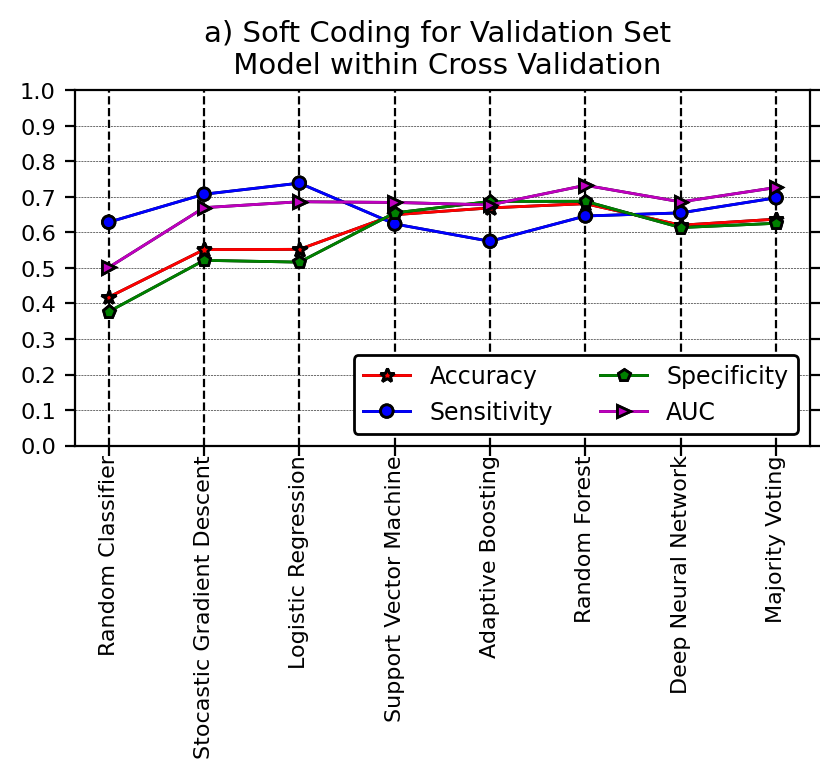

In [79]:
font = {'size'   :8.1 }
plt.rc('font', **font)
fig=plt.figure(figsize=(10, 6), dpi= 200, facecolor='w', edgecolor='k')
predictor= ['Random Classifier','Stocastic Gradient Descent','Logistic Regression',
            'Support Vector Machine','Adaptive Boosting',
            'Random Forest','Deep Neural Network', 'Majority Voting']

gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(gs[0, :2], ) 

Acuracy=(valid_Accu_ov_un_during_cv_dmy,valid_Accu_ov_un_during_cv_sgd,
        valid_Accu_ov_un_during_cv_lr,valid_Accu_ov_un_during_cv_svm,
        valid_Accu_ov_un_during_cv_ada,valid_Accu_ov_un_during_cv_rnf,
        valid_Accu_ov_un_during_cv_NN,valid_Accu_sft)
#
Recall=(valid_Rec_ov_un_during_cv_dmy,valid_Rec_ov_un_during_cv_sgd,
        valid_Rec_ov_un_during_cv_lr,valid_Rec_ov_un_during_cv_svm,
        valid_Rec_ov_un_during_cv_ada,valid_Rec_ov_un_during_cv_rnf,
        valid_Rec_ov_un_during_cv_NN,valid_Rec_sft)
#
Specificity=(valid_Spe_ov_un_during_cv_dmy,valid_Spe_ov_un_during_cv_sgd,
        valid_Spe_ov_un_during_cv_lr,valid_Spe_ov_un_during_cv_svm,
        valid_Spe_ov_un_during_cv_ada,valid_Spe_ov_un_during_cv_rnf,
        valid_Spe_ov_un_during_cv_NN, valid_Spe_sft)
#
AUC_=(valid_AUC_ov_un_during_cv_dmy,valid_AUC_ov_un_during_cv_sgd,
        valid_AUC_ov_un_during_cv_lr,valid_AUC_ov_un_during_cv_svm,
        valid_AUC_ov_un_during_cv_ada,valid_AUC_ov_un_during_cv_rnf,
        valid_AUC_ov_un_during_cv_NN,valid_AUC_sft)
#

ax1.plot(predictor,Acuracy,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Recall,'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Specificity,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(predictor,AUC_,'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
#plt.xlabel(r'$\frac{Class\,1\,(Serious\,Leakage)}{Class\,0\,(Non-Serious\,Leakage)}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('a) Soft Coding for Validation Set \n Model within Cross Validation',fontsize=10.5)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0,1.0))
plt.yticks(np.arange(0,1.1,0.1))
ax1.yaxis.set_ticks_position('both')
ax1.set_xticklabels(predictor,y=0.03, rotation=90, fontsize=8)   

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.55)
#plt.savefig('./Figures/Fig12_Performance_overundersampling_validation.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Test set

In [ ]:
%%time

############# Dummy Classifier #############

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_dmy[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      
    
acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_dmy=acr
test_Pre_ov_un_during_cv_dmy=prec
test_Rec_ov_un_during_cv_dmy=reca
test_Spe_ov_un_during_cv_dmy=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_dmy=auc(fpr, tpr) 


############# Stochastic Gradient Descent ############# 

# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_sgd[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_sgd=acr
test_Pre_ov_un_during_cv_sgd=prec
test_Rec_ov_un_during_cv_sgd=reca
test_Spe_ov_un_during_cv_sgd=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_sgd=auc(fpr, tpr) 


############# Logistic Regression ############# 
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_lr[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_lr=acr
test_Pre_ov_un_during_cv_lr=prec
test_Rec_ov_un_during_cv_lr=reca
test_Spe_ov_un_during_cv_lr=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_lr=auc(fpr, tpr)


############# Support Vector Machine ############# 
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_svm[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_svm=acr
test_Pre_ov_un_during_cv_svm=prec
test_Rec_ov_un_during_cv_svm=reca
test_Spe_ov_un_during_cv_svm=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_svm=auc(fpr, tpr)

############# Adaptive Boosting ############# 
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_ada_tree[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_ada=acr
test_Pre_ov_un_during_cv_ada=prec
test_Rec_ov_un_during_cv_ada=reca
test_Spe_ov_un_during_cv_ada=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_ada=auc(fpr, tpr)


############# Random Forest ############# 
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_rnf[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]      

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_rnf=acr
test_Pre_ov_un_during_cv_rnf=prec
test_Rec_ov_un_during_cv_rnf=reca
test_Spe_ov_un_during_cv_rnf=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_rnf=auc(fpr, tpr)


############# Neural Network ############# 
# Soft voting   
Soft_voting=[]
pred=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
for ii in range(len(model__)):
    tmp=model__ratio_NN[ii].predict_proba(std_x_test).tolist()
    pred=np.concatenate((tmp, pred), axis=1)
Soft_voting=[np.mean(i) for i in pred]   

acr, prec, reca, spec=Conf_Matrix(y_test,np.array(Soft_voting).reshape(-1,1),axt=ax1,plot=False)
test_Accu_ov_un_during_cv_NN=acr
test_Pre_ov_un_during_cv_NN=prec
test_Rec_ov_un_during_cv_NN=reca
test_Spe_ov_un_during_cv_NN=spec
fpr, tpr, thresold = roc_curve(y_test, Soft_voting)
test_AUC_ov_un_during_cv_NN=auc(fpr, tpr) 

## Soft Voting 

In [81]:
pred_1=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
pred_2=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
pred_3=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
pred_4=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
pred_5=np.array([], dtype=np.int64).reshape(len(std_x_test),0)
pred_6=np.array([], dtype=np.int64).reshape(len(std_x_test),0)

for ii in range(len(model__)):
    tmp=model__ratio_sgd[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred_1=np.concatenate((tmp, pred_1), axis=1)
    #
    tmp=model__ratio_lr[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pickle.dump(model__ratio_lr[ii], open(f'./Trained_models/lr_ratio_{ii+1}.sav', 'wb'))
    
    pred_2=np.concatenate((tmp, pred_2), axis=1)
    #
    tmp=model__ratio_svm[ii].predict_proba(std_x_test).tolist()
    pred_3=np.concatenate((tmp, pred_3), axis=1)
    #
    tmp=model__ratio_ada_tree[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pred_4=np.concatenate((tmp, pred_4), axis=1)
    #
    tmp=model__ratio_rnf[ii].predict_proba(std_x_test)[:,1].reshape(-1,1)
    pickle.dump(model__ratio_rnf[ii], open(f'./Trained_models/rf_ratio_{ii+1}.sav', 'wb'))    
    pred_5=np.concatenate((tmp, pred_5), axis=1)    
    #
    tmp=model__ratio_NN[ii].predict_proba(std_x_test).tolist()
    pred_6=np.concatenate((tmp, pred_6), axis=1)
    
Soft_voting_1=[np.mean(i) for i in pred_1]
Soft_voting_2=[np.mean(i) for i in pred_2]
Soft_voting_3=[np.mean(i) for i in pred_3]
Soft_voting_4=[np.mean(i) for i in pred_4]
Soft_voting_5=[np.mean(i) for i in pred_5]
Soft_voting_6=[np.mean(i) for i in pred_6]

In [82]:
Soft_voting_all=[]
for i in range(len(Soft_voting_2)):
    Soft_voting_all.append((Soft_voting_2[i]+
    Soft_voting_5[i])/2)

In [83]:
test_Accu_sft, prec_sft, test_Rec_sft, test_Spe_sft=Conf_Matrix(y_test,np.array(Soft_voting_all).reshape(-1,1),axt=ax1,plot=False)
fpr, tpr, thresold = roc_curve(y_test, Soft_voting_all)
test_AUC_sft=auc(fpr, tpr) 

## Final Plots 

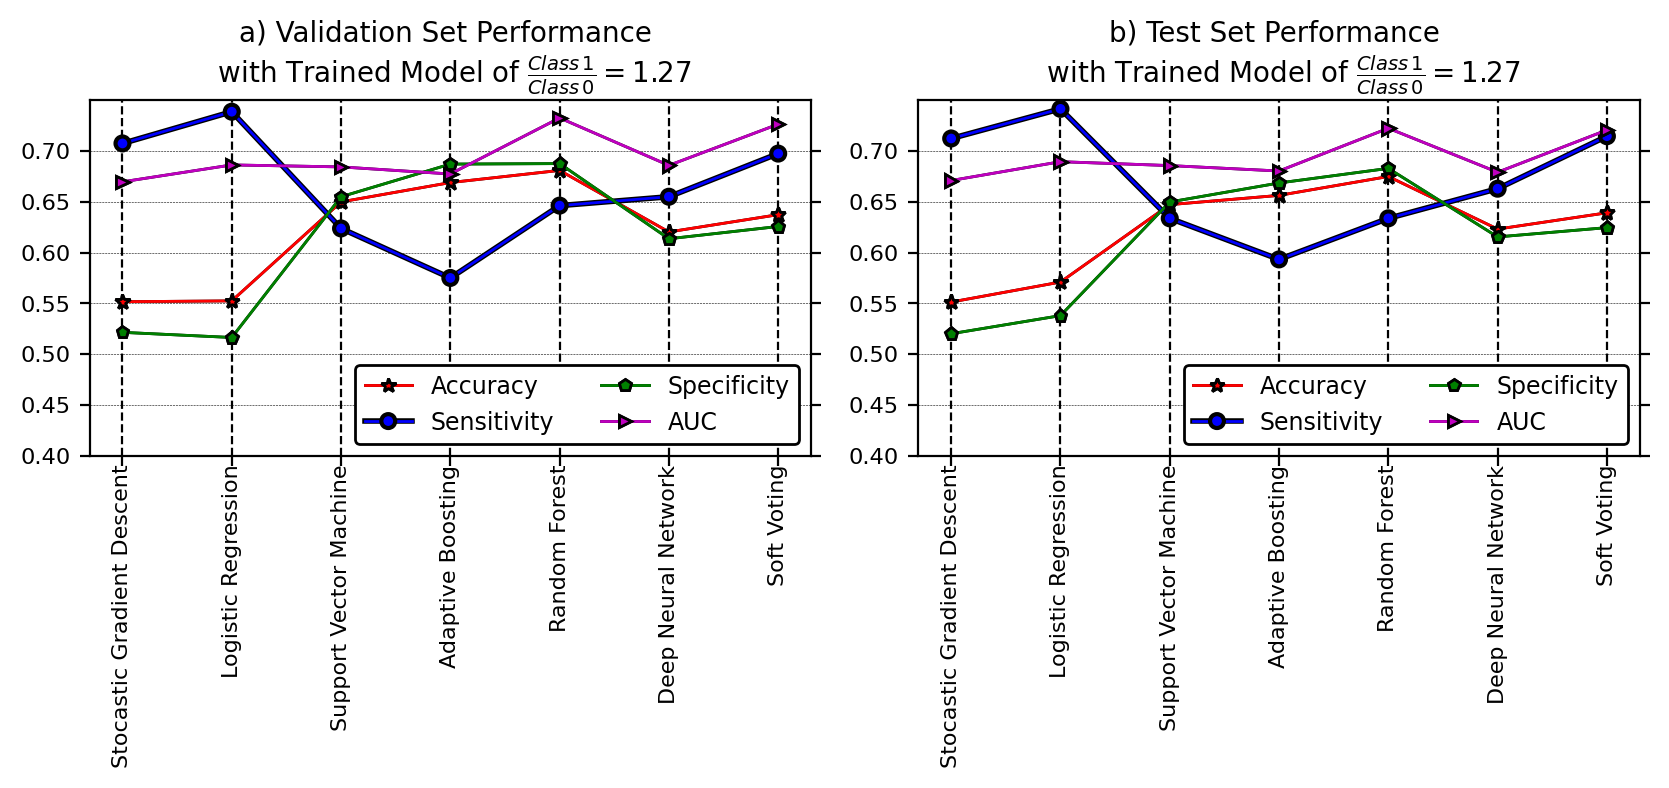

In [84]:
font = {'size'   :8.1 }
plt.rc('font', **font)
fig=plt.figure(figsize=(10, 6), dpi= 200, facecolor='w', edgecolor='k')
predictor= ['Stocastic Gradient Descent','Logistic Regression',
            'Support Vector Machine','Adaptive Boosting',
            'Random Forest','Deep Neural Network', 'Soft Voting']

gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(gs[0, :2], ) 

Acuracy=(valid_Accu_ov_un_during_cv_sgd,
        valid_Accu_ov_un_during_cv_lr,valid_Accu_ov_un_during_cv_svm,
        valid_Accu_ov_un_during_cv_ada,valid_Accu_ov_un_during_cv_rnf,
        valid_Accu_ov_un_during_cv_NN,valid_Accu_sft)
#
Recall=(valid_Rec_ov_un_during_cv_sgd,
        valid_Rec_ov_un_during_cv_lr,valid_Rec_ov_un_during_cv_svm,
        valid_Rec_ov_un_during_cv_ada,valid_Rec_ov_un_during_cv_rnf,
        valid_Rec_ov_un_during_cv_NN,valid_Rec_sft)
#
Specificity=(valid_Spe_ov_un_during_cv_sgd,
        valid_Spe_ov_un_during_cv_lr,valid_Spe_ov_un_during_cv_svm,
        valid_Spe_ov_un_during_cv_ada,valid_Spe_ov_un_during_cv_rnf,
        valid_Spe_ov_un_during_cv_NN, valid_Spe_sft)
#
AUC_=(valid_AUC_ov_un_during_cv_sgd,
        valid_AUC_ov_un_during_cv_lr,valid_AUC_ov_un_during_cv_svm,
        valid_AUC_ov_un_during_cv_ada,valid_AUC_ov_un_during_cv_rnf,
        valid_AUC_ov_un_during_cv_NN,valid_AUC_sft)
#

ax1.plot(predictor,Acuracy,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Recall,'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Specificity,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(predictor,AUC_,'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
#plt.xlabel(r'$\frac{Class\,1\,(Serious\,Leakage)}{Class\,0\,(Non-Serious\,Leakage)}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('a) Validation Set Performance \n with Trained Model of '+ r'$\frac{Class\,1}{Class\,0}=1.27$',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0.4,0.75))
plt.yticks(np.arange(0.4,0.75,0.05))
ax1.yaxis.set_ticks_position('both')
ax1.set_xticklabels(predictor,y=0.03, rotation=90, fontsize=8)   

ax1=plt.subplot(gs[0, 2:])  
Acuracy=(test_Accu_ov_un_during_cv_sgd,
        test_Accu_ov_un_during_cv_lr,test_Accu_ov_un_during_cv_svm,
        test_Accu_ov_un_during_cv_ada,test_Accu_ov_un_during_cv_rnf,
        test_Accu_ov_un_during_cv_NN,test_Accu_sft)
#
Recall=(test_Rec_ov_un_during_cv_sgd,
        test_Rec_ov_un_during_cv_lr,test_Rec_ov_un_during_cv_svm,
        test_Rec_ov_un_during_cv_ada,test_Rec_ov_un_during_cv_rnf,
        test_Rec_ov_un_during_cv_NN,test_Rec_sft)
#
Specificity=(test_Spe_ov_un_during_cv_sgd,
        test_Spe_ov_un_during_cv_lr,test_Spe_ov_un_during_cv_svm,
        test_Spe_ov_un_during_cv_ada,test_Spe_ov_un_during_cv_rnf,
        test_Spe_ov_un_during_cv_NN, test_Spe_sft)
#
AUC_=(test_AUC_ov_un_during_cv_sgd,
        test_AUC_ov_un_during_cv_lr,test_AUC_ov_un_during_cv_svm,
        test_AUC_ov_un_during_cv_ada,test_AUC_ov_un_during_cv_rnf,
        test_AUC_ov_un_during_cv_NN,test_AUC_sft)
#

ax1.plot(predictor,Acuracy,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Recall,'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Specificity,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(predictor,AUC_,'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
#plt.xlabel(r'$\frac{Class\,1\,(Serious\,Leakage)}{Class\,0\,(Non-Serious\,Leakage)}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('b) Test Set Performance \n with Trained Model of '+ r'$\frac{Class\,1}{Class\,0}=1.27$',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0.4,0.75))
plt.yticks(np.arange(0.4,0.75,0.05))
ax1.yaxis.set_ticks_position('both')
ax1.set_xticklabels(predictor,y=0.03, rotation=90, fontsize=8)   

plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(hspace=0.55)
plt.savefig('./Figures/Fig13_Performance_overundersampling_validation_Test.pdf', dpi=500, bbox_inches='tight')
plt.show()

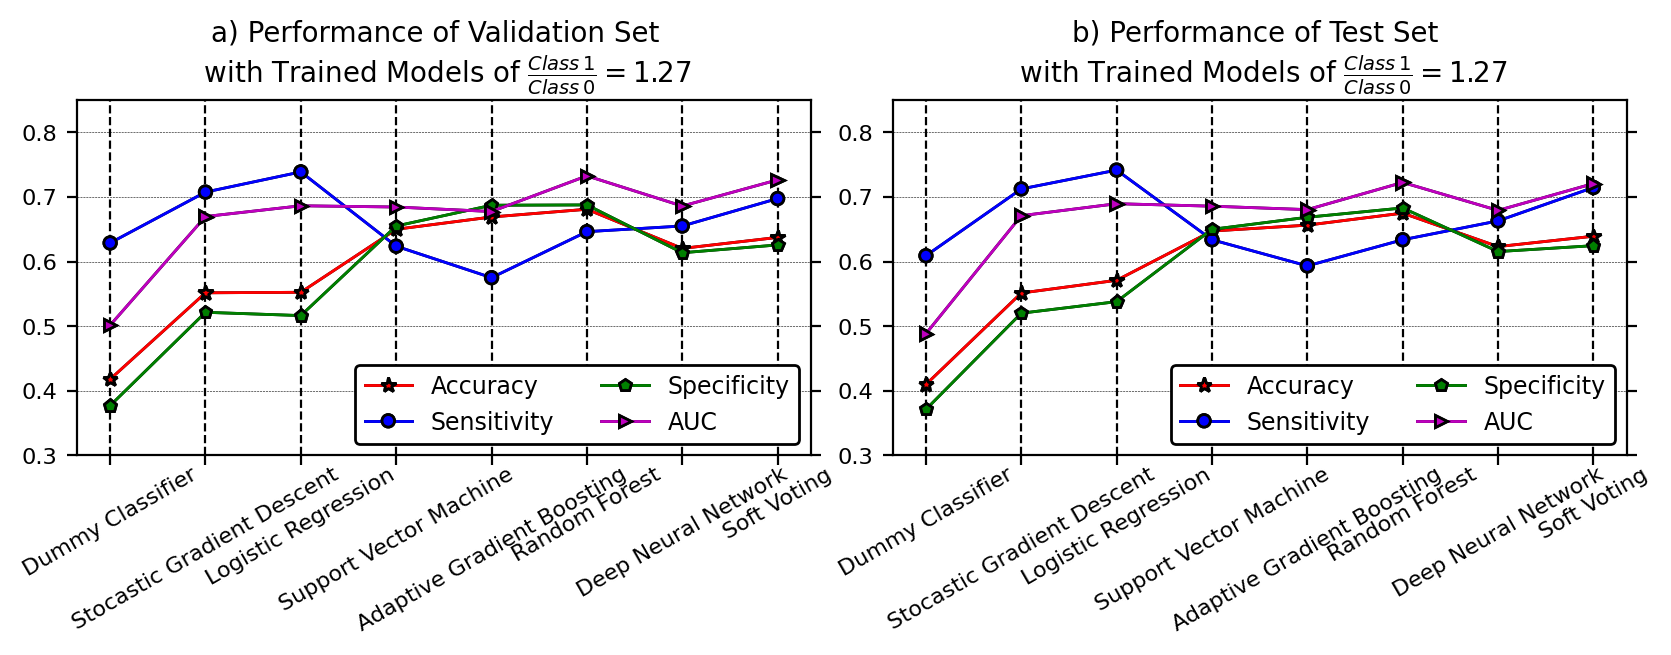

In [85]:
font = {'size'   :8.1 }
plt.rc('font', **font)
fig=plt.figure(figsize=(10, 6), dpi= 200, facecolor='w', edgecolor='k')
predictor= ['Dummy Classifier','Stocastic Gradient Descent','Logistic Regression',
            'Support Vector Machine','Adaptive Gradient Boosting',
            'Random Forest','Deep Neural Network', 'Soft Voting']

gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(gs[0, :2], ) 

Acuracy=(valid_Accu_ov_un_during_cv_dmy,valid_Accu_ov_un_during_cv_sgd,
        valid_Accu_ov_un_during_cv_lr,valid_Accu_ov_un_during_cv_svm,
        valid_Accu_ov_un_during_cv_ada,valid_Accu_ov_un_during_cv_rnf,
        valid_Accu_ov_un_during_cv_NN,valid_Accu_sft)
#
Recall=(valid_Rec_ov_un_during_cv_dmy,valid_Rec_ov_un_during_cv_sgd,
        valid_Rec_ov_un_during_cv_lr,valid_Rec_ov_un_during_cv_svm,
        valid_Rec_ov_un_during_cv_ada,valid_Rec_ov_un_during_cv_rnf,
        valid_Rec_ov_un_during_cv_NN,valid_Rec_sft)
#
Specificity=(valid_Spe_ov_un_during_cv_dmy,valid_Spe_ov_un_during_cv_sgd,
        valid_Spe_ov_un_during_cv_lr,valid_Spe_ov_un_during_cv_svm,
        valid_Spe_ov_un_during_cv_ada,valid_Spe_ov_un_during_cv_rnf,
        valid_Spe_ov_un_during_cv_NN, valid_Spe_sft)
#
AUC_=(valid_AUC_ov_un_during_cv_dmy,valid_AUC_ov_un_during_cv_sgd,
        valid_AUC_ov_un_during_cv_lr,valid_AUC_ov_un_during_cv_svm,
        valid_AUC_ov_un_during_cv_ada,valid_AUC_ov_un_during_cv_rnf,
        valid_AUC_ov_un_during_cv_NN,valid_AUC_sft)
#

ax1.plot(predictor,Acuracy,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Recall,'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Specificity,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(predictor,AUC_,'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
#plt.xlabel(r'$\frac{Class\,1\,(Serious\,Leakage)}{Class\,0\,(Non-Serious\,Leakage)}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('a) Performance of Validation Set  \n with Trained Models of '+ r'$\frac{Class\,1}{Class\,0}=1.27$',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0.3,0.85))
plt.yticks(np.arange(0.3,0.85,0.1))
ax1.yaxis.set_ticks_position('both')
ax1.set_xticklabels(predictor,y=0.03, rotation=30, fontsize=8)   

ax1=plt.subplot(gs[0, 2:])  
Acuracy=(test_Accu_ov_un_during_cv_dmy,test_Accu_ov_un_during_cv_sgd,
        test_Accu_ov_un_during_cv_lr,test_Accu_ov_un_during_cv_svm,
        test_Accu_ov_un_during_cv_ada,test_Accu_ov_un_during_cv_rnf,
        test_Accu_ov_un_during_cv_NN,test_Accu_sft)
#
Recall=(test_Rec_ov_un_during_cv_dmy,test_Rec_ov_un_during_cv_sgd,
        test_Rec_ov_un_during_cv_lr,test_Rec_ov_un_during_cv_svm,
        test_Rec_ov_un_during_cv_ada,test_Rec_ov_un_during_cv_rnf,
        test_Rec_ov_un_during_cv_NN,test_Rec_sft)
#
Specificity=(test_Spe_ov_un_during_cv_dmy,test_Spe_ov_un_during_cv_sgd,
        test_Spe_ov_un_during_cv_lr,test_Spe_ov_un_during_cv_svm,
        test_Spe_ov_un_during_cv_ada,test_Spe_ov_un_during_cv_rnf,
        test_Spe_ov_un_during_cv_NN, test_Spe_sft)
#
AUC_=(test_AUC_ov_un_during_cv_dmy,test_AUC_ov_un_during_cv_sgd,
        test_AUC_ov_un_during_cv_lr,test_AUC_ov_un_during_cv_svm,
        test_AUC_ov_un_during_cv_ada,test_AUC_ov_un_during_cv_rnf,
        test_AUC_ov_un_during_cv_NN,test_AUC_sft)
#

ax1.plot(predictor,Acuracy,'r*-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=5.5,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Recall,'bo-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                             markersize=4.5,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Specificity,'gp-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='Specificity',markeredgecolor='k')   
ax1.plot(predictor,AUC_,'m>-',linewidth=1,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],
                                                           markersize=4.5,label='AUC',markeredgecolor='k')   
#plt.xlabel(r'$\frac{Class\,1\,(Serious\,Leakage)}{Class\,0\,(Non-Serious\,Leakage)}$',fontsize=12)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2)
plt.title('b) Performance of Test Set \n with Trained Models of '+ r'$\frac{Class\,1}{Class\,0}=1.27$',fontsize=10)
legend=plt.legend(ncol=2,loc=4,fontsize=8.5,framealpha =1) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0.3,0.85))
plt.yticks(np.arange(0.3,0.85,0.1))
ax1.yaxis.set_ticks_position('both')
ax1.set_xticklabels(predictor,y=0.03, rotation=30, fontsize=8)   

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.55)
plt.savefig('./Figures/Fig14_Performance_overundersampling_validation_Test.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Prediction of Serious Leakage for 1000 Random Wells without Field Test


In [34]:
def loc_plot(x_1, y_1,title,s1,c='g',axt=None,ylabel=True, marker='o',cbar=False,vmin=False,
             vmax=False,alpha=0.6,ylime=(-30, 1270),save=False,title_fontsize=11,linewidths=0.3,legend=False,
             label=False,bbox_to_anchor=(0.25, 0.12),shrink=0.5):
    """ Function to plot location map and pie chart of """

    ax1 = axt or plt.axes()    
    Name=["" for x in range(6)]
    Name[0:6]='Calgary','Fort McMurray','Edmonton','Rainbow',\
     'Grande Prairie','Lloydminster'
    
    ax1.spines['left'].set_visible(True)
    ax1.spines['bottom'].set_visible(True)  
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)  
    with open('./Data/Location names.txt') as f:
        xn = []
        yn = [] 
        for line in f:
            p = line.split()
            tmp=utm.from_latlon(float(p[2]), float(p[1]),force_zone_number=12)
            xn.append((float(tmp[0])-(-80563.0))/1000)
            yn.append((float(tmp[1]-5428042.5))/1000)
    #plt.plot(xn,yn,'*k',markersize=6.5,linewidth=1)        
    for i in range(5):
        plt.text(xn[i], (yn[i]-18), Name[i],fontsize=7,color='y', fontweight='bold',style='oblique', ha='center',
         va='top', wrap=True,bbox=dict(facecolor='k', alpha=1,pad=0))      
        
    # Clip to Alberta province
    with open('./Data/Alberta.dat') as f:
        path = []
        Name = []   
        for line in f:
            p = line.split()
            Name.append(p[0])
            tmp=utm.from_latlon(float(p[1]), float(p[0]),force_zone_number=12)
            aa=[tmp[0]/1000-(-80563.0/1000),tmp[1]/1000-(5428042.5/1000)]
            path.append(aa)
    path1 = np.asarray(path)
    path = Path(path1)
    patch = PathPatch(path, facecolor='none',linewidth=0.8)
    plt.gca().add_patch(patch)
    if label:
        sc=ax1.scatter(x_1, y_1,s=s1,c=c, marker=marker,vmin=vmin, vmax=vmax,edgecolors='k',
                   cmap='jet',linewidths=linewidths,alpha=alpha,label=label)
    else:
        sc=ax1.scatter(x_1, y_1,s=s1,c=c, marker=marker,vmin=vmin, vmax=vmax,edgecolors='k',
                   cmap='jet',linewidths=linewidths,alpha=alpha)        
    if(cbar):
        fig.colorbar(sc,shrink=shrink,label='Probability of Serious Leakage',orientation='horizontal')        
    if(legend):
        plt.legend(loc=9,bbox_to_anchor=(0.25, 0.12), ncol=1,fontsize=8.5,markerscale=1.2)
    plt.title(title,fontsize=title_fontsize)    
    plt.xlabel('Easting (km)',fontsize='9.5')
    if(ylabel): plt.ylabel('Northing (km)',fontsize='9.5')
    plt.gca().set_aspect('0.9')
    plt.xlim((-30, 660))   # set the xlim to left, right
    plt.ylim(ylime)     # set the xlim to left, right
    if(save): fig.savefig(save, dpi=500, bbox_inches='tight')
     

In [35]:
# Reading Data+
df_xy_test = pd.read_csv("./Data/Wells_Test.csv",na_values=['NA','?',' '])
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting

#Shuffle data to avoid any artifact
np.random.seed(52)
df_xy_test=df_xy_test.reindex(np.random.permutation(df_xy_test.index))
df_xy_test.reset_index(inplace=True, drop=True)

# Raname some columns name to make more sense.
df_xy_test=df_xy_test.rename(columns={"MD (All Wells) (m)":"Measured Depth (m)", "Surf-Hole Easting (NAD83)": "X Coordinate",
"Surf-Hole Easting (NAD83)": "X Coordinate","Surf-Hole Northing (NAD83)": "Y Coordinate",
"Rm": "Rheology Modifier (RM)","BH Temp. (degC)": "Borehole Temperature (degC)",
'Cumulative WTR Prod. (m3)':'Cumulative WATER Prod. (m3)',
 'Prod./Inject. Frmtn': 'Prod./Inject. Formation', 'Well Status Abrv': 'Well Status',
'No_well':'Well Density (n/10km X 10km)', 'Surface Abandonment Date': 'Surface Abandonment Month',                          
'Total Production Hrs':'Total Production Hours', 'Class': 'AER Classification'})
#
df_xy_test=df_xy_test[['Deviated Hole (T/F)','Horizontal Hole (T/F)','Surface-Casing Depth (m)','Surface-Casing Size (mm)'
,'Surface-Casing Weight (kg/m)','Production-Casing Depth (m)','Production-Casing Size (mm)'
,'Production-Casing Weight (kg/m)','Production-Casing Grade','Surface-Casing Grade'
,'Measured Depth (m)','Borehole Temperature (degC)','Prod./Inject. Formation','Well Status',
'Month Well Spudded','Well Density (n/10km X 10km)','Surface Abandonment Type','Surface Abandonment Month',
'Cumulative GAS Prod. (e3m3)','Cumulative OIL Prod. (m3)','Cumulative WATER Prod. (m3)',
'Total Production Month','X Coordinate','Y Coordinate']]

# one with x and y, and another without x and y
df_test=df_xy_test.copy()
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting
df_test['Surface Abandonment Month'].fillna(0,inplace=True)
df_test.drop(drop_colmn, axis=1, inplace=True)
df_test

Deviated Hole (T/F) Horizontal Hole (T/F)  Surface-Casing Depth (m)  \
0                       F                     F                      97.6   
1                       F                     F                     225.0   
2                       F                     F                       NaN   
3                       F                     T                       NaN   
4                       F                     F                     145.0   
...                   ...                   ...                       ...   
19995                   F                     F                     163.0   
19996                   F                     F                     181.0   
19997                   F                     F                     361.0   
19998                   F                     F                     140.8   
19999                   F                     F                     193.2   

       Surface-Casing Size (mm)  Surface-Casing Weight (kg/m)  \
0                         177.8                          25.3   
1                         219.1                          41.6   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                         177.8                          25.3   
...                         ...                           ...   
19995                     177.8                          29.8   
19996                     177.8                          29.8   
19997                     244.5                          53.6   
19998                     244.5                           NaN   
19999                     219.1                           NaN   

       Production-Casing Depth (m)  Production-Casing Size (mm)  \
0                            455.0                        114.3   
1                            526.3                        114.3   
2                              NaN                          NaN   
3                              NaN                          NaN   
4                            776.0                        114.3   
...                            ...                          ...   
19995                       1111.0                        114.3   
19996                       1493.0                        114.3   
19997                          NaN                          NaN   
19998                          NaN                          NaN   
19999                       1280.2                        114.3   

       Production-Casing Weight (kg/m) Production-Casing Grade  \
0                                 14.1                    J055   
1                                 17.3                    P110   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                 14.1                    J055   
...                                ...                     ...   
19995                             14.1                    J055   
19996                             14.1                    J055   
19997                              NaN                     NaN   
19998                              NaN                     NaN   
19999                              NaN                     NaN   

      Surface-Casing Grade  Measured Depth (m)  Borehole Temperature (degC)  \
0                     H040               455.0                          NaN   
1                     J055               526.3                          NaN   
2                      NaN               107.7                          NaN   
3                      NaN              2731.0                          NaN   
4                     H040               776.0                          NaN   
...                    ...                 ...                          ...   
19995                 J055              1111.0                          NaN   
19996                 J055              1493.0                        

In [36]:
#vali_set_strat['Well Status']=vali_set_strat['Well Status'].map(dic_TE_1)
#
df_test['Prod./Inject. Formation'].fillna('NA',inplace=True)
df_test['Prod./Inject. Formation']=df_test['Prod./Inject. Formation'].map(dic_TE_2)
#
df_test['Production-Casing Grade']=df_test['Production-Casing Grade'].map(dic_TE_3)
#
df_test['Surface-Casing Grade']=df_test['Surface-Casing Grade'].map(dic_TE_4)
#
df_test['Surface Abandonment Type'].fillna('NA',inplace=True)
df_test['Surface Abandonment Type']=df_test['Surface Abandonment Type'].map(dic_TE_5)
#
df_test['Deviated Hole (T/F)'].fillna('NA',inplace=True)
df_test['Deviated Hole (T/F)']=df_test['Deviated Hole (T/F)'].map(dic_TE_6)
#
df_test['Horizontal Hole (T/F)'].fillna('NA',inplace=True)
df_test['Horizontal Hole (T/F)']=df_test['Horizontal Hole (T/F)'].map(dic_TE_7)
#
df_test['Well Status'].fillna('NA',inplace=True)
df_test['Well Status']= df_test['Well Status'].map(dic_TE_8)
#
df_test['Surface Abandonment Month'].fillna(0,inplace=True)

In [37]:
xy_test=df_xy_test[['X Coordinate','Y Coordinate']]

In [38]:
nsim=1
df_test_im=nsim*[None]
for isim in range(nsim):
    df_test_im[isim]=cond_LU_Sim(df_test,ref_df=df_xy.drop(['X Coordinate',
                                'Y Coordinate','AER Classification'],axis=1),seed=isim+89)

In [39]:
# Load models
model__ratio_lr_load=[]
model__ratio_rf_load=[]
for ii in range(5):
    fname=f'./Trained_models/lr_ratio_{ii+1}.sav'
    model__ratio_lr_load.append(pickle.load(open(fname, 'rb')))
    fname=f'./Trained_models/rf_ratio_{ii+1}.sav'
    model__ratio_rf_load.append(pickle.load(open(fname, 'rb')))

In [40]:
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(df_test),0)
columns=[]
for ii in range(5):
    for jj in range(nsim):
        model__ratio_lr_load[ii].random_state=34+ii+jj
        tmp_model=model__ratio_lr_load[ii]
        tmp=tmp_model.predict_proba(df_test_im[jj])[:,1].reshape(-1,1)
        pred=np.concatenate((pred,tmp), axis=1)
        columns.append('lr')
        #
        model__ratio_rf_load[ii].random_state=44+ii+jj
        tmp_model=model__ratio_rf_load[ii]
        tmp=tmp_model.predict_proba(df_test_im[jj])[:,1].reshape(-1,1)
        pred=np.concatenate((pred,tmp), axis=1)    
        columns.append('rf')

In [41]:
sim_result=pd.DataFrame(pred,columns=columns)
#sim_result

In [42]:
Mean=sim_result.apply(lambda x: x.mean(), axis=1)
df_xy_test['Classification']=Mean

In [43]:
prob_gt_83=list(df_xy_test[df_xy_test['Classification']>0.83].index)
prob_80_83=list(df_xy_test[(df_xy_test['Classification']>=0.8) & (df_xy_test['Classification']<0.83)].index)
prob_70_80=list(df_xy_test[(df_xy_test['Classification']>=0.7) & (df_xy_test['Classification']<0.80)].index)
prob_60_70=list(df_xy_test[(df_xy_test['Classification']>=0.6) & (df_xy_test['Classification']<0.7)].index)
prob_40_60=list(df_xy_test[(df_xy_test['Classification']>=0.4) & (df_xy_test['Classification']<0.6)].index)
prob_30_40=list(df_xy_test[(df_xy_test['Classification']>=0.3) & (df_xy_test['Classification']<0.4)].index)
prob_lt_27=list(df_xy_test[df_xy_test['Classification']<0.27].index)

In [44]:
all_index=prob_gt_83[:50]+prob_80_83[:173]+prob_70_80[:80]+prob_60_70[:80]+\
prob_40_60[:295]+prob_30_40[:310]+prob_lt_27

## Final Result 

In [46]:
df_test=df_test.iloc[all_index]
df_test.reset_index(inplace=True, drop=True)
#
df_xy_test=df_xy_test.iloc[all_index]
df_xy_test.reset_index(inplace=True, drop=True)

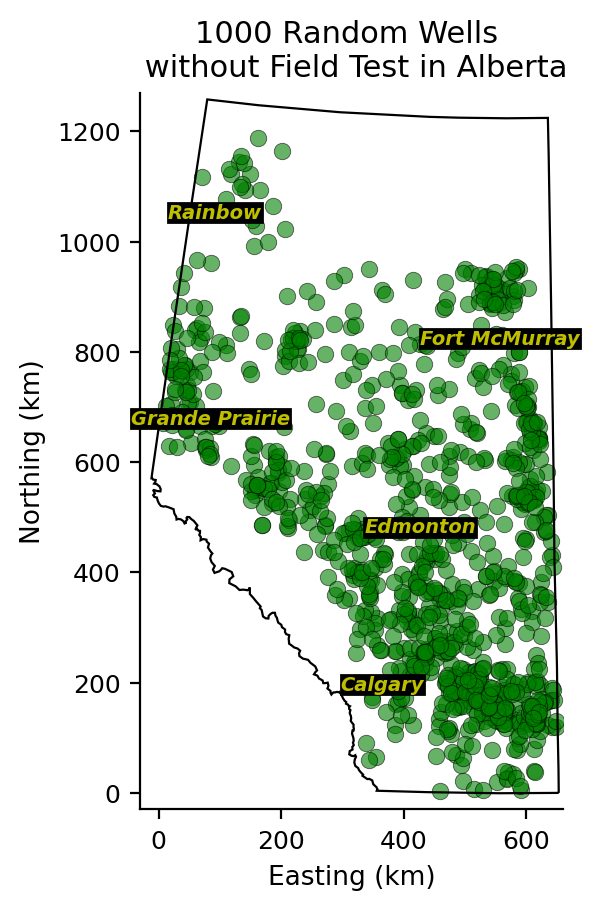

In [47]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(6,5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(1,2,1)
Mean=sim_result.apply(lambda x: x.mean(), axis=1)
loc_plot(df_xy_test["X Coordinate"]/1000, df_xy_test["Y Coordinate"]/1000,
         '1000 Random Wells \n without Field Test in Alberta',cbar=False,vmin=0, vmax=1,
         s1=35,c='g',axt=ax1,ylabel=True,alpha=0.6,save='./Figures/Fig15.png')

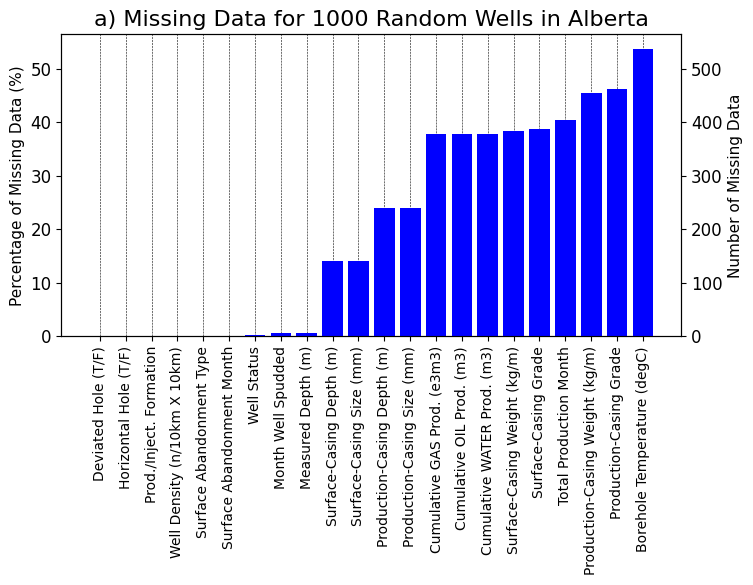

In [48]:
#Calculate number of missing data and percentage for each feature
per_non_nan=[]
non_nan_=[]
Colms=df_test.columns
for i in range(len(Colms)):
    non_nan=df_test[Colms[i]].count()
    non_nan_.append(len(df_test)-non_nan)
    per_non_nan.append(float(100-(non_nan/len(df_test))*100))
    
#Sort percentage of missing data and columns   
sort_array=np.sort(per_non_nan)
sort_colms=[]
uniqu=list(np.unique(per_non_nan))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(per_non_nan) if x == uniqu[i]]
    for k in ind:
        sort_colms.append(Colms[k])
        
#Sort number of missing data and columns        
sort_non_nan_=np.sort(non_nan_)
sort_non_nan__=[]
uniqu=list(np.unique(non_nan_))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(non_nan_) if x == uniqu[i]]
    for k in ind:
        sort_non_nan__.append(Colms[k])

#Plot barchart with two vertical axis        
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis
index1 = np.arange(len(sort_colms))
index2 = np.arange(len(sort_non_nan__))
ax1.bar(index1, sort_array,color='b')
ax2.bar(index2, sort_non_nan_,color='b')
plt.title(f'a) Missing Data for {len(df_xy_test)} Random Wells in Alberta',fontsize=16)
ax1.set_ylabel('Percentage of Missing Data (%)',fontsize=11)
ax2.set_ylabel('Number of Missing Data',fontsize=11)
ax1.set_xticks(np.arange(len(Colms)))
ax1.set_xticklabels(sort_colms,fontsize=10, rotation=90)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.4) # horizontal lines
fig.savefig('./Figures/Fig16.png', dpi=500, bbox_inches='tight')

plt.show()

In [49]:
nsim=100
df_test_im=nsim*[None]
for isim in range(nsim):
    df_test_im[isim]=cond_LU_Sim(df_test,ref_df=df_xy.drop(['X Coordinate',
                                'Y Coordinate','AER Classification'],axis=1),seed=isim+89)

In [50]:
# Load models
model__ratio_lr_load=[]
model__ratio_rf_load=[]
for ii in range(5):
    fname=f'./Trained_models/lr_ratio_{ii+1}.sav'
    model__ratio_lr_load.append(pickle.load(open(fname, 'rb')))
    fname=f'./Trained_models/rf_ratio_{ii+1}.sav'
    model__ratio_rf_load.append(pickle.load(open(fname, 'rb')))

In [91]:
# Soft voting   
pred=np.array([], dtype=np.int64).reshape(len(df_test_im[0]),0)
pred_real=np.array([], dtype=np.int64).reshape(len(df_test_im[0]),0)
columns=[]
columns_real=[]
for jj in range(nsim):
    pred_real_tmp=np.array([], dtype=np.int64).reshape(len(df_test_im[0]),0)
    for ii in range(5):
        model__ratio_lr_load[ii].random_state=34+ii+jj
        tmp_model=model__ratio_lr_load[ii]
        tmp1=tmp_model.predict_proba(df_test_im[jj])[:,1].reshape(-1,1)
        pred=np.concatenate((pred,tmp1), axis=1)
        pred_real_tmp=np.concatenate((pred_real_tmp,tmp1), axis=1)   
        columns.append('lr')
        #
        model__ratio_rf_load[ii].random_state=44+ii+jj
        tmp_model=model__ratio_rf_load[ii]
        tmp2=tmp_model.predict_proba(df_test_im[jj])[:,1].reshape(-1,1)
        pred=np.concatenate((pred,tmp2), axis=1)    
        columns.append('rf')
        #tmp_real=np.sum(tmp1,tmp1)/2
        pred_real_tmp=np.concatenate((pred_real_tmp,tmp2), axis=1) 
    columns_real.append('Realization_'+str(jj+1))    
    mean_real=np.array(pd.DataFrame(pred_real_tmp).apply(lambda x: x.mean(), axis=1)).reshape(-1,1)        
    pred_real=np.concatenate((pred_real,mean_real), axis=1)    

In [92]:
sim_result_real=pd.DataFrame(pred_real,columns=columns_real)

In [69]:
sim_result=pd.DataFrame(pred,columns=columns)
#sim_result

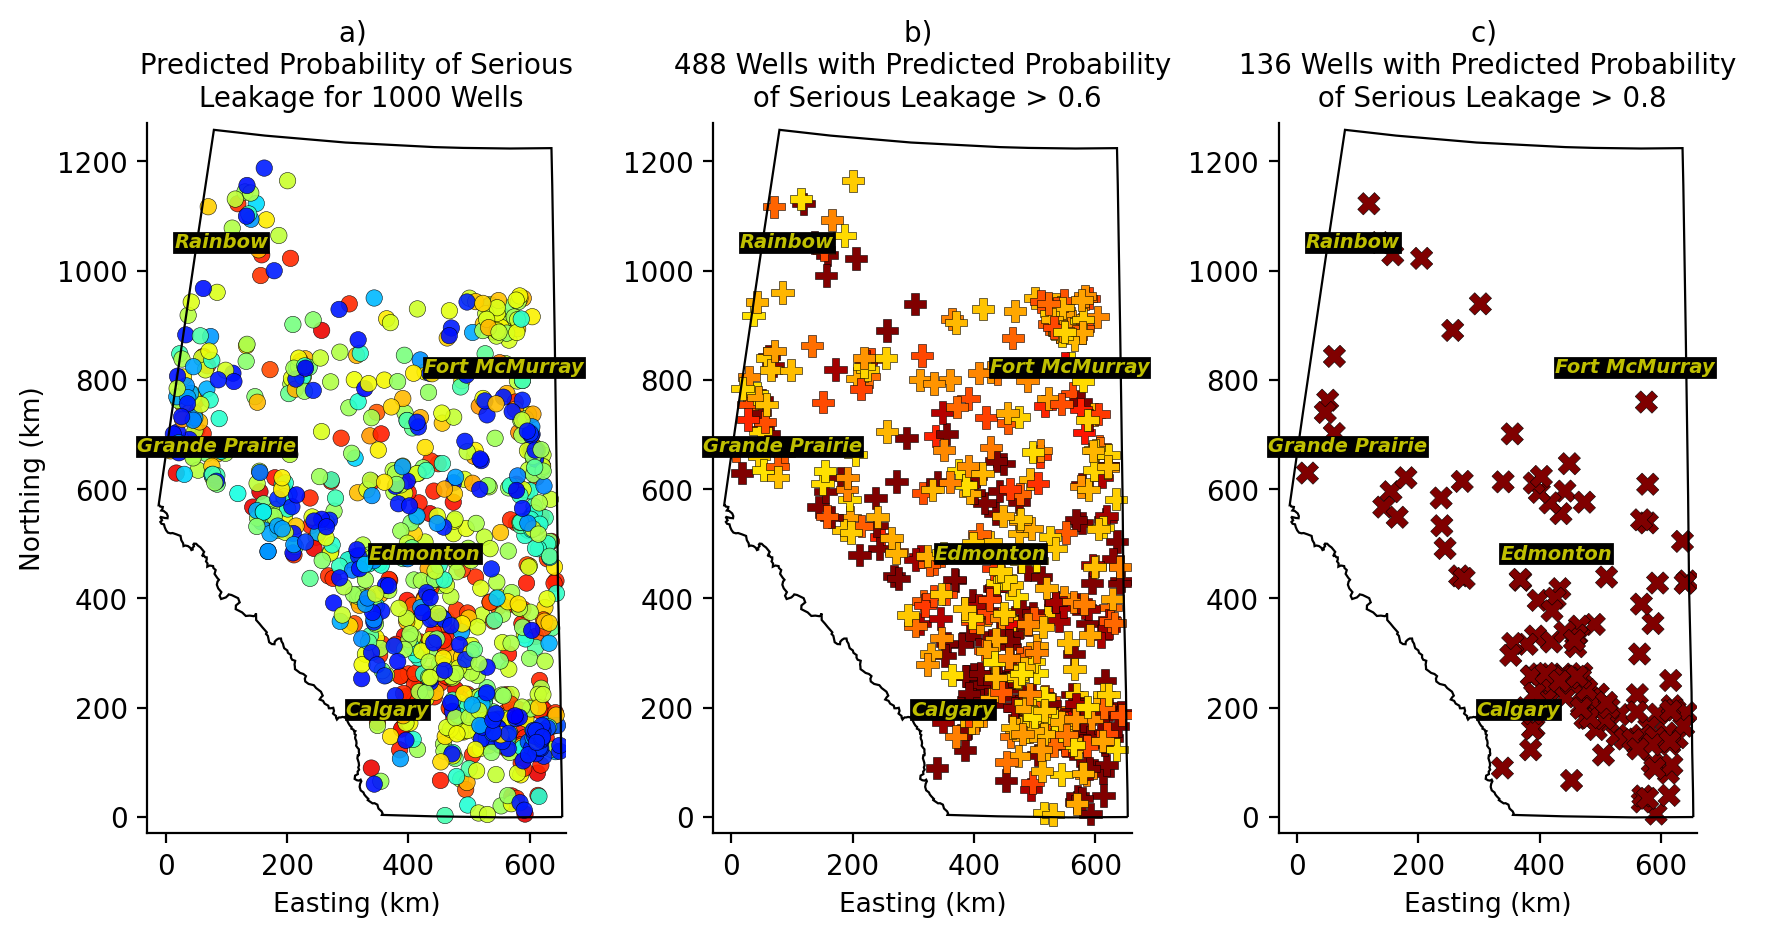

In [60]:
Mean=sim_result.apply(lambda x: x.mean(), axis=1)
df_xy_test['Classification']=Mean

font = {'size'   : 10}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10,10), dpi= 200, facecolor='w', edgecolor='k')

#gs = gridspec.GridSpec(1, 2, width_ratios=[1.25, 1], wspace=0.4)
#ax1=plt.subplot(gs[0]) 
ax1=plt.subplot(1,3,1) 
loc_plot(df_xy_test["X Coordinate"]/1000, df_xy_test["Y Coordinate"]/1000,
         'a) \n Predicted Probability of Serious \n Leakage for 1000 Wells',cbar=False,vmin=0.2, vmax=0.9,
         s1=35,c=Mean,marker="o",axt=ax1,ylabel=True,alpha=0.9,save=False,
         title_fontsize=10,linewidths=0.2,bbox_to_anchor=(2000, -0.1))

ax1=plt.subplot(1,3,2)  
prop=0.6
loc_plot(df_xy_test[df_xy_test['Classification']>prop]["X Coordinate"]/1000, 
         df_xy_test[df_xy_test['Classification']>prop]["Y Coordinate"]/1000,
         f'b) \n {len(Mean[Mean>prop])} Wells with Predicted Probability \n of Serious Leakage > {prop}',cbar=False,vmin=0.2, vmax=0.8,
         s1=65,c=Mean[Mean>prop],marker="P",axt=ax1,ylabel=False,alpha=1,save=False,title_fontsize=10,linewidths=0.2,
         label=f'Wells with Leakage\n Probability>{prop}',legend=False)

ax1=plt.subplot(1,3,3)  
prop=0.8
loc_plot(df_xy_test[df_xy_test['Classification']>prop]["X Coordinate"]/1000, 
         df_xy_test[df_xy_test['Classification']>prop]["Y Coordinate"]/1000,
         f'c) \n {len(Mean[Mean>prop])} Wells with Predicted Probability \n of Serious Leakage > {prop}',cbar=False,vmin=0.2, vmax=0.8,
         s1=65,c=Mean[Mean>prop],marker="X",axt=ax1,ylabel=False,alpha=1,save=False,title_fontsize=10,linewidths=0.2,
         label=f'Wells with Leakage\n Probability>{prop}',legend=False)


plt.subplots_adjust(hspace=0.25)
plt.subplots_adjust(wspace=0.35)
fig.savefig('./Figures/Fig17.png', dpi=500, bbox_inches='tight')
plt.show()

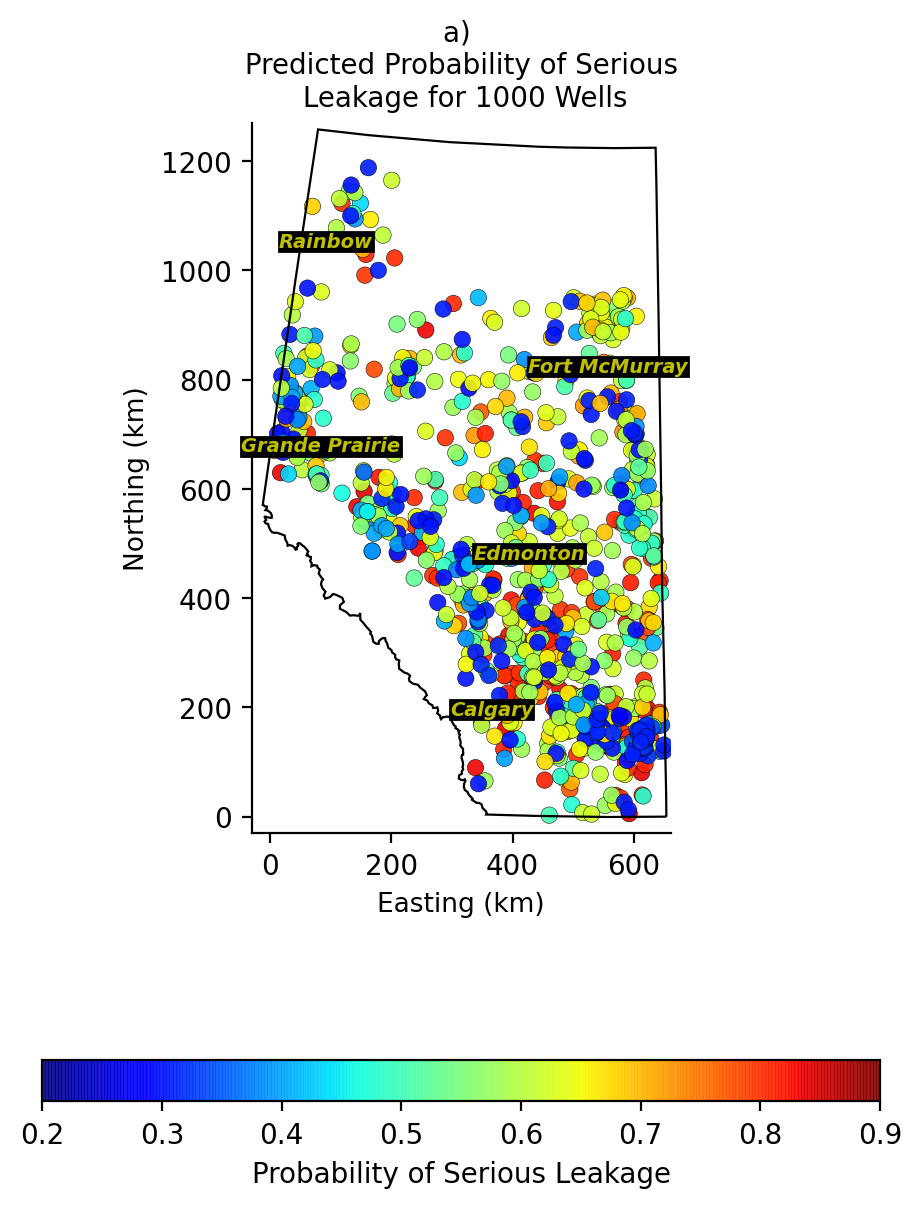

In [326]:
Mean=sim_result.apply(lambda x: x.mean(), axis=1)
df_xy_test['Classification']=Mean

font = {'size'   : 10}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10,10), dpi= 200, facecolor='w', edgecolor='k')

#gs = gridspec.GridSpec(1, 2, width_ratios=[1.25, 1], wspace=0.4)
#ax1=plt.subplot(gs[0]) 
ax1=plt.subplot(1,3,1) 
loc_plot(df_xy_test["X Coordinate"]/1000, df_xy_test["Y Coordinate"]/1000,
         'a) \n Predicted Probability of Serious \n Leakage for 1000 Wells',cbar=True,vmin=0.2, vmax=0.9,
         s1=35,c=Mean,marker="o",axt=ax1,ylabel=True,alpha=0.9,save=False,
         title_fontsize=10,linewidths=0.2,bbox_to_anchor=(2000, -0.1),shrink=2)

plt.subplots_adjust(hspace=0.25)
plt.subplots_adjust(wspace=0.35)
fig.savefig('./Figures/Fig18.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [119]:
def histplt (val,bins,title,xlabl,ylabl,xlimt,ylimt=False, loc=1,legend=1,axt=None,days=True,
             class_=False,scale=1,int_=0,nsplit=1, font=5,color='b',alpha=0.8):
    """ Make histogram of data"""
    
    ax1 = axt or plt.axes()
    font = {'size'   : font }
    plt.rc('font', **font) 
    
    val=val[~np.isnan(val)]
    val=np.array(val)
    plt.hist(val, bins=bins, weights=np.ones(len(val)) / len(val),ec='black',color=color,alpha=alpha)
    n=len(val[~np.isnan(val)])
    Mean=np.nanmean(val)
    Median=np.nanmedian(val)
    SD=np.sqrt(np.nanvar(val))
    Max=np.nanmax(val)
    Min=np.nanmin(val)

    if (int_==0):
        txt='n=%.0f\nMean=%0.2f\nMedian=%0.1f\nσ=%0.1f\nMax=%0.1f\nMin=%0.1f'
    else:
        txt='n=%.0f\nMean=%0.2f\nMedian=%0.1f\nMax=%0.0f\nMin=%0.0f'        
    anchored_text = AnchoredText(txt %(n,Mean,Median,SD,Max,Min), borderpad=0, loc=loc,prop={ 'size': font['size']*scale})    
    if(legend==1): ax1.add_artist(anchored_text)
    if (scale): plt.title(title,fontsize=font['size']*(scale+0.25))
    else:       plt.title(title)
    plt.xlabel(xlabl,fontsize=font['size']) 
    ax1.set_ylabel('Frequency',fontsize=font['size'])
    if (scale): ax1.set_xlabel(xlabl,fontsize=font['size']*scale)
    else:       ax1.set_xlabel(xlabl)

    try:
        xlabl
    except NameError:
        pass    
    else:
        if (scale): plt.xlabel(xlabl,fontsize=font['size']*scale) 
        else:        plt.xlabel(xlabl)   
        
    try:
        ylabl
    except NameError:
        pass      
    else:
        if (scale): plt.ylabel(ylabl,fontsize=font['size']*scale)  
        else:         plt.ylabel(ylabl)  
        
    if (class_==True): plt.xticks([0,1])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    ax1.grid(linewidth='0.1')
    if days:plt.xticks(range(0,45,nsplit),y=0.01, fontsize=8.6)  
    plt.xticks(fontsize=font['size']*scale)    
    plt.yticks(fontsize=font['size']*scale)   
    try:
        xlimt
    except NameError:
        pass  
    else:
        plt.xlim(xlimt) 
        
    try:
        ylimt
    except NameError:
        pass  
    else:
        plt.ylim(ylimt)   

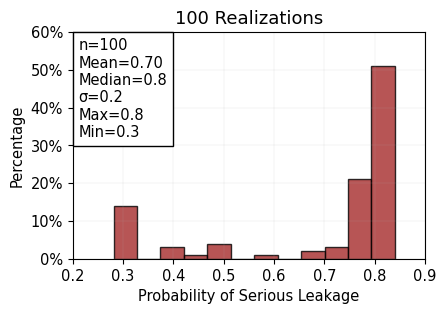

In [194]:
font = {'size'   : 7}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=6, nrows=2)
ax1=plt.subplot(1,2,1) 
i=0
tmp_val=[idx for idx, val in enumerate(Mean) if val>0.65 and val<0.75] 
val=sim_result_real.iloc[tmp_val[0]]
histplt (val,bins=12,title='100 Realizations',xlabl='Probability of Serious Leakage',days=False,alpha=0.8,
         ylabl='Percentage',xlimt=(0.2,0.9),ylimt=(0,0.6),axt=ax1,nsplit=5,scale=1.05,loc=2,font=10,color='brown')
fig.savefig('./Figures/Fig19.png', dpi=500, bbox_inches='tight')

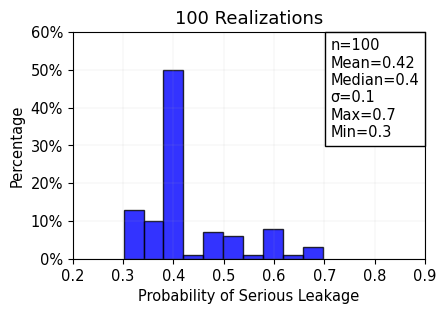

In [193]:
font = {'size'   : 7}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=6, nrows=2)
ax1=plt.subplot(1,2,1) 
i=0
tmp_val=[idx for idx, val in enumerate(Mean) if val>0.25 and val<0.45] 
val=sim_result_real.iloc[tmp_val[10]]
histplt (val,bins=10,title='100 Realizations',xlabl='Probability of Serious Leakage',days=False,alpha=0.8,
         ylabl='Percentage',xlimt=(0.2,0.9),ylimt=(0,0.6),axt=ax1,nsplit=5,scale=1.05,loc=1,font=10,color='b')
fig.savefig('./Figures/Fig20.png', dpi=500, bbox_inches='tight')